In [1]:
import setuptools  # Ensures distutils is available
import pyximport
pyximport.install()

(None, <pyximport._pyximport3.PyxImportMetaFinder at 0x104265820>)

In [2]:
from scipy.integrate import trapezoid as trapz
from datetime import datetime
import os
import shutil
import pandas as pd
#!/anaconda3/bin/python
from math import cos, sin, pi, sqrt
from numpy import (
    array, linspace, arange, loadtxt, vectorize, pi as npi, exp, zeros,
    empty, log, log2, finfo, true_divide, asarray, where, partition, isnan, nan,
    ones, argmax, argmin, set_printoptions, diagonal, round, inf,concatenate, sin, cos
    )
import imageio
from numpy.random import random
from scipy.integrate import trapezoid as trapz
from scipy.signal import correlate2d
from matplotlib import rcParams, rc, ticker, colors, cm
from matplotlib.style import use
from matplotlib.pyplot import subplots, close
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from os import getcwd
from datetime import datetime
import os
from matplotlib.patches import Rectangle
import matplotlib.font_manager as font_manager
import pyximport
import numpy as np
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit, fsolve
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib


In [3]:
# Install setuptools to resolve the distutils issue
%pip install setuptools

import pyximport
pyximport.install()

from utilities import (
    calc_flux #, calc_learning_rate
    )

DEPRECATION: Loading egg at /Users/sarealles/Desktop/Data/code/.venv/lib/python3.12/site-packages/Cython-3.1.0a0-py3.12-macosx-14.0-arm64.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [427]:
l_title_s = 11
l_entry_s = 10
ticks_size = 11
fs = 12
ts = 13
ms = 3
off_text_size = 11

In [428]:
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)

In [5]:
def infinite_eff(psi_0,psi_1,n0,n1,model):
    '''gets the psi_0/1 that is applied to model 1,3 
    (dont divide it for mod 2,4 before hand)'''
    
    if model=="model1":
        if abs(psi_0)>abs(psi_1):
            eff = - psi_1/psi_0
        else:
            eff = - psi_0/psi_1
    if model == "model2":
        if abs(n0*psi_0/8)>abs(n1*psi_1/3):
            eff = - (n1*psi_1/3)/(n0*psi_0/8)
        elif abs(n0*psi_0/8)==abs(n1*psi_1/3):
            eff =-1
        else:
            eff = - ((n0*psi_0/8)/(n1*psi_1/3))
    if model=="model3":
        X2 = (psi_0*((n1*psi_0/n0) + psi_1))
        X1 =(psi_1*(psi_0 + (n0*psi_1/n1)))
        if X2 != 0:
            if abs(psi_0/n0)>abs(psi_1/n1):
                eff = - X1/X2
            else:
                eff = - (X1/X2)**(-1)
        else:
            eff = 0
    if model == "model4":
        psi_0 = psi_0*n0/8
        psi_1 = psi_1*n1/3
        
        X2 = (psi_0*((n1*psi_0/n0) + psi_1))
        X1 =(psi_1*(psi_0 + (n0*psi_1/n1)))
        if X2 != 0:
            if abs(psi_0/n0)>abs(psi_1/n1):
                eff = - X1/X2
            else:
                eff = - (X1/X2)**(-1)
        else:
            eff = 0
            
        # eff = ["undefined" if x == -1 else x for x in eff]
    return eff

In [6]:
def set_params(model, n0,n1,f0,f1=-2.0,E0=2.0,E1=2.0):
    N = 100
    
     # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1


    psi_0 = f0
    psi_1 = f1
    psi_0_n = f0
    psi_1_n = f1
    
    if model =="model4" or model =="model2" or model=="BFM":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 

def set_params_Fo_4(model,n0,n1,E0,E1):

    N = 100
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 4.0
    psi_1 = -2.0
    psi_0_n = 4.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 

def set_params_Fo_2(model,n0,n1,E0,E1):

    N = 100
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 2.0
    psi_1 = -2.0
    psi_0_n = 2.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0
    
    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 
def set_params_Fo_3(model,n0,n1,E0,E1):

    N = 100
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 3.0
    psi_1 = -2.0
    psi_0_n = 3.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 
def set_params_Fo_5(model,n0,n1,E0,E1):

    N = 100
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 5.0
    psi_1 = -2.0
    psi_0_n = 5.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 
def set_params_Fo_6(model,n0,n1,E0,E1):

    N = 100
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 6.0
    psi_1 = -2.0
    psi_0_n = 6.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 
def set_params_Fo_7(model,n0,n1,E0,E1):

    N = 100
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 7.0
    psi_1 = -2.0
    psi_0_n = 7.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        )        
def set_params_Fo_8(model,n0,n1,E0,E1):

    N = 500
    
    # E0 = 2.0 # energy scale of Fo
    Ecouple = 20.0 # energy scale of coupling between Fo and F1
    # E1 = 2.0

    psi_0 = 8.0
    psi_1 = -2.0
    psi_0_n = 8.0
    psi_1_n = -2.0
    
    if model =="model4" or model =="model2":
        psi_0_n = n0*psi_0/8
        psi_1_n = n1*psi_1/3
        

    

    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 
    
def set_params_Fo_0(model,n0,n1,E0,E1):

    N = 500
    
    # E0 = 0.0 # energy scale of Fo
    Ecouple = 0.0 # energy scale of coupling between Fo and F1
    # E1 = 0.0

    psi_0 = 0.0
    psi_1 = -0.0
    psi_0_n = 0.0
    psi_1_n = -0.0


    m0 = 1.0
    m1 = 1.0
    beta = 1.0
    gamma = 1000.0
    phase = 0.0

    

    return (
        E0, Ecouple, E1,  psi_0, psi_1, psi_0_n, psi_1_n, 
        n0, n1,
        m0, m1, phase,beta, gamma, model
        ) 

In [299]:
def move_files_and_create_dataframe(source_folder, destination_folder, n0, n1,psi0,model):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)
    
    # Create the subfolder based on n0 and n1
    subfolder = os.path.join(destination_folder, f"{int(n0)}_{int(n1)}")
    os.makedirs(subfolder, exist_ok=True)
    
    # Get the list of files in the source folder
    files = os.listdir(source_folder)
    
    # Initialize lists to store the Ec values, square root of the number of rows, model, psi_0, and psi_1
    ec_values = []
    sqrt_num_rows = []
    models = []
    psi_0_values = []
    psi_1_values = []
    n0_values = []
    n1_values = []
    dt_values = []
    
    # Set to keep track of processed file names
    processed_files = set()
    
    # Iterate over the files
    for file_name in files:
        if model in file_name:
            if f"psi0_{psi0}" in file_name:
        # Check if the file matches the pattern and has not been processed before
                if f"n0_{n0}_n1_{n1}" in file_name and file_name not in processed_files:
                    # Move the file to the subfolder
                    source_path = os.path.join(source_folder, file_name)
                    print(source_path)
                    destination_path = os.path.join(subfolder, file_name)
                    shutil.copy(source_path, destination_path)
                    #print(f"File '{file_name}' copied to '{subfolder}'")
                    
                    # Count the number of rows in the file
                    # with open(destination_path, 'r') as file:
                    #     num_rows = sum(1 for line in file)
                    #     sqrt_num_rows.append(np.sqrt(num_rows))
                    #     #print(f"N: {sqrt_num_rows[-1]}")
                    try:
                        with open(destination_path, 'r') as file:
                            num_rows = sum(1 for line in file)
                            sqrt_num_rows.append(np.sqrt(num_rows))
                    except UnicodeDecodeError:
                        print(f"UnicodeDecodeError occurred with file: {destination_path}")
                        continue  # Move to the next file
                    
                    # Extract the Ec value from the file name
                    ec_value = float(file_name.split("_Ecouple_")[1].split("_")[0])
                    if "dt" in file_name:
                        dt = float(file_name.split("_dt_")[1].split("_")[0])
                        print(fr"{file_name[:6]}, n0={n0},n1={n1},N={np.sqrt(num_rows)},EC={ec_value},dt={dt}")
                    else:
                        print(fr"{file_name[:6]}, n0={n0},n1={n1},N={np.sqrt(num_rows)},EC={ec_value}")
                    
                    # Extract the model, psi_0, and psi_1 from the file name
                    model = file_name.split("_")[0]
                    psi_0 = float(file_name.split("_psi0_")[1].split("_")[0])
                    psi_1 = float(file_name.split("_psi1_")[1].split("_")[0])
                    
                    # Append the values to the respective lists
                    ec_values.append(ec_value)
                    models.append(model)
                    psi_0_values.append(psi_0)
                    psi_1_values.append(psi_1)
                    n0_values.append(n0)
                    n1_values.append(n1)
                    if "dt" in file_name:
                        dt = float(file_name.split("_dt_")[1].split("_")[0])
                        print(fr"{file_name[:6]}, n0={n0},n1={n1},N={np.sqrt(num_rows)},EC={ec_value},dt={dt}")
                        dt_values.append(dt)
                    else:
                        dt_values.append(0.001)
                        print(fr"{file_name[:6]}, n0={n0},n1={n1},N={np.sqrt(num_rows)},EC={ec_value}")
                    
                    # Add the file name to the processed files set
                    processed_files.add(file_name)
    # Create a pandas DataFrame with the Ec values, square root of the number of rows, model, psi_0, and psi_1
    df = pd.DataFrame({"n0": n0_values, "n1": n1_values, 'Model': models, 'Ec': ec_values, 'SqrtNumRows': sqrt_num_rows, 'Psi_0': psi_0_values, 'Psi_1': psi_1_values, 'dt': dt_values})
    # Check if the CSV file already exists
    csv_file_path = os.path.join(destination_folder, f"{int(n0)}_{int(n1)}.csv")
    if os.path.exists(csv_file_path):
        # Read the existing CSV file
        existing_df = pd.read_csv(csv_file_path)
        
        # Check if the contents of the CSV file are the same as the data to be added
        if existing_df.equals(df):
            print(f"Skipping file '{file_name}' as it already exists with the same data")
        else:
            # Append the new data to the existing CSV file
            combined_df = pd.concat([existing_df, df], ignore_index=True)
            combined_df.to_csv(csv_file_path, index=False)
            print(f"Data appended to '{csv_file_path}'")
    else:
        df.to_csv(os.path.join(destination_folder, f'{int(n0)}_{int(n1)}.csv'), index=False)

    
    return df


In [300]:
####Copies files from downloaded folder to specific direction#####
n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0]
# n0_array = [1.0,2.0,3.0,4.0,5.0,6,7.0,8.0,9.0,20.0]


# n1_array = [1.0,2.0,3.0,4.0,5.0,6,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0]

# target_dir = "/Users/sarealles/Desktop/model1/data_N_360/cluster/"
# target_dir_out = "/Users/sarealles/Desktop/model1/data_N_360/cluster/"

# target_dir = "/Volumes/Sara/Data_unprocessed/"
# target_dir_out = "/Volumes/Sara/Data/Data_processed/"

# target_dir = "/Users/sarealles/Desktop/model1/data_N_100"
# target_dir_out = "/Users/sarealles/Desktop/model1/data_N_100"

# target_dir = "/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_8"
# target_dir_out = "/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_8/moved"



target_dir = "/Users/sarealles/Desktop/model1/DF_vs_Ec"
target_dir_out = "/Users/sarealles/Desktop/model1/DF_vs_Ec"

target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_0"
target_dir_out = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_0/f0_4/moved"

target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_1/rest"
target_dir_out = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_1/f0_4/moved"

target_dir = "/Users/sarealles/Desktop/model1/DF_vs_Ec"
target_dir_out = "/Users/sarealles/Desktop/model1/DF_vs_Ec"

target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_3/f0_8"
target_dir_out = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_3/f0_8/moved"

target_dir = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n0_5"
target_dir = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n0_5/moved"

target_dir = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n1_7"
target_dir_out = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n1_7/moved"

target_dir = "/Users/sarealles/Desktop/model3/test"
target_dir_out = "/Users/sarealles/Desktop/model3/test/moved"

# target_dir = "/Volumes/Sara/model1/data_N_1000"
# target_dir_out = "/Volumes/Sara/model1/data_N_1000/moved_files"

# target_dir = "/Users/sarealles/Desktop/dt_dx_cluster/dt_0.01/N_100"
# target_dir_out = "/Users/sarealles/Desktop/dt_dx_cluster/dt_0.01/N_100"

# input_file_name = (
#         "/"+model+"_t_reference_E0_{0}_Ecouple_{1}_E1_{2}_psi0_{3}_psi1_{4}_n0_{5}_n1_{6}_phase_{7}_outfile.dat")
#     output_file_name = (
#         "/"+model+"_flux_power_efficiency_"
#         + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat"
#         )

n1_array = [3.0]
n0_array=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
# n0_array=[25.0,26.0,27.0,28.0,29.0,30.0]
# n0_array=[.0]
psi0= 4.0

for n0 in n0_array:
    for n1 in n1_array:
        move_files_and_create_dataframe(target_dir, target_dir_out, n0, n1, psi0, "model3")


/Users/sarealles/Desktop/model3/test/model3_t_reference_E0_0.0_Ecouple_10.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_1.0_n1_3.0_phase_0.0_outfile.dat


model3, n0=1.0,n1=3.0,N=1000.0,EC=10.0
model3, n0=1.0,n1=3.0,N=1000.0,EC=10.0
/Users/sarealles/Desktop/model3/test/model3_t_reference_E0_0.0_Ecouple_1.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_1.0_n1_3.0_phase_0.0_outfile.dat
model3, n0=1.0,n1=3.0,N=1000.0,EC=1.0
model3, n0=1.0,n1=3.0,N=1000.0,EC=1.0
/Users/sarealles/Desktop/model3/test/model3_t_reference_E0_0.0_Ecouple_10.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_2.0_n1_3.0_phase_0.0_outfile.dat
model3, n0=2.0,n1=3.0,N=1000.0,EC=10.0
model3, n0=2.0,n1=3.0,N=1000.0,EC=10.0
/Users/sarealles/Desktop/model3/test/model3_t_reference_E0_0.0_Ecouple_1.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_3.0_n1_3.0_phase_0.0_outfile.dat
model3, n0=3.0,n1=3.0,N=540.0,EC=1.0
model3, n0=3.0,n1=3.0,N=540.0,EC=1.0
/Users/sarealles/Desktop/model3/test/model3_t_reference_E0_0.0_Ecouple_100.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_3.0_n1_3.0_phase_0.0_outfile.dat
model3, n0=3.0,n1=3.0,N=540.0,EC=100.0
model3, n0=3.0,n1=3.0,N=540.0,EC=100.0
/Users/sarealles/Desktop/model3/test/model3_t_reference_E0_0.0_Ec

### calculate flux,power,efficiency

!!!!!!!!!!!!!!!!change the efficiency part!!!!!!!!!!!

In [ ]:
def calculate_flux_power_and_efficiency(target_dir,target_dir_out,Ecouple_array, params, N_array,dt=0.001):

    [
        E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, n0, n1,
        m0, m1, phase,beta, gamma,model
        ] = params

    
    input_file_name = (
        "/"+model+"_t_reference_E0_{0}_Ecouple_{1}_E1_{2}_psi0_{3}_psi1_{4}_n0_{5}_n1_{6}_phase_{7}_outfile.dat")
    output_file_name = (
        "/"+model+"_flux_power_efficiency_"
        + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat"
        )
    
    # input_file_name = (
    #     "/"+model+"_dt_{8}_N_{9}"+"_reference_E0_{0}_Ecouple_{1}_E1_{2}_psi0_{3}_psi1_{4}_n0_{5}_n1_{6}_phase_{7}_outfile.dat")
    # output_file_name = (
    #     "/"+model+"_dt_{7}_N_{8}"+"_flux_power_efficiency_"
    #     + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat"
    #     )

    #psi_0*nm0/8.0

    efficiency_ratio_mod = []
    
    #l = Ecouple_array.size
    l = len(Ecouple_array)

    integrate_flux_X = empty(l)
    integrate_flux_Y = empty(l)
    integrate_power_X = empty(l)
    integrate_power_Y = empty(l)
    efficiency_ratio = empty(l)
    
    
    for ii, Ec in enumerate(Ecouple_array):

        N = int(N_array[ii])
        dx = 2*pi/N
        positions = linspace(0.0,2*pi-dx,N)
        
    
        flux_array = empty((2,N,N))
        if "dt" in input_file_name:
            data_array = loadtxt(
                target_dir + input_file_name.format(
                    E0,Ec,E1, psi_0, psi_1,n0,n1,phase,dt,N
                    ), usecols=(0,3,4,5,6,7,8)
            )
        else:
            try:
                data_array = loadtxt(
                    target_dir + input_file_name.format(
                        E0,Ec,E1, psi_0, psi_1,n0,n1,phase
                        ), usecols=(0,3,4,5,6,7,8)
                )
            except:
                continue
    
        
        prob_ss_array = data_array[:,0].reshape((N,N))
        print("normalized?",prob_ss_array.sum(axis=None))
        drift_at_pos = data_array[:,1:3].T.reshape((2,N,N))
        diffusion_at_pos = data_array[:,3:].T.reshape((4,N,N))
    
        
        calc_flux(
            positions,prob_ss_array, drift_at_pos, 
            diffusion_at_pos, flux_array, N,dx
            )

        flux_array = asarray(flux_array)/(dx*dx)

        integrate_flux_X[ii] = (1./(2*pi))*trapz(trapz(flux_array[0,...], dx=dx, axis=1), dx=dx)
        integrate_flux_Y[ii] = (1./(2*pi))*trapz(trapz(flux_array[1,...], dx=dx, axis=0), dx=dx)  
        '''You’re not averaging over the entire area of the 2D domain (which would need (2\pi)^2), but rather you’re computing the net average flux per 2π rotation of one motor
        (e.g., per full cycle of \theta_{\rm o})'''
        integrate_power_X[ii] = integrate_flux_X[ii]*psi_0_n
        integrate_power_Y[ii] = integrate_flux_Y[ii]*psi_1_n
        
        # efficiency_ratio_mod.append(0)
        if (abs(integrate_power_X[ii]) <= abs(integrate_power_Y[ii])):
            #print("X")
            efficiency_ratio_mod.append(-(integrate_power_X[ii]/integrate_power_Y[ii]))
        else:
            efficiency_ratio_mod.append(-(integrate_power_Y[ii]/integrate_power_X[ii]))
            #print("Y")
        
            
        
    efficiency_ratio = np.zeros(len(integrate_power_Y))   
    if (abs(psi_0_n) <= abs(psi_1_n)):
        efficiency_ratio = -(integrate_power_X/integrate_power_Y)
    else:
        efficiency_ratio = -(integrate_power_Y/integrate_power_X)
        
    
    
    print(model + " n0 = {0} n1= {1} f0= {2:.2f}, <j0>={3}".format(n0,n1,psi_0_n, [format(value, ".14e") for value in integrate_flux_X]))
    print(model + " n0 = {0} n1= {1} f1= {2:.2f}, <j1>={3}".format(n0,n1,psi_1_n, [format(value, ".14e") for value in integrate_flux_Y]))

    print("-------------------------------------------------------------------------------------")
    
    if "dt" in input_file_name:
        print("error",N_array)
        with open(
        target_dir_out + output_file_name.format(
            E0,E1, psi_0, psi_1,n0,n1,phase,dt,int(N_array[0])
            ), "w"
            ) as ofile:
            for ii, Ec in enumerate(Ecouple_array):

                ofile.write(
                    f"{Ec:.15e}" + "\t"
                    + f"{integrate_flux_X[ii]:.15e}" + "\t"
                    + f"{integrate_flux_Y[ii]:.15e}" + "\t" 
                    + f"{integrate_power_X[ii]:.15e}" + "\t"
                    + f"{integrate_power_Y[ii]:.15e}" + "\t"
                    + f"{efficiency_ratio[ii]:.15e}" + "\t"
                    + f"{efficiency_ratio_mod[ii]:.15e}" + "\n"
                )
            ofile.flush()
    else:
        
        with open(
        target_dir_out + output_file_name.format(
            E0,E1, psi_0, psi_1,n0,n1,phase
            ), "w"
            ) as ofile:
            for ii, Ec in enumerate(Ecouple_array):

                ofile.write(
                    f"{Ec:.15e}" + "\t"
                    + f"{integrate_flux_X[ii]:.15e}" + "\t"
                    + f"{integrate_flux_Y[ii]:.15e}" + "\t" 
                    + f"{integrate_power_X[ii]:.15e}" + "\t"
                    + f"{integrate_power_Y[ii]:.15e}" + "\t"
                    + f"{efficiency_ratio[ii]:.15e}" + "\t"
                    + f"{efficiency_ratio_mod[ii]:.15e}" + "\n"
                )
            print("saved",ofile)
            ofile.flush()
        ofile.close()
        with open(target_dir_out + output_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase), "r") as ofile:
            first_line = ofile.readline()
            print(first_line)
    

        
        
        # ofile.flush()


In [301]:
'''calculate flux and power from reference file
be careful of the fo and f1 you're analyzing
#change the target_dir and params to evaluate different parameter data. 66,4 
# change N_array_full_fo_8 based on f0 (=4 or =8)
#chenge the input file name in the function if youre working with dt,N specific files'''
# n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0]
n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0]
# n0_array = [17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0]
n1_array = [3.0]
#model_array = ["model1","model2","model3","model4"]
model_array = ["model3"]

# target_dir = "/Volumes/Sara/Data/Data_processed/"
# target_dir_out = "/Users/sarealles/Desktop/Data_processed/pfe/" #be careful of the fo and f1 you're analyzing
# target_dir = "/Users/sarealles/Desktop/dt_dx_cluster/dt_0.01/N_100/"
# target_dir_out = "/Users/sarealles/Desktop/dt_dx_cluster/dt_0.01/N_100/pfe/"
# /Users/sarealles/Desktop/model1/data_N_360/cluster/pfe

# target_dir = "/Users/sarealles/Desktop/model1/data_N_360/cluster/"
# target_dir_out = "/Users/sarealles/Desktop/model1/data_N_360/cluster/pfe/"

# target_dir = "/Users/sarealles/Desktop/model1/data_N_100/Normalized_p/"
# target_dir_out = "/Users/sarealles/Desktop/model1/data_N_100/Normalized_p/pfe/"

# target_dir = "/Users/sarealles/Desktop/model1/data_N_100/"
# target_dir_out = "/Users/sarealles/Desktop/model1/data_N_100/pfe/"



#For the N=1000 data#
# target_dir = "/Volumes/Sara/model1/data_N_1000/moved_files/"
# target_dir_out = "/Users/sarealles/Desktop/model1/data_N_1000/pfe/"
# target_dir="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_8/moved/"
# target_dir_out="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_8/moved/pfe/"

# target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/f0_2/moved/"
# target_dir_out = "/Users/sarealles/Desktop/model2/new_data_540_CM/f0_2/pfe/"





target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_1/f0_4/moved/"
target_dir_out = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_1/f0_4/moved/pfe/"

target_dir = "/Users/sarealles/Desktop/model1/DF_vs_Ec/"
target_dir_out = "/Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/"

target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_3/f0_8/moved/"
target_dir_out = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_3/f0_8/moved/pfe/"

target_dir = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n1_7/moved/"
target_dir_out = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n1_7/pfe/"

target_dir = "/Users/sarealles/Desktop/model3/test/moved/"
target_dir_out = "/Users/sarealles/Desktop/model3/test/pfe/"

psi_0 = 4.0
dt=0.001
J0_end = []
J1_end = []
n0_array=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0]
# n0_array=[12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0]
# n0_array=[9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0]

# n0_array=[8.0]

for n1 in n1_array:
    for n0 in n0_array:
        # n0n1_str = "n0"+"_"+str(n0)+"_"+"n1"+"_"+ str(n1)
        n0n1_str = str(int(n0))+"_"+str(int(n1))
        
        for model in model_array:
            df_file_path = target_dir + f'{int(n0)}_{int(n1)}.csv'
            print(df_file_path)
            if not os.path.exists(df_file_path):
                print(f"DataFrame file for n0={n0}, n1={n1} does not exist. Skipping...")
                continue

            df = pd.read_csv(df_file_path)
            # Filter the DataFrame based on n0, n1, model, and psi_0
            filtered_df = df[(df['n0'] == n0) & (df['n1'] == n1) & (df['Model'] == model) & (df['Psi_0'] == psi_0)]

            # Get the Ec and N values
            Ecouple_array = filtered_df['Ec'].values
            N_array = filtered_df['SqrtNumRows'].values
            # dt_array = filtered_df['dt'].values
            
            # if len(Ecouple_array) == 0 or len(N_array) == 0:
            #     print(f"No data available for n0={n0}, n1={n1}, model={model}, and psi_0={psi_0}. Skipping...")
            #     continue
            sorted_indices = np.argsort(Ecouple_array)
            Ec_array_sorted = Ecouple_array[sorted_indices]
            N_array_sorted = N_array[sorted_indices]

            print(Ec_array_sorted)
            print(N_array_sorted)

            '''changing E0,E1 to match E0=1,2,3....'''
            params = set_params(model, n0,n1,psi_0,E0=0.0,E1=0.0)
            # print(params)

            
            print(os.path.exists(target_dir_out + n0n1_str))
            if not os.path.exists(target_dir_out + n0n1_str):
                print("were here")
                os.makedirs(target_dir_out + n0n1_str)
            calculate_flux_power_and_efficiency(target_dir + n0n1_str ,target_dir_out + n0n1_str,Ec_array_sorted, params, N_array_sorted,dt)
            #Ec_array = Ec_array_full.get(key,[])
        

/Users/sarealles/Desktop/model3/test/moved/1_3.csv
[ 1. 10.]
[1000. 1000.]
False
were here
normalized? 1.0000000000008087
normalized? 1.0000000000024996
model3 n0 = 1.0 n1= 3.0 f0= 4.00, <j0>=['6.25668225350351e-04', '4.77136711856046e-04']
model3 n0 = 1.0 n1= 3.0 f1= -2.00, <j1>=['-2.88636325522806e-04', '1.56963975410249e-04']
-------------------------------------------------------------------------------------
saved <_io.TextIOWrapper name='/Users/sarealles/Desktop/model3/test/pfe/1_3/model3_flux_power_efficiency_E0_0.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_1.0_n1_3.0_phase_0.0_outfile.dat' mode='w' encoding='UTF-8'>
1.000000000000000e+00	6.256682253503512e-04	-2.886363255228065e-04	2.502672901401405e-03	5.772726510456129e-04	-2.306624452290035e-01	-2.306624452290035e-01

/Users/sarealles/Desktop/model3/test/moved/2_3.csv
[10.]
[1000.]
False
were here
normalized? 1.0000000000020057
model3 n0 = 2.0 n1= 3.0 f0= 4.00, <j0>=['2.94772820509527e-04']
model3 n0 = 2.0 n1= 3.0 f1= -2.00, <j1>=['1.931

In [500]:
l_title_s = 8
l_entry_s = 8
ticks_size = 7
fs = 9
ts = 11
ms = 3
off_text_size = 7

In [657]:
def plot_P_n0(target_dir,params, model_array,n0_array,n1_array,Ec):
    
    colors = ["crimson","salmon",  "navy","cornflowerblue"]
    ms = [12,6,12,6]
    legend_saver = []
    #fig for P vs n0
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    #fig1 for eta vs n0
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,5))
    #fig2 for j1 vs n0
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    ax.axhline(0.0,color="black", lw=1.0)
    ax1.axhline(0.0,color="black", lw=1.0)
    ax2.axhline(0.0,color="black", lw=1.0)
    ax1.axhline(1.0,color="black", lw=1.0)
    
    
    
    for model in model_array:
        for n1 in n1_array:
            
            n0_exists = []
            P_at_Ec = []
            eta_at_Ec = []
            j1_at_Ec = []
            for n0 in n0_array:
                target_dir_temp = target_dir + str(int(n0))+"_" +str(int(n1))
            
                [
                E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                m0, m1, phase,beta, gamma,__
                ] = params
                
                input_file_name = ("/" + model + "_flux_power_efficiency_"
                + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                
                Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase),unpack=True, usecols=(0,1,2,3,4,5,6))
                for j in range(len(Ec_list)):
                    if Ec_list[j] == Ec:
                        n0_exists.append(int(n0))
                        P_at_Ec.append(-2*pi*integrate_power_Y[j])
                        eta_at_Ec.append(efficiency_mod[j])
                        j1_at_Ec.append(integrate_flux_Y[j])
                
            fig.suptitle(fr"$P_1, E_c = {Ec},\ n_1 = {n1}, \ f_o = {psi_0}$", fontsize=16)
            p, = ax.plot(n0_exists,P_at_Ec, label = model,marker ="o", lw=1.0, color=colors[int(model[-1])-1], markersize=ms[int(model[-1])-1])
            legend_saver.append(p)
            ax.tick_params(labelsize=15, axis='both')
            ax.set_xlabel(r"$n_o$", fontsize=15)
            ax.set_xticks(n0_exists)
            ax.set_ylabel(r"$\mathcal{P}_{1}$", fontsize=15)
            #ax.legend(loc='upper right', prop={'size':12})

            fig1.suptitle(fr"$\eta , E_c = {Ec},\ n_1 = {n1}, \ f_o = {psi_0}$", fontsize=16)
            ax1.plot(n0_exists,eta_at_Ec, label = model,marker ="o", lw=1.0, color=colors[int(model[-1])-1], markersize=ms[int(model[-1])-1])
            ax1.tick_params(labelsize=15, axis='both')
            ax1.set_xlabel(r"$n_o$", fontsize=15)
            ax1.set_ylabel(r"$\eta$", fontsize=15)
            #ax1.legend(loc='upper right', prop={'size':12})
            
            fig2.suptitle(fr"$J_1, E_c = {Ec},\ n_1 = {n1}, \ f_o = {psi_0}$", fontsize=16)
            ax2.plot(n0_exists,j1_at_Ec, label = model,marker ="o", lw=1.0, color=colors[int(model[-1])-1], markersize=ms[int(model[-1])-1])
            ax2.tick_params(labelsize=15, axis='both')
            ax2.set_xlabel(r"$n_o$", fontsize=15)
            ax2.set_xticks(n0_exists)
            ax2.set_ylabel(r"$J_{1}$", fontsize=15)

            ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['top'].set_visible(False)
            
            ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            ax2.spines['right'].set_visible(False)
            ax2.spines['bottom'].set_visible(False)
            ax2.spines['top'].set_visible(False)

            
            ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            ax1.spines['right'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            
            ax.set_xscale("log")
            ax1.set_xscale("log")
            ax2.set_xscale("log")
           

    extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
    legend_handle = [extra, extra, extra, extra, legend_saver[0], legend_saver[1], extra, legend_saver[2], legend_saver[3],]
    label_row_1 = [" ",r"$\Delta\mu_{2\pi}$", r"$\Delta\mu_{\frac{2\pi}{n}}$"]
    label_j_1 = [r"$spring$"]
    label_j_2 = [r"$gear$"]
    label_empty = [""]
    legend_labels = concatenate([label_row_1, label_j_1, label_empty * 2, label_j_2, label_empty * 2])
    leg = ax.legend(legend_handle, legend_labels, loc=9, ncol=3, shadow=False, handletextpad=-2, prop={'size':12}, bbox_to_anchor=(0.7, 0.9))
    ax.add_artist(leg)
    leg1 = ax1.legend(legend_handle, legend_labels, loc=9, ncol=3, shadow=False, handletextpad=-2, prop={'size':12}, bbox_to_anchor=(0.7, 0.9))
    ax1.add_artist(leg1)
    leg2 = ax2.legend(legend_handle, legend_labels, loc=9, ncol=3, shadow=False, handletextpad=-2, prop={'size':12}, bbox_to_anchor=(0.7, 0.9))
    ax2.add_artist(leg2)
    fig.savefig(fr"/Users/sarealles/Desktop/Data/P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
    fig1.savefig(fr"/Users/sarealles/Desktop/Data/eta_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
    fig2.savefig(fr"/Users/sarealles/Desktop/Data/J1_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
    plt.show()
    
def plot_P_n0_individual(target_dir,model,n0_array,n1_array,Ec_array,Ec_analytic_list,x_lim,f0,f1,dt,N,E0,E1,vs_n0=True):
    '''wrong timescale used in paper'''
    timescale = 1.5 * 10**4 
    '''timescale used in thesis'''
    timescale = 4.8 * 10**7 
    #individually plotting for each model P vs no for various Ec values in one single plot
    #fig for P vs n0
    fig, ax = plt.subplots(1, 1, figsize=(4,2))
    #fig6 for P0 vs n0
    fig6, ax6 = plt.subplots(1, 1, figsize=(5,5))
    #fig1 for eta vs n0
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,5))
    #fig2 for j1 vs n0
    fig2, ax2 = plt.subplots(1, 1, figsize=(5, 5))
    #fig5 for jo vs n0
    fig5, ax5 = plt.subplots(1, 1, figsize=(5,5))
    #fig3 for jslip vs n0
    fig3, ax3 = plt.subplots(1, 1, figsize=(5,5))
    #fig8 for j0 and J1 vs n0 and J_slip vs n0
    fig8, ax8 = plt.subplots(2, 1, figsize=(7, 8), gridspec_kw={'height_ratios': [1, 1]}, sharex=True)
    '''alternative size for fig 8'''
    fig8, ax8 = plt.subplots(2, 1, figsize=(3, 4), gridspec_kw={'height_ratios': [4, 2]}, sharex=True)
    #fig9 for P1 vs P0
    fig9, ax9 = plt.subplots(1, 1, figsize=(5,5))

    # #fig4 for eta if assume fo always wins
    fig4, ax4 = plt.subplots(1, 1, figsize=(5,5))
    #fig7 P1 vs. eta
    fig7, ax7 = plt.subplots(1, 2, figsize=(8,4), sharey="row")
    
    # ax.axhline(0.0,color="black", lw=1.0)
    # ax3.axhline(0.0,color="black", lw=1.0)
    # ax6.axhline(0.0,color="black", lw=1.0)
    # ax4.axhline(0.0,color="black", lw=1.0)
    # ax2.axhline(0.0,color="black", lw=1.0)
    # ax5.axhline(0.0,color="black", lw=1.0)
    # ax1.axhline(1.0,color="black", lw=1.0)
    
    # index = (model[-1])-1
    colors = array(plt.get_cmap('tab10').colors)
    colors = cm.PuBuGn(np.linspace(0.4, 1, len(Ec_array)))

    # colors = ["red","blue", "green","orange","purple","brown","pink","gray","olive","cyan"]
    Ecouple= []
    maximizing_n0 = []

    ax8[1].hlines(0.0, 0, x_lim, color="black", lw=1.5)
    ax8[0].hlines(0.0, 0, x_lim, color="black", lw=1.0)
    '''super coupled, barrierless'''
    # ax8[0].plot(arange(1,x_lim),((timescale*array(arange(1,x_lim))*f0/8)+f1)/(4*pi*1000),marker=' ',color = "purple", label=r"$\frac{\mu_o + \mu_1}{4\pi\gamma}, \mathrm{Tightly \ coupled \ barrierless}$")
    # '''small coupled, barrierless'''
    # # ax8[0].plot(arange(1,x_lim),((array(arange(1,x_lim))*1.5*f0/8) - 0.5*f1)/(4*pi*1000),marker=' ',color = "crimson", label=r"$\frac{1.5\mu_o - 0.5\mu_1}{4\pi\gamma}, \mathrm{small \ coupled \ barrierless}$")
    # '''isolated, barrierless'''
    # ax8[0].plot(arange(1,x_lim),((timescale*array(arange(1,x_lim))*f0/8))/(2*pi*1000),marker=' ',linestyle = "dashed",color = "black", label=r"$\frac{\mu_o/\mu_1}{2\pi\gamma}, \mathrm{Isolated\ barrierless}$")
    # ax8[0].plot(arange(1,x_lim),(((-2)))/(2*pi*1000)*timescale*ones(x_lim-1),marker=' ',linestyle = "dashed",color = "black")
    
    '''super coupled, barrierless'''
    # ax8[1].plot(arange(1,50),((array(arange(1,50))*f0/8)+f1)/(4*pi*1000),marker=' ',color = "purple", label=r"$\frac{\mu_o + \mu_1}{4\pi\gamma}, \mathrm{Super \ coupled \ barrierless}$")
    '''isolated, barrierless'''
    # ax8[1].plot(arange(1,x_lim),((array(arange(1,x_lim))*f0/8))/(2*pi*1000),marker=' ',linestyle = "dashed",color = "purple", label=r"$\frac{\mu_o}{2\pi\gamma}, \mathrm{isolated\ barrierless}$")
    if vs_n0:
        for n1 in n1_array:
            ind = -1
            for i,Ec in enumerate(Ec_array):
                ind += 1
                if model == "model2":
                    p = False
                    if (Ec,f0) in Ec_analytic_list:
                        try:
                            
                            df = pd.read_csv(f"/Users/sarealles/Desktop/research/May25/J_flux_Ec_{int(Ec)}_f0_{int(f0)}.csv")
                            df = pd.read_csv("/Users/sarealles/Desktop/research/May25/J_flux_Ec_9_f0_4.csv")
                            # df = pd.read_csv(f"/Users/sarealles/Desktop/research/May25/J_flux_mod_Ec_{int(Ec)}_f0_{int(f0)}.csv")
                            p = True
                        except:
                            print(f"File for Ec={Ec}, f0={f0} does not exist. Skipping...")
                            p = False
                            continue
                if model == "model3":
                    p = False
                    if (Ec,f0) in Ec_analytic_list:
                        try:
                            # df = pd.read_csv(f"/Users/sarealles/Desktop/research/May25/J_flux_Ec_{int(Ec)}_f0_{int(f0)}.csv")
                            df = pd.read_csv(f"/Users/sarealles/Desktop/research/May25/J_flux_mod3_Ec_{int(Ec)}_f0_{int(f0)}.csv")
                            p = True
                        except:
                            print(f"File for Ec={Ec}, f0={f0} does not exist. Skipping...")
                            p = False
                            continue
                            
                           

                    # p = False  
                print("p is", p)  
                if p:
                    ax.scatter(array(df["n"][0:x_lim]),2*2*pi*timescale*array(df["J1"][0:x_lim]),marker='*', s = 20,  color = "orange",label=r"$\rm{analytical}$", zorder=3)
                    # ax8[0].plot(array(df["n"][0:x_lim]),timescale*array(df["J1"][0:x_lim]),marker='s', alpha = 0.5, markersize = 3, color = colors[ind+1])
                    # ax8[1].plot(array(df["n"][0:x_lim]),timescale*(array(df["J0"][0:x_lim])) - timescale*(array(df["J1"][0:x_lim])),marker='^', alpha = 0.5, markersize = 7,color = colors[ind+1])
                    x = array(df["n"][0:x_lim])
                    y = array(df["J0"][0:x_lim]) - array(df["J1"][0:x_lim])
                    print("analytical J1",array(df["J1"][0:x_lim]))
                    # ax2.plot(array(df["n"][0:x_lim]),timescale*array(df["J1"][0:x_lim]),marker='s', alpha = 0.5, markersize = 3, color = "black")
                    ax2.scatter(array(df["n"][0:x_lim]),timescale*array(df["J1"][0:x_lim]),marker='s', label = r"$\rm analytical $", s = 12, color = "black")

                    ax5.plot(array(df["n"][10:x_lim]),timescale*array(df["J0"][10:x_lim]),marker='s', alpha = 0.5, markersize = 3, color = colors[ind+1])

                    # knee_locator = KneeLocator(x, y, curve="convex", direction="increasing")
                    # knee_point = knee_locator.knee
                    # ax8[1].axvline(knee_point, color= colors[ind])
                    # ax8[0].axvline(knee_point, color=colors[ind])
                #     y =-0.0018*np.ones(40)
                #     ax.fill_between(np.arange(0,40),y , where=(y < 0), color='red', alpha=0.08)
                #     ax.fill_between(np.arange(0,40),y , where=(y < 0), color='red', alpha=0.08)
            
                # print("i: ",)
                n0_exists = []
                P_at_Ec = []
                P0_at_Ec = []
                eta_at_Ec = []
                eta_at_inf = []
                eta_Fo_wins = []
                j1_at_Ec = []
                jo_at_Ec = []
                jslip_at_Ec = []
                
                for n0 in n0_array:
                    params = set_params(model, n0,n1,f0,f1,E0,E1)
                    n0n1_str = str(int(n0))+"_"+ str(int(n1))
                    target_dir_temp = target_dir + n0n1_str
                
                    [
                    E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                    m0, m1, phase,beta, gamma,__
                    ] = params
                    
                
                    # input_file_name = ("/" + model +"_dt_{7}_N_{8}"+ "_flux_power_efficiency_"
                    # + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    #change the input name
                    input_file_name = ("/" + model + "_flux_power_efficiency_"
                    + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    
                    if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                        print(f"File {target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)} truly does not exist. Skipping...")
                        continue

                    Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                    target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

                    # Convert Ec_list to a list if it is a single value
                    if isinstance(Ec_list, float):
                        Ec_list = [Ec_list]
                        integrate_power_Y = [integrate_power_Y]
                        integrate_power_X = [integrate_power_X]
                        integrate_flux_X = [integrate_flux_X]
                        integrate_flux_Y = [integrate_flux_Y]
                        efficiency_mod = [efficiency_mod]
                        efficiency = [efficiency]

                    # print(integrate_power_Y)
                    for j in range(len(Ec_list)):
                        if Ec_list[j] == Ec:
                            n0_exists.append(int(n0))
                            P0_at_Ec.append(2*pi*integrate_power_X[j])
                            
                            if model == "BFM" and f1==-0.0:
                                P_at_Ec.append(2*pi*1000*((integrate_flux_Y[-1])**2))
                                eta_at_Ec.append(P_at_Ec[-1]/P0_at_Ec[-1])
                            else:
                                P_at_Ec.append(-2*pi*integrate_power_Y[j])
                                eta_at_Ec.append(efficiency_mod[j])
                            j1_at_Ec.append(integrate_flux_Y[j])
                            jo_at_Ec.append(integrate_flux_X[j])
                            eta_Fo_wins.append(efficiency[j])
                            if model =="model3" or model=="model4" or model=="BFM" :
                                jslip_at_Ec.append(n0*integrate_flux_X[j]-n1*integrate_flux_Y[j])
                            else:
                                jslip_at_Ec.append((integrate_flux_X[j])-(integrate_flux_Y[j]))
                                
                            
                    # eta_at_inf.append(infinite_eff(psi_0,psi_1,n0,n1,model))
                print("J0: ",jo_at_Ec)
                print("J1: ",j1_at_Ec)
                print("eff is ",eta_at_Ec)
                print("n0: ",n0_exists)
                if len(n0_exists)!=0:
                    Ecouple.append(Ec)
                    maximizing_n0.append(n0_exists[argmax(j1_at_Ec)])
                # print(fr"at {Ec}, n0 that maximizes J1 is: {n0_exists[argmax(j1_at_Ec)]}")
                    
                if model =="model2" or model=="model4":
                    x = str(psi_0/8)
                    psi_0 = "\\frac{n_o}{4}"
                    # psi_0 = str(psi_0)
                    f_o = "\\left| \\frac{\\mu_o}{\\mu_1} \\right|"
                else:
                    # f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                    f_o = "\\Delta \\mu_o"
                ###fitting curve####    
                # deg = 2
                # fit_coeffs = np.polyfit(n0_exists, P_at_Ec, deg)
                # fit_curve = np.polyval(fit_coeffs, n0_exists)
                # equation = " + ".join([f"{coef:.6f}*x^{deg}" for coef, deg in zip(fit_coeffs, range(len(fit_coeffs)-1, -1, -1))])
                # print(f"Fitted Polynomial Equation Ec = {Ec}: y = {equation}")
                # ax.plot(n0_exists, fit_curve, label=f"Fit Ec={Ec}", linestyle='--')
                ########
                # fig.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax.scatter(n0_exists,timescale*array(P_at_Ec), label = r"$\rm{simulation}$",marker ="s", color="black", s=30)
                ax.tick_params(labelsize=12, axis='both')
                ax.set_xlabel(r"$ {\rm \# \ subunits \ on} \ \mathrm{F_o} \ (n_{\rm o})$", fontsize=12)
                ax.set_xticks(n0_exists)
                ax.set_ylabel(r"$\rm{output \ power}\ \beta\mathcal{P}_{1}\ (\rm{s}^{-1})$", fontsize=12)
                #ax.legend(loc='upper right', prop={'size':12})
                # ax.plot([6,9,12,15,18,21,24,27,30],[1.0, 0.989, 0.961, 0.916, 0.854, 0.791, 0.81, 0.83, 0.836])
                #############################♯
                # deg=4
                # fit_coeffs = np.polyfit(n0_exists, P_at_Ec, deg)
                # fit_curve = np.polyval(fit_coeffs, n0_exists)
                # equation = " + ".join([f"${coef:.6f}*x^{deg}$" for coef, deg in zip(fit_coeffs, range(len(fit_coeffs)-1, -1, -1))])
                # print(f"Fitted Polynomial Equation Ec = {Ec}: y = {equation}")
                # ax.plot(n0_exists, fit_curve)
                # print(f"Fitted Polynomial Equation: y = {equation}")
                ############################# 
                fig1.suptitle(fr"${model} ,\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax1.plot(n0_exists,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                for i,e in enumerate(eta_at_Ec):
                    if e > 0.5:
                        print(fr"eta is {e} at Ec = {Ec}, n0 = {n0_exists[i]}")
        
                ax1.tick_params(labelsize=15, axis='both')
                ax1.set_xlabel(r"$ \#Subunits \ on \ F_o \ (n_o)$", fontsize=15)
                ax1.set_ylabel(r"$efficiency \ (\eta)$", fontsize=15)
                #ax1.legend(loc='upper right', prop={'size':12})
                
                fig7.suptitle(fr"${model} ,\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax7[0].plot(P_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax7[1].plot(P0_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                # ax7[1].set_title(r"$\mathcal{P}_{o}$")
                # ax7[0].set_title(r"$\mathcal{P}_{1}$")
                ax7[0].tick_params(labelsize=15, axis='both')
                ax7[1].tick_params(labelsize=15, axis='both')
                ax7[0].set_xlabel(r"$\mathcal{P}_{1}$", fontsize=15)
                ax7[1].set_xlabel(r"$\mathcal{P}_{o}$", fontsize=15)
                ax7[0].set_ylabel(r"$\eta$", fontsize=15)
                
                # fig2.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                # ax2.plot(n0_exists,timescale*array(j1_at_Ec), label = fr"${Ec}$",marker ="*",color="orange",lw=1.0, markersize=8)
                ax2.scatter(n0_exists,timescale*array(j1_at_Ec), label = r"$\rm simulation$",marker ="*",color="orange", s=5)

                ax2.tick_params(labelsize=15, axis='both')
                ax2.set_xlabel(r"$\# \ \mathrm{subunits \ on} \ F_{\rm o} \ (n_{\rm o})$", fontsize=12)
                ax2.set_xticks(n0_exists)
                ax2.set_ylabel(r"$\mathrm{flux}  \ J_{1} \ [1/s^*]$", fontsize=12)
                
                fig5.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax5.plot(n0_exists,jo_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax5.tick_params(labelsize=15, axis='both')
                ax5.set_xlabel(r"$n_o$", fontsize=15)
                ax5.set_xticks(n0_exists)
                ax5.set_ylabel(r"$J_{o}$", fontsize=15)
                
                # fig8.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax8[0].plot(n0_exists, array(jo_at_Ec)*timescale, label=rf"${int(Ec)}$", marker=" ", lw=1.0, color=colors[ind], zorder=ind)
                ax8[0].plot(n0_exists, array(j1_at_Ec)*timescale, marker=" ", lw=1.0, color=colors[ind], zorder=ind)
                ax8[0].scatter(n0_exists, array(jo_at_Ec)*timescale, marker="o", color=colors[ind], facecolor="none",s=60, linewidth=0.5, zorder=ind)
                ax8[0].scatter(n0_exists, array(j1_at_Ec)*timescale, marker="s", color=colors[ind], s=20,  linewidth=0.5, zorder=ind)

                # ax8[0].plot(n0_exists, jslip_at_Ec, marker=" ", linestyle="dotted", lw=2.0, color=colors[ind], markersize=8)
                ax8[0].tick_params(labelsize=ticks_size, axis='both')
                ax8[0].set_xticks(n0_exists)
                ax8[0].set_ylabel(r"$\mathrm{flux} \ \langle J\rangle \ (\rm{rot} / \rm{s})$", fontsize=fs)
                ax8[1].plot(n0_exists, array(jslip_at_Ec)*timescale, label=fr"${int(Ec)}$", marker="^", color=colors[ind], lw=1.0, markersize=6, zorder=ind)

                # Detect the knee point in the jslip_at_Ec data
                # knee_locator = KneeLocator(n0_exists, jslip_at_Ec, curve="convex", direction="increasing")
                # knee_point = knee_locator.knee

                # # Plot the knee point on the graph
                # if knee_point is not None:
                #     ax8[1].axvline(knee_point, color=colors[ind], linestyle='--')
                #     ax8[0].axvline(knee_point, color=colors[ind], linestyle='--')  
                if len(n0_exists) >= 7:
                    fit_coeffs = np.polyfit(n0_exists[-8:], jslip_at_Ec[-8:], 1)
                    fit_line = np.polyval(fit_coeffs, n0_exists[-8:])
                    slope, intercept = fit_coeffs
                    # ax8[1].plot(n0_exists, slope*array(n0_exists) + intercept, label=fr"Fit: $y = {slope:.2e}x  {intercept:.2e}$", linestyle="--", color=colors[ind])
                    ###############
                    # fit_coeffs = np.polyfit(n0_exists[0:2], jslip_at_Ec[0:2], 1)
                    # fit_line = np.polyval(fit_coeffs, n0_exists[0:2])
                    # slope, intercept = fit_coeffs
                    # ax8[1].plot(n0_exists, slope*array(n0_exists)+intercept, label=fr"Fit: $y = {slope:.2e}x  {intercept:.2e}$", linestyle="dotted", color=colors[ind])
                ax8[1].tick_params(labelsize=ticks_size, axis='both')
                ax8[1].set_xlabel(r"$\# \ \mathrm{subunits \ on} \ \mathrm{F_o} \ (n_{\rm o})$", fontsize=fs)
                ax8[1].set_xticks(n0_exists)
                ax8[1].set_ylabel(r"$\mathrm{slippage \ flux}\ \langle J_\mathrm{slip}\rangle \ (\rm{rot} / \rm{s})$", fontsize=fs)
                
                fig3.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax3.plot(n0_exists,jslip_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax3.tick_params(labelsize=15, axis='both')
                ax3.set_xlabel(r"$n_o$", fontsize=15)
                ax3.set_xticks(n0_exists)
                ax3.set_ylabel(r"$J_{slip}$", fontsize=15)

                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                fig4.suptitle(fr"${model},\ \eta ,\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax4.plot(n0_exists,eta_Fo_wins, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax4.tick_params(labelsize=15, axis='both')
                ax4.set_xlabel(r"$n_o$", fontsize=15)
                ax4.set_xticks(n0_exists)
                ax4.set_ylabel(r"$\eta_{Fo_wins}$", fontsize=15)


                fig6.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=15)
                ax6.plot(n0_exists,P0_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax6.tick_params(labelsize=15, axis='both')
                ax6.set_xlabel(r"$n_o$", fontsize=15)
                ax6.set_xticks(n0_exists)
                ax6.set_ylabel(r"$\mathcal{P}_{o}$", fontsize=15)
                
                fig9.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax9.plot(P0_at_Ec,P_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax9.tick_params(labelsize=15, axis='both')
                ax9.set_xlabel(r"$input \ power\ (\beta\mathcal{P}_{o})\ [1/s^*]$", fontsize=15)
                ax9.set_xticks(P0_at_Ec)
                ax9.set_ylabel(r"$output \ power\ (\beta\mathcal{P}_{1})\ [1/s^*]$", fontsize=15)
                
                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax2.spines['right'].set_visible(False)
                # ax2.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                
                ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax5.spines['right'].set_visible(False)
                ax5.spines['bottom'].set_visible(False)
                ax5.spines['top'].set_visible(False)
                
                ax7[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[0].spines['right'].set_visible(False)
                ax7[0].spines['bottom'].set_visible(False)
                ax7[0].spines['top'].set_visible(False)
                ax7[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[1].spines['right'].set_visible(False)
                ax7[1].spines['bottom'].set_visible(False)
                ax7[1].spines['top'].set_visible(False)
                
                ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax6.spines['right'].set_visible(False)
                ax6.spines['bottom'].set_visible(False)
                ax6.spines['top'].set_visible(False)
                
                ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax4.spines['right'].set_visible(False)
                ax4.spines['bottom'].set_visible(False)
                ax4.spines['top'].set_visible(False)
                
                ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax3.spines['right'].set_visible(False)
                ax3.spines['bottom'].set_visible(False)
                ax3.spines['top'].set_visible(False)
                
                ax8[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax8[0].spines['right'].set_visible(False)
                ax8[0].spines['bottom'].set_visible(False)
                ax8[0].spines['top'].set_visible(False)
                
                ax8[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax8[1].spines['right'].set_visible(False)
                # ax8[1].spines['bottom'].set_visible(False)
                ax8[1].spines['top'].set_visible(False)
                
                ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax1.spines['right'].set_visible(False)
                ax1.spines['bottom'].set_visible(False)
                ax1.spines['top'].set_visible(False)
                
                ax.set_xscale("log")
                ax1.set_xscale("log")
                ax2.set_xscale("log")
                ax3.set_xscale("log")
                ax4.set_xscale("log")
                ax5.set_xscale("log")
                ax6.set_xscale("log")
                ax8[0].set_xscale("symlog")
                ax8[1].set_xscale("symlog")
                ax7[0].set_xscale("symlog")
                ax7[1].set_xscale("symlog")

                ax8[1].set_xscale("log")
                # ax8[1].set_yscale("log")
                ax8[1].set_xticks([1, 2, 5, 10,20,30,40])
                ax8[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
                ax8[1].xaxis.set_minor_locator(ticker.FixedLocator([15]))
                ax8[1].xaxis.set_minor_formatter(ticker.NullFormatter())
                
   

                ax2.set_xscale("log")
                # ax8[1].set_yscale("log")
                ax2.set_xticks([1, 2,5, 10,20,30])
                ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
                
                ax.set_title(r"$\rm{scaling \ force}$", fontsize=13)
                ax.set_xscale("log")
                # ax8[1].set_yscale("log")
                ax.set_xticks([1,2,5,10,20,30])
                ax.set_xlim(left=1,right=30)
                ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

                
                
            
                #ax.set_yscale("log")
            # ax1.plot(n0_array, eta_at_inf, label=fr"$E_{{\infty}}$", color="black", markersize=15)
            
        
        # ax1.plot([3,6,9,12,15,18,21], [0.36, 0.18, 0.12, 0.09, 0.07, 0.06, 0.05], label="8")
        # ax1.plot([3,6,9,12,15,18,21],[0.66, 0.59, 0.63, 0.65, 0.65, 0.65, 0.65], label = "12")
        # ax1.plot([3,6,9,12,15,18,21],[0.44, 0.2, 0.14, 0.11, 0.09, 0.07, 0.06],label = "12*limit")
        # ax8[1].plot(n0_exists, (array(n0_exists))*f0/8/(2*pi*1000), color="black", label=r"isolated \ barrierless")
        y = -timescale*170*(10**(-5))*ones(31)
        ax.fill_between(np.arange(0,31),y , where=(y < 0), color='red', alpha=0.05)
        ax.set_xlim(0, 30)
        
        # ax2.set_ylim(bottom=-7.5*(10**(-5)))
        # ax2.set_xlim(left=1,right=20)
        # ax8[0].plot(n0_exists, (array(n0_exists)*0.5)/(pi*2000), color="black", label=r"isolated")
        # ax8[0].set_ylim(top=1.0*(10**-3))
        ax.legend(prop={'size': 12}, title='$E_c$', frameon=False, ncol=2, labelspacing=0.05,loc='best')
        # ax.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax1.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        # ax2.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax3.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax4.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax6.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax5.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax7[0].legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax8[0].legend(prop={'size':l_entry_s}, title=r"$\beta E_{\rm c}$", title_fontsize=l_title_s, frameon=False, labelspacing=1)
        ax8[0].yaxis.offsetText.set_fontsize(off_text_size) 
        ax8[1].yaxis.offsetText.set_fontsize(off_text_size) 
        ax.yaxis.offsetText.set_fontsize(12) 
        ax8[1].set_xlim(left=1,right=x_lim+2)
        # ax8[1].legend(prop={'size':12},title=rf"$\beta E_c$", frameon= False, labelspacing=1)
        # fig.savefig(fr"/Users/sarealles/Desktop/research/Feb25/individual_{model}_P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{f0}.pdf",bbox_inches='tight')
        # fig.savefig(fr"/Users/sarealles/Desktop/research/nov24/individual_{model}_P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{f0}.png",dpi=500)
        # fig1.savefig(fr"/Users/sarealles/Desktop/research/GP-Mar2025/individual_{model}_eta_vs_n0_Ec_var_n1_{n1}_fo_{psi_0}.pdf", bbox_inches='tight')
        # fig2.savefig(fr"/Users/sarealles/Desktop/research/BSC2025/individual_{model}_J1_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf", bbox_inches='tight')
        
        fig8.savefig(fr"/Users/sarealles/Desktop/research/Paper/J0_J1_Jslip.pdf", bbox_inches='tight')

        '''mod2 stuff'''
        # ax.plot(n0_array, (array(n0_array)*0.5 - 2)/2000, color="black", label=r"$\langle \dot{\theta_o}\rangle = \langle \dot{\theta_1}\rangle, \ no \ barrier$")
        # speed_mod2_f_neg_2_E1_2 = -0.00141843*np.ones(20)
        # n_mod2_4 = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
        # ax.plot(n_mod2_4, 2*speed_mod2_f_neg_2_E1_2, color="red", linestyle="dashed",label=r"$ Model 2, E_1 = 2, isolated$")
        ax.legend(prop={'size': 10},  frameon=False, ncol=1, labelspacing=0.05,loc='best')
        # fig.savefig(fr"/Users/sarealles/Desktop/research/Paper/barrierless_scaling_model2_P_vs_n0_Ec_9.0_n1_3.0_fo_4.0.pdf", bbox_inches='tight')

        print("Ec is :", Ecouple)
        print("j1 maximizing n0 is:", maximizing_n0)
        plt.show()
        
    
    else:
        for n0 in n0_array:
            for i,Ec in enumerate(Ec_array):
                n1_exists = []
                P_at_Ec = []
                P0_at_Ec = []
                eta_at_Ec = []
                eta_at_inf = []
                eta_Fo_wins = []
                j1_at_Ec = []
                jo_at_Ec = []
                jslip_at_Ec = []
                
                for n1 in n1_array:
                    params = set_params_Fo_8(model, n0,n1)
                    n0n1_str = str(int(n0))+"_"+ str(int(n1))
                    target_dir_temp = target_dir + n0n1_str
                
                    [
                    E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                    m0, m1, phase,beta, gamma,__
                    ] = params
                    
                
                    # input_file_name = ("/" + model +"_dt_{7}_N_{8}"+ "_flux_power_efficiency_"
                    # + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    #change the input name
                    input_file_name = ("/" + model + "_flux_power_efficiency_"
                    + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    
                    if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                        continue

                    Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                    target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

                    # Convert Ec_list to a list if it is a single value
                    if isinstance(Ec_list, float):
                        Ec_list = [Ec_list]
                        integrate_power_Y = [integrate_power_Y]
                        integrate_power_X = [integrate_power_X]
                        integrate_flux_X = [integrate_flux_X]
                        integrate_flux_Y = [integrate_flux_Y]
                        efficiency_mod = [efficiency_mod]
                        efficiency = [efficiency]

                    # print(integrate_power_Y)
                    for j in range(len(Ec_list)):
                        if Ec_list[j] == Ec:
                            n1_exists.append(int(n1))
                            P0_at_Ec.append(2*pi*integrate_power_X[j])
                            P_at_Ec.append(-2*pi*integrate_power_Y[j])
                            eta_at_Ec.append(efficiency_mod[j])
                            j1_at_Ec.append(integrate_flux_Y[j])
                            jo_at_Ec.append(integrate_flux_X[j])
                            eta_Fo_wins.append(efficiency[j])
                            if model =="model3" or model=="model4":
                                jslip_at_Ec.append(n0*integrate_flux_X[j]-n1*integrate_flux_Y[j])
                            else:
                                jslip_at_Ec.append(integrate_flux_X[j]-integrate_flux_Y[j])
                                
                            
                    eta_at_inf.append(infinite_eff(psi_0,psi_1,n0,n1,model))
                print("J0: ",jo_at_Ec)
                print("J1: ",j1_at_Ec)
                print("eff is ",eta_at_Ec)
                print("n1: ",n1_exists)
                    
                if model =="model2" or model=="model4":
                    x = str(psi_0/8)
                    psi_0 = "\\frac{n_o}{4}"
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                else:
                    psi_0 = 2
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                    
                fig.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax.plot(n1_exists,P_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax.tick_params(labelsize=15, axis='both')
                ax.set_xlabel(r"$n_1$", fontsize=15)
                ax.set_xticks(n1_exists)
                ax.set_ylabel(r"$\mathcal{P}_{1}$", fontsize=15)
                #ax.legend(loc='upper right', prop={'size':12})

                fig1.suptitle(fr"${model} ,\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax1.plot(n1_exists,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                for i,e in enumerate(eta_at_Ec):
                    if e > 0.5:
                        print(fr"eta is {e} at Ec = {Ec}, n1 = {n1_exists[i]}")
                    
                        
                ax1.tick_params(labelsize=15, axis='both')
                ax1.set_xlabel(r"$n_1$", fontsize=15)
                ax1.set_ylabel(r"$\eta$", fontsize=15)
                #ax1.legend(loc='upper right', prop={'size':12})
                
                fig7.suptitle(fr"${model} ,\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax7[0].plot(P_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax7[1].plot(P0_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                # ax7[1].set_title(r"$\mathcal{P}_{o}$")
                # ax7[0].set_title(r"$\mathcal{P}_{1}$")
                ax7[0].tick_params(labelsize=15, axis='both')
                ax7[1].tick_params(labelsize=15, axis='both')
                ax7[0].set_xlabel(r"$\mathcal{P}_{1}$", fontsize=15)
                ax7[1].set_xlabel(r"$\mathcal{P}_{o}$", fontsize=15)
                ax7[0].set_ylabel(r"$\eta$", fontsize=15)
                
                fig2.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax2.plot(n1_exists,j1_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax2.tick_params(labelsize=15, axis='both')
                ax2.set_xlabel(r"$n_1$", fontsize=15)
                ax2.set_xticks(n1_exists)
                ax2.set_ylabel(r"$J_{1}$", fontsize=15)
                
                fig5.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax5.plot(n1_exists,jo_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax5.tick_params(labelsize=15, axis='both')
                ax5.set_xlabel(r"$n_1$", fontsize=15)
                ax5.set_xticks(n1_exists)
                ax5.set_ylabel(r"$J_{o}$", fontsize=15)
                
                fig3.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax3.plot(n1_exists,jslip_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax3.tick_params(labelsize=15, axis='both')
                ax3.set_xlabel(r"$n_1$", fontsize=15)
                ax3.set_xticks(n1_exists)
                ax3.set_ylabel(r"$J_{slip}$", fontsize=15)

                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                fig4.suptitle(fr"${model},\ \eta ,\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax4.plot(n1_exists,eta_Fo_wins, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax4.tick_params(labelsize=15, axis='both')
                ax4.set_xlabel(r"$n_1$", fontsize=15)
                ax4.set_xticks(n1_exists)
                ax4.set_ylabel(r"$\eta_{Fo_wins}$", fontsize=15)


                fig6.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=15)
                ax6.plot(n1_exists,P0_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax6.tick_params(labelsize=15, axis='both')
                ax6.set_xlabel(r"$n_1$", fontsize=15)
                ax6.set_xticks(n1_exists)
                ax6.set_ylabel(r"$\mathcal{P}_{o}$", fontsize=15)
                
                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax2.spines['right'].set_visible(False)
                ax2.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                
                ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax5.spines['right'].set_visible(False)
                ax5.spines['bottom'].set_visible(False)
                ax5.spines['top'].set_visible(False)
                
                ax7[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[0].spines['right'].set_visible(False)
                ax7[0].spines['bottom'].set_visible(False)
                ax7[0].spines['top'].set_visible(False)
                ax7[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[1].spines['right'].set_visible(False)
                ax7[1].spines['bottom'].set_visible(False)
                ax7[1].spines['top'].set_visible(False)
                
                ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax6.spines['right'].set_visible(False)
                ax6.spines['bottom'].set_visible(False)
                ax6.spines['top'].set_visible(False)
                
                ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax4.spines['right'].set_visible(False)
                ax4.spines['bottom'].set_visible(False)
                ax4.spines['top'].set_visible(False)
                
                ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax3.spines['right'].set_visible(False)
                ax3.spines['bottom'].set_visible(False)
                ax3.spines['top'].set_visible(False)
                
                ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax1.spines['right'].set_visible(False)
                ax1.spines['bottom'].set_visible(False)
                ax1.spines['top'].set_visible(False)
                
                ax.set_xscale("log")
                ax1.set_xscale("log")
                ax2.set_xscale("log")
                ax3.set_xscale("log")
                ax4.set_xscale("log")
                ax5.set_xscale("log")
                ax6.set_xscale("log")
                ax7[0].set_xscale("symlog")
                ax7[1].set_xscale("symlog")
                
            
                #ax.set_yscale("log")
            # ax1.plot(n0_array, eta_at_inf, label=fr"$E_{{\infty}}$", color="black", markersize=15)
        
        ax.legend(prop={'size': 12}, title='$E_c$', frameon=False, ncol=1, labelspacing=1,
            bbox_to_anchor=(0.31, 0.6), loc='center')
        # ax.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax1.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax2.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax3.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax4.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax6.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax5.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax7[0].legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        # fig.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig1.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_eta_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig2.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_J1_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        plt.show()

p is False
File /Users/sarealles/Desktop/Data/Data_processed/pfe/31_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_31.0_n1_3.0_phase_0.0_outfile.dat truly does not exist. Skipping...
File /Users/sarealles/Desktop/Data/Data_processed/pfe/32_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_32.0_n1_3.0_phase_0.0_outfile.dat truly does not exist. Skipping...
File /Users/sarealles/Desktop/Data/Data_processed/pfe/33_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_33.0_n1_3.0_phase_0.0_outfile.dat truly does not exist. Skipping...
File /Users/sarealles/Desktop/Data/Data_processed/pfe/34_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_34.0_n1_3.0_phase_0.0_outfile.dat truly does not exist. Skipping...
File /Users/sarealles/Desktop/Data/Data_processed/pfe/35_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_35.0_n1_3.0_phase_0.0_outfile.dat truly does not exist. Skipping...
File /Users/sarealles/Desktop

/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/2261806466.py:254: UserWarning: loadtxt: input contained no data: "/Users/sarealles/Desktop/Data/Data_processed/pfe/6_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_6.0_n1_3.0_phase_0.0_outfile.dat"
  Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/2261806466.py:254: UserWarning: loadtxt: input contained no data: "/Users/sarealles/Desktop/Data/Data_processed/pfe/14_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_14.0_n1_3.0_phase_0.0_outfile.dat"
  Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/2261806466.py:254: UserWarning: loadtxt: input contained no data: "/Users/sarealles/Desktop/Data/Data_processed/pfe/17_3/model2

Ec is : [0.0, 9.0, 128.0]
j1 maximizing n0 is: [1, 9, 16]


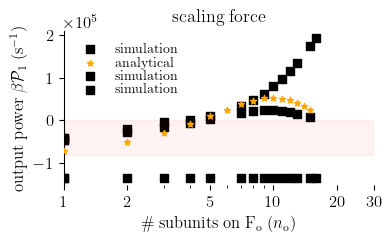

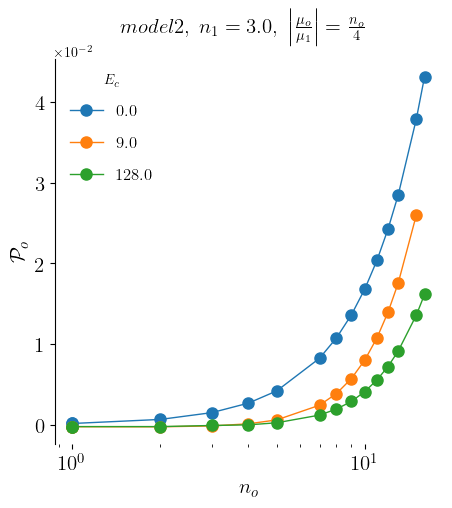

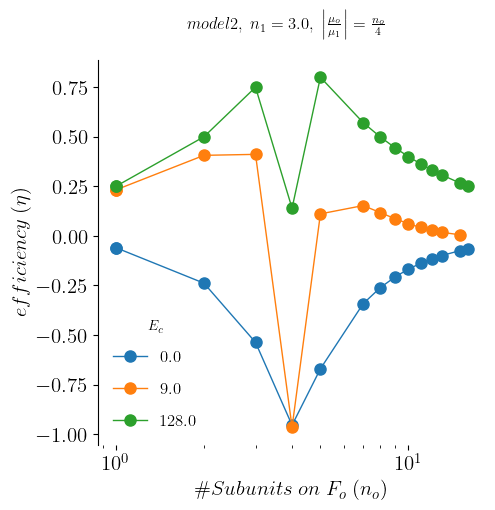

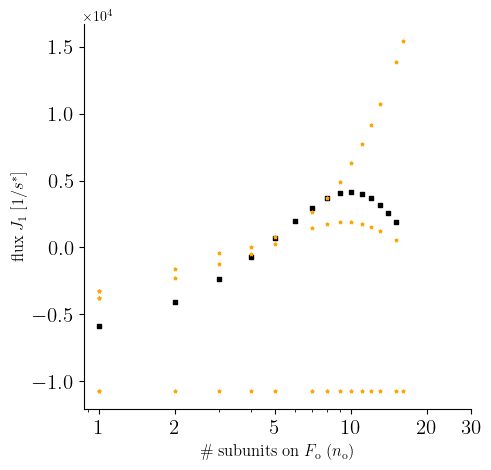

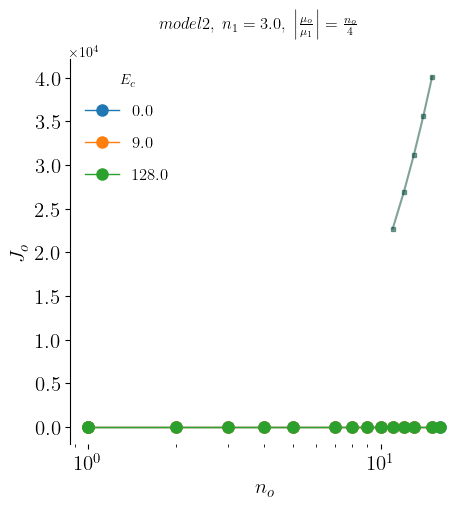

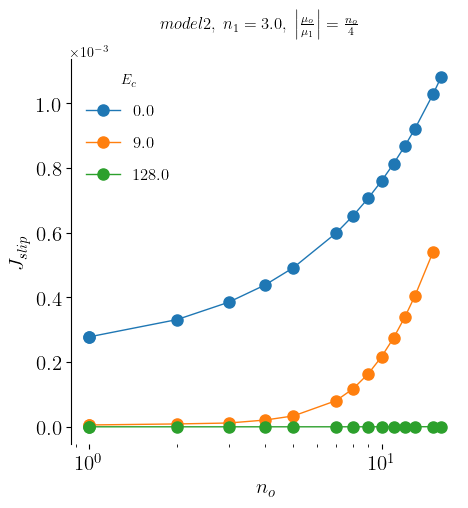

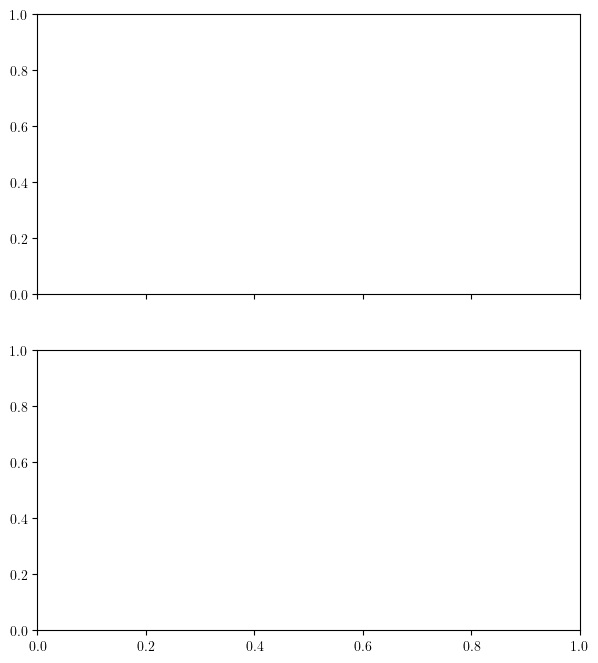

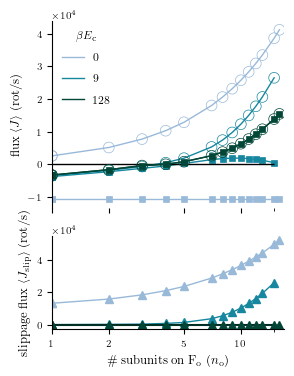

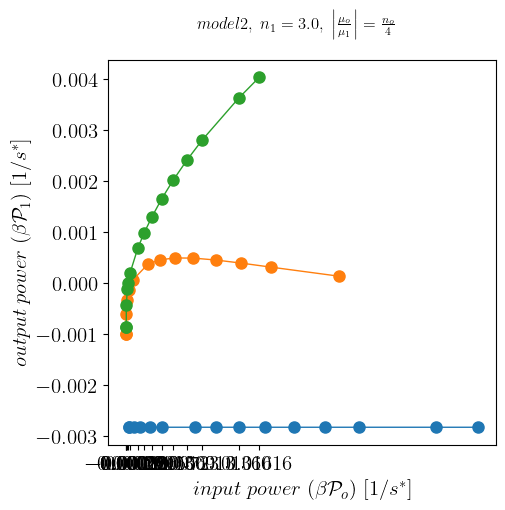

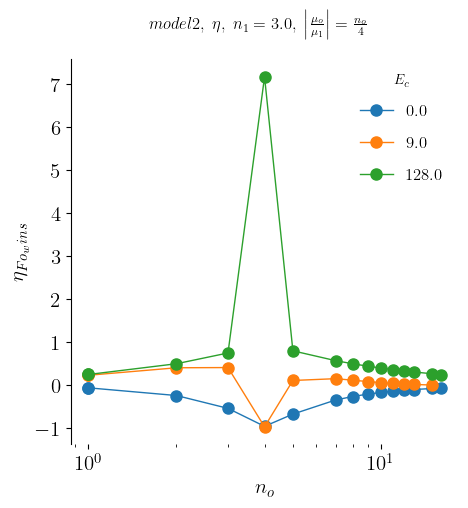

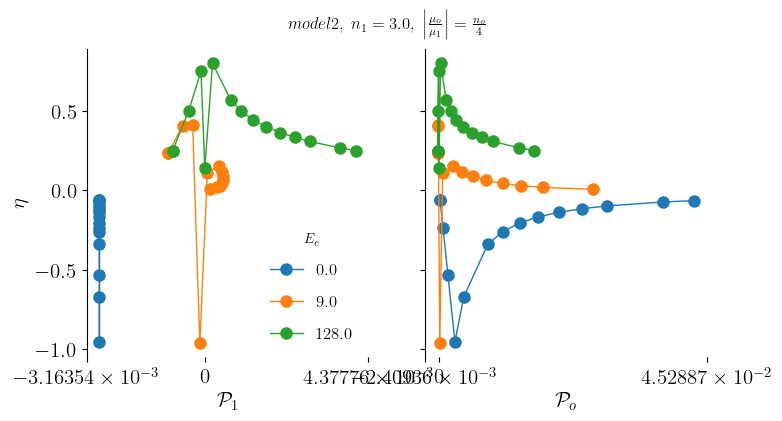

In [658]:
#A plot of P vs n0 for different Ec

Ecouple_array = [150.0]
model_array = ["model1", "model2","model3","model4"]
#model_array = ["model2"]

# target_dir ="/Users/sarealles/Desktop/model2/new_data_540_CM/f0_8/pfe/"
# target_dir="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_4/pfe/"

# target_dir = "/Users/sarealles/Desktop/model1/Data_N_360/cluster/pfe/"
#target_dir = "/Users/sarealles/Desktop/model1/Data_N_100/pfe/"
target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_2/f0_4/pfe/"
'''use this for paper orange stars'''
# target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_0/f0_4/pfe/"
# target_dir="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_4/pfe/"
'''model 2, f0=4???'''
# target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe_old/"
target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe/"
'''model2, f0=4, only Ec=10 to compare with analytical'''
# target_dir = "/Users/sarealles/Desktop/model2/data_1000_E0_2_mu0_4_n0_to_50_Ec_10/pfe/"
# target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM/E0_2/f0_4/pfe/"
'''model4, f0=4.0'''
# target_dir = "/Users/sarealles/Desktop/Data/"
'''model4, f0=4.0'''
# target_dir = "/Users/sarealles/Desktop/model3/new/pfe/"
'''model 1'''
# target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe/"
'''model1, f0=4.0,n1=5.0'''
# target_dir = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n0_5/pfe/"
'''model 1, f0=4.0,n1=9.0'''
# target_dir = "/Users/sarealles/Desktop/model1/test_n1_9/pfe/"
########
'''model 1, f0=4.0,n1=7.0'''
# target_dir = "/Users/sarealles/Desktop/model1/test_n0_5_vs_n1_7/pfe/"
#######
# target_dir = "/Users/sarealles/Desktop/model3/pfe/"
# target_dir ="/Users/sarealles/Desktop/model1/new_data_540_CM/f0_4/pfe/"
# target_dir ="/Users/sarealles/Desktop/model1/new/pfe/"    
#individual plots for each model
########
'''model 3, barrierless coupled Ec=10'''
# target_dir = "/Users/sarealles/Desktop/model3/test/pfe/"
# Ec_analytic_list = [(10.0,4)]


Ec_array = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,32.0,40.0,50.0,64.0,70.0,80.0,90.0,128.0] 
# Ec_array = [8.0,9.0,10.0,11.0,12.0]

# Ec_array = np.array([9.0,10.0,11.0, 12.0])

Ec_array = [7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0]

Ec_array = [9.0]
Ec_analytic_list = [(x,4) for x in Ec_array]
n1_array = [3.0]
n0_array = [12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,32.0,40.0] 
n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0] 
# n0_array = [8.0,9.0,10.0]
# n0_array = [1.0,2.0,3.0,4.0,5.0,6.0]

Ec_array = [0.0,9.0,128.0]
# target_dir = "/Users/sarealles/Desktop/model4/new/pfe/"
# target_dir="/Users/sarealles/Desktop/BFM/change_gamma_f1_0/pfe/"
# target_dir = "/Users/sarealles/Desktop/model4/new/pfe/"
x_lim = 15
for model in ["model2"]:
    plot_P_n0_individual(target_dir, model,n0_array,n1_array,Ec_array,Ec_analytic_list,x_lim,f0=4.0,f1=-2.0,dt=0.001,N=1000,E0=2.0,E1=2.0,vs_n0=True)
    plt.show()  


tarhet dir /Users/sarealles/Desktop/Data/Data_processed/pfe_old/
/Users/sarealles/Desktop/Data/Data_processed/pfe_old/9_3/model1_flux_power_efficiency_E0_2.0_E1_2.0_psi0_2.0_psi1_2.0_n0_9.0_n1_3.0_phase_0.0_outfile.datdoesnt exist


/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/1383857995.py:241: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(prop={'size': 12}, title='$E_c$', frameon=False, loc='best')
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/1383857995.py:243: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/1383857995.py:244: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
/var/folder

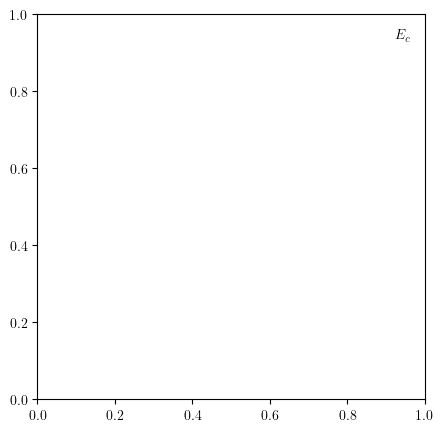

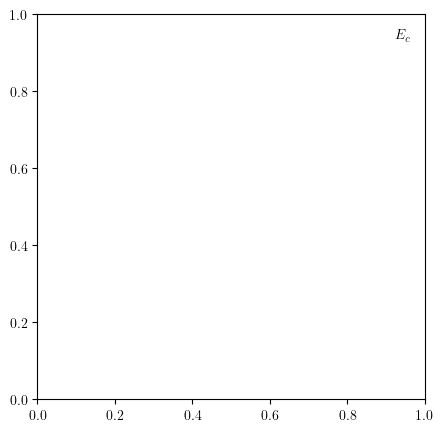

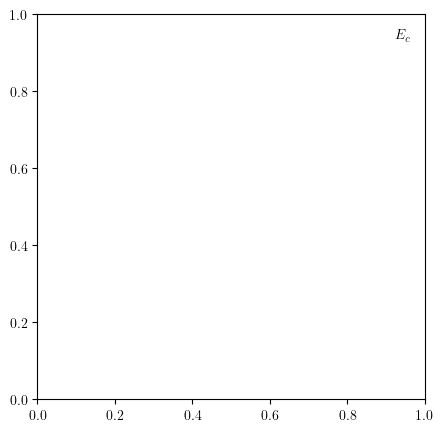

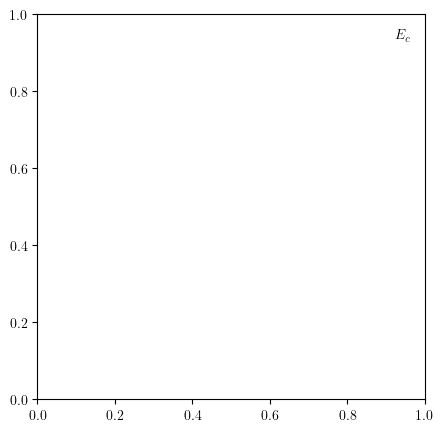

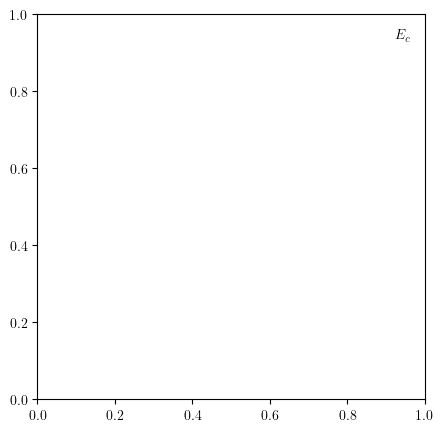

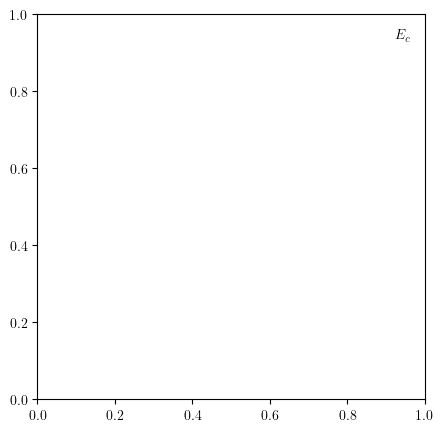

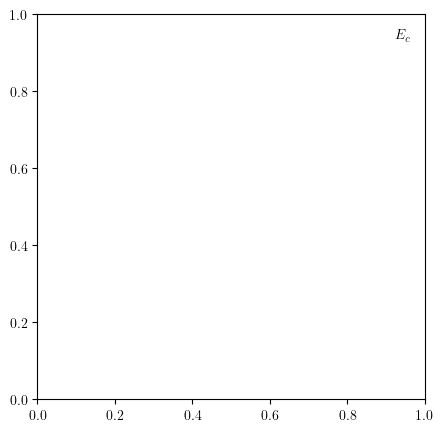

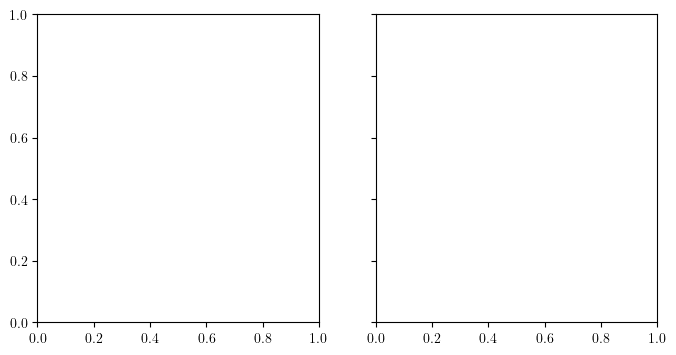

In [ ]:
# n0_array = [4.0,5.0,6.0,7.0,8.0]
# n0_array = [12.0,13.0]
n1_array = [3.0]
model_array = ["model2"]
# target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe/"
target_dir = "/Users/sarealles/Desktop/model2/new_data_540_CM"
target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe/"
target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe_old/"
Ecouple_array = [1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0]
E0_array = [2.0]
n0= 9.0
plot_All_vs_Ec(target_dir,"model1",n0,n1_array,E0_array)
#print("now for f=8")
#plot_fig_5_10(target_dir, set_params_Fo_8("model1", n0_array,3.0) ,model_array,n0_array,n1_array, E_array_full_fo_8,T= False)


## changing N with fixed dt to see if the negative slip problem would be solved

### Temperory calculation code:

In [8]:
'''temp calculate flux and power from reference file'''
#change the target_dir and params to evaluate different parameter data. 
# change N_array_full_fo_8 based on f0 (=4 or =8)

# n0_array = [1.0,2.0,6.0,12.0]
n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0]
n1_array = [3.0]
Ec_array_sorted = [2.0,4.0,8.0,16.0,32.0,64.0,128.0]
N_array_sorted = [1000,1000,1000,1000,1000,1000,1000,1000]
#model_array = ["model1","model2","model3","model4"]
model_array = ["model1"]
# target_dir = "/Volumes/Sara/model1/data_N_1000/moved_files/"
# target_dir_out = "/Users/sarealles/Desktop/model1/Data_N_1000/pfe/"
# /Users/sarealles/Desktop/model1/data_N_360/cluster/non-existing files.rtf
target_dir = "/Users/sarealles/Desktop/model1/data_N_360/cluster/"
target_dir_out = "'/Users/sarealles/Desktop/model1/data_N_360/cluster/pfe/" #be careful of the fo and f1 you're analyzing
psi_0 = 4.0
J0_end = []
J1_end = []
for n1 in n1_array:
    for n0 in n0_array:
        
        # n0n1_str = "n0"+"_"+str(n0)+"_"+"n1"+"_"+ str(n1)
        n0n1_str = str(int(n0))+"_"+str(int(n1))
        for model in model_array:
            df_file_path = target_dir + f'{int(n0)}_{int(n1)}.csv'
            
            if not os.path.exists(df_file_path):
                print(f"DataFrame file for n0={n0}, n1={n1} does not exist. Skipping...")
                continue

            df = pd.read_csv(df_file_path)
            # Filter the DataFrame based on n0, n1, model, and psi_0
            filtered_df = df[(df['n0'] == n0) & (df['n1'] == n1) & (df['Model'] == model) & (df['Psi_0'] == psi_0)]

            # Get the Ec and N values
            Ecouple_array = filtered_df['Ec'].values
            N_array = filtered_df['SqrtNumRows'].values
            dt_array = filtered_df['dt'].values
            
            # if len(Ecouple_array) == 0 or len(N_array) == 0:
            #     print(f"No data available for n0={n0}, n1={n1}, model={model}, and psi_0={psi_0}. Skipping...")
            #     continue
            sorted_indices = np.argsort(Ecouple_array)
            Ec_array_sorted = Ecouple_array[sorted_indices]
            N_array_sorted = N_array[sorted_indices]
            dt_array_sorted = dt_array[sorted_indices]
            print(Ec_array_sorted)
            print(N_array_sorted)
            print(dt_array_sorted)
            
        # n0n1_str = "n0"+"_"+str(n0)+"_"+"n1"+"_"+ str(n1)
        
            # print(Ec_array_sorted)
            # print(N_array_sorted)
            
            
            params = set_params_Fo_4(model, n0,n1)
            if not os.path.exists(target_dir_out + n0n1_str):
                os.makedirs(target_dir_out + n0n1_str)
            calculate_flux_power_and_efficiency(target_dir + n0n1_str ,target_dir_out + n0n1_str,Ec_array_sorted, params, N_array_sorted)
            #Ec_array = Ec_array_full.get(key,[])
        

[8.]
[360.]
[0.001]
model1 n0 = 1.0 n1= 3.0 f0= 4.00, <j0>=['2.63e-04']
model1 n0 = 1.0 n1= 3.0 f1= -2.00, <j1>=['-4.91e-06']
-------------------------------------------------------------------------------------
saved <_io.TextIOWrapper name="'/Users/sarealles/Desktop/model1/data_N_360/cluster/pfe/1_3/model1_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_1.0_n1_3.0_phase_0.0_outfile.dat" mode='w' encoding='utf-8'>
8.000000000000000e+00	2.630201003224621e-04	-4.908312178833591e-06	1.052080401289848e-03	9.816624357667183e-06	-9.330678858414264e-03	-9.330678858414264e-03

[]
[]
[]
model1 n0 = 2.0 n1= 3.0 f0= 4.00, <j0>=[]
model1 n0 = 2.0 n1= 3.0 f1= -2.00, <j1>=[]
-------------------------------------------------------------------------------------
saved <_io.TextIOWrapper name="'/Users/sarealles/Desktop/model1/data_N_360/cluster/pfe/2_3/model1_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_2.0_n1_3.0_phase_0.0_outfile.dat" mode='w' encoding='utf-8'>

[]
[]
[]
model1

### prob against ref for two arbitrary variables

In [417]:
def plot_probability_against_ref_two_arbit(target_dir_array, model_array, n0_array,n1_array,Ec_array,f0_array,N_array,x_array,x11_array,a_array,partial,E0_array=[2.0,2.0]):
    
    E0 = E0_array[0];E1 = E0_array[0];psi_1=-2.0;phase=0.0
    colormapp = cm.get_cmap("GnBu")
    if "model1" in model_array:
        colormapp = cm.get_cmap("cool")
    
    
    
    fig_tot, ax_tot = subplots(1, int(len(Ec_array)), figsize=(int(len(Ec_array)) * 7, 5), sharey=True)
    for idx, ax in enumerate(ax_tot):
        ax.set_title(rf"$n_{{\rm o}} = {int(n0_array[idx])}$", fontsize=16)
    prob_data = [
        loadtxt(
            target_dir_array[0]+"/"+f"{model_array[0]}"+ f"_t_reference_E0_{E0}_Ecouple_{Ec_array[0]}_E1_{E1}_psi0_{f0_array[0]}_psi1_{psi_1}_n0_{n0_array[0]}_n1_{n1_array[0]}_phase_{phase}_outfile.dat",
            usecols=(0,),
        ).reshape((N_array[0], N_array[0])),
        loadtxt(
            target_dir_array[1]+"/"+f"{model_array[1]}"+ f"_t_reference_E0_{E0}_Ecouple_{Ec_array[1]}_E1_{E1}_psi0_{f0_array[1]}_psi1_{psi_1}_n0_{n0_array[1]}_n1_{n1_array[1]}_phase_{phase}_outfile.dat",
            usecols=(0,),
        ).reshape((N_array[1], N_array[1]))
    ]
    vmin, vmax = min(prob.min() for prob in prob_data), max(prob.max() for prob in prob_data)
    print(f"Vmin = {vmin}, Vmax = {vmax}")

    for w,Ec in enumerate(Ec_array):
        n0 = n0_array[w]
        [
            __, __,__, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
            m0, m1, phase,beta, gamma,__
            ] = set_params(model_array[w], n0_array[w],n1_array[w],f0_array[w])
        # if Ec >= 8.0:
        #     x = 20
        # if Ec >= 16.0:
        #     x = 20

        # ax_tot[w].set_title(rf"$model {model_array[w][-1]}, n_o = {n0_array[w]}, n_1 = {n1_array[w]}, E_c = {Ec}, \mu_o = {f0_array[w]}$")
        ax_tot[w].spines['top'].set_visible(False)
        ax_tot[w].spines['right'].set_visible(False)
        ax_tot[w].spines['left'].set_visible(False)
        ax_tot[w].spines['bottom'].set_visible(False)
        ax_tot[w].set_xlim([0.0,360.005])
        ax_tot[0].set_ylim([0.0,360.005])
        ax_tot[w].set_xticks(arange(0, 361, 60), labels=[r"$0$", r"$\pi/3$", r"$2\pi/3$", r"$\pi$", r"$4\pi/3$",r"$5\pi/3$",r"$2\pi$"])
        ax_tot[0].set_yticks(arange(0, 361, 60), labels=[r"$0$", r"$\pi/3$", r"$2\pi/3$", r"$\pi$", r"$4\pi/3$",r"$5\pi/3$",r"$2\pi$"])
        ax_tot[0].set_ylabel(r"$\theta_{1}$", fontsize=20)
        ax_tot[w].set_xlabel(r"$\theta_{\rm o}$", fontsize=20)
        
        fig_model1, ax_model1 = subplots()
        # fig_model1.suptitle(fr"$ model {model_array[w][-1]}, n_o = {n0_array[w]},\ n_1 = {n1_array[w]},\ Ec = {Ec_array[w]},\ f_o = {f0_array[w]}$", fontsize=16)

        
        N1 = N_array[w]
        dx1 = (2*pi)/N1
        

        
        positions1 = arange(0.0, 2*pi, dx1)

        
        
        data1 = loadtxt(target_dir_array[w]+"/"+f"{model_array[w]}"+"_t_reference_E0_{0}_Ecouple_{1}_E1_{2}_psi0_{3}_psi1_{4}_n0_{5}_n1_{6}_phase_{7}_outfile.dat".format( E0,Ec_array[w],E1, f0_array[w], psi_1,n0_array[w],n1_array[w],phase),usecols=(0,3,4,5,6,7,8))

        
        prob1 = data1[:,0].reshape((N1,N1))
        P = data1[:,0]
        
        drift_at_pos1 = data1[:,1:3].T.reshape((2,N1,N1))
        diffusion_at_pos1 = data1[:,3:].T.reshape((4,N1,N1))
        

        
        flux_array1 = empty((2,N1,N1))

        calc_flux(positions1, prob1, drift_at_pos1,diffusion_at_pos1, flux_array1, N1, dx1)
        flux_array1 = asarray(flux_array1) / (dx1 * dx1)



        # select fewer arrows to draw
        M1 = N1//x_array[w]
        M11 = N1//x11_array[w]
        M111 = M1
        a = a_array[w]
        # number of arrows in a row/ column, preferably a number such that N/M is an integer.
        fluxX1 = empty((M1, M1))
        fluxY1 = empty((M1, M1))
        

        

        for k in range(M1):
            # print(fr"N1 is {N1}, M1 is {M1}")
            # print(flux_array1[0, ...][int(N1 / M1) * k, ::int(N1 / M1)])
            fluxX1[k] = flux_array1[0, ...][int(N1 / M1) * k, ::int(N1 / M1)]
            fluxY1[k] = flux_array1[1, ...][int(N1 / M1) * k, ::int(N1 / M1)]
       
        t_m1 = ax_model1.contourf(positions1 * (180/pi), positions1 * (180/pi), prob1.T, 10,cmap=colormapp)
        ''''first'''
        
        # Calculate the magnitude considering absolute values
        magnitudes = np.sqrt((np.abs(fluxX1.T))**2 + (np.abs(fluxY1.T))**2)

        # Find the smallest non-zero magnitude
        threshold = np.min(magnitudes[magnitudes > 0])

        # Zero out vectors with the smallest magnitude
        fluxX1_adjusted = np.where(magnitudes < a*threshold, nan, fluxX1.T)
        fluxY1_adjusted = np.where(magnitudes < a*threshold, nan, fluxY1.T)

        # Plot the quiver with the adjusted flux values
        # stretch_factor = 2  # Increase for stronger effect
        # fluxX1_scaled = ((fluxX1_adjusted - np.min(fluxX1_adjusted)) / 
        #         (np.max(fluxX1_adjusted) - np.min(fluxX1_adjusted)))
        # fluxY1_scaled = ((fluxY1_adjusted - np.min(fluxY1_adjusted)) / 
        #         (np.max(fluxY1_adjusted) - np.min(fluxY1_adjusted)))
        # ax_model1.quiver(
        #     positions1[::int(N1 / M1)] * (180 / np.pi),
        #     positions1[::int(N1 / M1)] * (180 / np.pi),
        #     np.sign(fluxX1_scaled - 0.5) * np.abs(fluxX1_scaled - 0.5) ** stretch_factor * 2,
        #     np.sign(fluxY1_scaled - 0.5) * np.abs(fluxY1_scaled - 0.5) ** stretch_factor * 2,
        #     scale_units='xy')
        '''second strategy'''
        ax_model1.quiver(
            positions1[::int(N1 / M1)] * (180 / np.pi),
            positions1[::int(N1 / M1)] * (180 / np.pi),
            fluxX1_adjusted,
            fluxY1_adjusted,
            scale_units='xy')
        ######################

        '''initial apprach
        '''
        # ax_model1.quiver(positions1[::int(N1 / M1)] * (180/pi), positions1[::int(N1 / M1)] * (180/pi), fluxX1.T, fluxY1.T,scale_units='xy')
        s = fluxY1.sum(axis=None)
        print(fr"fluxY1 is {s}")
        
        tot = ax_tot[w].contourf(positions1 * (180/pi), positions1 * (180/pi), prob1.T, 10,cmap=colormapp,vmin=vmin, vmax=vmax)
        # ax_tot[w].quiver(positions1[::int(N1 / M1)] * (180/pi), positions1[::int(N1 / M1)] * (180/pi), fluxX1.T, fluxY1.T,scale_units='xy')
        '''scaled axis length'''
        ax_tot[w].quiver(positions1[::int(N1 / M1)] * (180/pi), positions1[::int(N1 / M1)] * (180/pi), fluxX1_adjusted, fluxY1_adjusted,scale_units='xy', scale=0.000005)

        
        ax_model1.plot(linspace(0,360,1000), linspace(0,360,1000), color='red')
        
        
        ax_model1.set_xlim([0.0,361.0])
        ax_model1.set_xticks(arange(0, 361, 60), labels=[r"$0$", r"$\pi/3$", r"$2\pi/3$", r"$\pi$", r"$4\pi/3$",r"$5\pi/3$",r"$2\pi$"])
        ax_model1.set_yticks(arange(0, 361, 60), labels=[r"$0$", r"$\pi/3$", r"$2\pi/3$", r"$\pi$", r"$4\pi/3$",r"$5\pi/3$",r"$2\pi$"])
        ax_model1.set_ylabel(r"$\theta_{1}$", fontsize=20)

        ax_model1.set_xlabel(r"$\theta_{\rm o}$", fontsize=20)
        
        ax_model1.spines['top'].set_visible(False)
        ax_model1.spines['right'].set_visible(False)
        ax_model1.spines['left'].set_visible(False)
        ax_model1.spines['bottom'].set_visible(False)
       
        sfmt=ticker.ScalarFormatter()
        sfmt.set_powerlimits((0, 0))
        cbar1=fig_model1.colorbar(t_m1, ax=ax_model1, format=sfmt)
        cbar1.ax.tick_params(labelsize=10, axis='y')
        cbar1.ax.yaxis.offsetText.set_fontsize(10)
        # fig_model1.savefig(fr"/Users/sarealles/Desktop/research/Paper/Prob_mod{model_array[w][-1]}_Ec_var_n0_{n0_array[w]}_fo_4_scaled.pdf")
        
        if partial:
            fig_model_p, ax_model_p = subplots()
            # fig_model_p.suptitle(fr"$ {model}, n_o = {n0},\ n_1 = {n1},\ Ec = {Ec},\ f_o = {psi_0}$", fontsize=16)
            
            # Define positions for the landscape
            positions1 = arange(0.0, (2 * pi / 3)+ dx1, dx1)
            
            # Initialize flux arrays
            fluxX1 = empty((M111, M111))
            fluxY1 = empty((M111, M111))

            # Fill the flux arrays
            for k in range(M111):
                fluxX1[k] = flux_array1[0, ...][int(N1 / M111) * k, ::int(N1 / M111)]
                fluxY1[k] = flux_array1[1, ...][int(N1 / M111) * k, ::int(N1 / M111)]
            
            # Take a subset of the flux arrays
            fX1 = fluxX1[0:(len(fluxX1) // 3)+1, 0:(len(fluxX1) // 3)+1]
            fY1 = fluxY1[0:(len(fluxX1) // 3)+1, 0:(len(fluxX1) // 3)+1]
            
            # Calculate the magnitude considering absolute values
            magnitudes = np.sqrt((np.abs(fX1.T))**2 + (np.abs(fY1.T))**2)

            # Find the smallest non-zero magnitude
            threshold = np.min(magnitudes[magnitudes > 0])

            # Zero out vectors with the smallest magnitude
            fluxX1_adjusted = np.where(magnitudes < a*threshold, nan, fX1.T)
            fluxY1_adjusted = np.where(magnitudes < a*threshold, nan, fY1.T)
            
            if True:
                l = len(fX1[0,:])
                fX1_mod_over = zeros((l,l))
                fY1_mod_over = zeros((l,l))
                fX1_mod_under = zeros((l,l))
                fY1_mod_under = zeros((l,l))

                for i in range(l):
                    for j in range(l):
                        if j<i:
                            fX1_mod_under[i,j]=fX1[i,j]
                            fY1_mod_under[i,j]=fY1[i,j]
                        elif j>i:
                            fX1_mod_over[i,j]=fX1[i,j]
                            fY1_mod_over[i,j]=fY1[i,j]
                # print(f"sum of flux array under the x=y: fX={trapz(trapz(fX1_mod_under, dx=x11*dx1, axis=1), dx=x11*dx1)}, fY={trapz(trapz(fY1_mod_under, dx=x11*dx1, axis=1), dx=x11*dx1)}")
                # print(f"sum of flux array over the x=y: fX={trapz(trapz(fX1_mod_over, dx=x11*dx1, axis=1), dx=x11*dx1)}, fY={trapz(trapz(fY1_mod_over, dx=x11*dx1, axis=1), dx=x11*dx1)}")
                            

            # Verify dimensions are compatible
            xcoordinate = positions1[::int(N1 / M111)] * (180 / pi)
            print(f"Length of xcoordinate: {len(xcoordinate)}")
            
            if len(fX1) != len(xcoordinate):
                print(f"Mismatch in dimensions: fX1 is {len(fX1)}, but xcoordinate is {len(xcoordinate)}")

            # Plot the contour
            t_m1 = ax_model_p.contourf(positions1 * (180 / pi), positions1 * (180 / pi), prob1[0:int(N1 / 3) +2, 0:int(N1 / 3)+2].T, levels=10, cmap=cm.get_cmap("GnBu"))
            
            # Plot quiver arrows, ensure dimensions match
            if fluxX1_adjusted.shape == fluxY1_adjusted.shape == (len(xcoordinate), len(xcoordinate)):
                ax_model_p.quiver(xcoordinate, xcoordinate, fluxX1_adjusted, fluxY1_adjusted, scale_units='xy', scale=5)
            else:
                print(f"Quiver dimension mismatch: fX1 shape {fluxX1_adjusted.shape}, fY1 shape {fluxY1_adjusted.shape}, xcoordinate shape {xcoordinate.shape}")
            
            # Sum fluxY1 for debugging
            # s = fluxY1.sum(axis=None)
            # print(fr"fluxY1 sum is {s}")
            
            # Plot diagonal line
            ax_model_p.plot(linspace(0, 120, 120), linspace(0, 120, 120), color='red', linestyle='--')
            
            # Set axis limits and labels
            
            ax_model_p.set_xticks(arange(0, 121, 30), labels=[r"$0$", r"$\pi/6$", r"$\pi/3$", r"$\pi/2$", r"$2\pi/3$"])
            ax_model_p.set_yticks(arange(0, 121, 30), labels=[r"$0$", r"$\pi/6$", r"$\pi/3$", r"$\pi/2$", r"$2\pi/3$"])
            ax_model_p.set_ylabel(r"$\theta_{1}$", fontsize=20)
            ax_model_p.set_xlabel(r"$\theta_{\rm o}$", fontsize=20)
            ax_model_p.set_xlim([0.0, 120.0])
            
            ax_model_p.spines['top'].set_visible(False)
            ax_model_p.spines['right'].set_visible(False)
            ax_model_p.spines['left'].set_visible(False)
            ax_model_p.spines['bottom'].set_visible(False)
            # Set colorbar
            sfmt = ticker.ScalarFormatter()
            sfmt.set_powerlimits((0, 0))
            cbar11 = fig_model_p.colorbar(t_m1, ax=ax_model_p, format=sfmt)
            cbar11.ax.tick_params(labelsize=10, axis='y')
            cbar11.ax.yaxis.offsetText.set_fontsize(10)
            cbar11.set_label(r"$P_{\rm ss}(\theta_{1}, \theta_{\rm o})$", fontsize=12)
            ax_model_p.set_title(fr"$n_{{\rm o}} = {int(n0)}$", fontsize=16)
            n1 = n1_array[w]
            # fig_model_p.savefig(fr"/Users/sarealles/Desktop/research/Paper/partial_Flux_ref_{model}_N_{N1}_no_{n0}_n1_{n1}_EC_{Ec}_fo_{psi_0}.pdf", bbox_inches='tight', dpi=300)

        ax_tot[w].set_xlim([0.0,360])
        ax_tot[w].set_ylim([0.0,360])
        
    # cbar = fig_tot.colorbar(tot, ax=ax_tot, format=ticker.ScalarFormatter())
    cbar = fig_tot.colorbar(
    plt.cm.ScalarMappable(cmap=colormapp, norm=plt.Normalize(vmin=vmin, vmax=vmax)),
    ax=ax_tot.ravel().tolist(),
    orientation='vertical',  # Or 'horizontal', depending on your preference
    format=ticker.ScalarFormatter())
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(r"$P_{\rm ss}(\theta_{1}, \theta_{\rm o})$", fontsize=12)
    cbar.ax.yaxis.offsetText.set_fontsize(15)
    cbar.ax.tick_params(labelsize=10, axis='y')
    cbar.ax.yaxis.offsetText.set_fontsize(10)
    # fig_tot.savefig(fr"/Users/sarealles/Desktop/research/Thesis/Figures/Prob_mod3_mod3_barrierless_Ec_5_vs_10_n0_5.pdf", bbox_inches='tight', dpi=300)



/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/1866323436.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormapp = cm.get_cmap("GnBu")
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/1866323436.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormapp = cm.get_cmap("cool")


FileNotFoundError: /Users/sarealles/Desktop/model1/Data_N_540/model1_t_reference_E0_0.0_Ecouple_12.0_E1_0.0_psi0_4.0_psi1_-2.0_n0_3.0_n1_3.0_phase_0.0_outfile.dat not found.

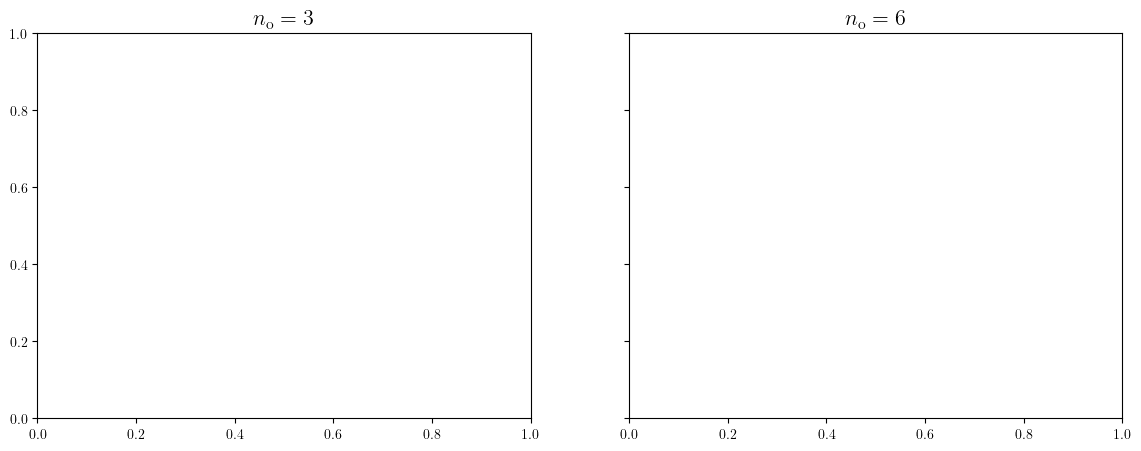

In [693]:
# flux on probability two comaprison
target_dir = "/Volumes/Sara/Data/fo_4_f1_-2"
target_dir = "/Users/sarealles/Desktop/model1/data_N_100"
target_dir = "/Volumes/Backup2/model1/data_N_1000/sep2024"
target_dir = "/Users/sarealles/Desktop/sep2024"
target_dir = "/Users/sarealles/Desktop/model3/cluster"
# target_dir = "/Users/sarealles/Desktop/model1/cluster"
'''model1,3'''
target_dir_array = ["/Users/sarealles/Desktop/model1/cluster","/Users/sarealles/Desktop/model3/cluster"]
model_array = ["model1","model3"]
n0_array = [3.0,3.0]
n1_array = [3.0,3.0]
f0_array = [8.0,8.0]
N_array = [500,1000]
x_array = [25,50]
x1_array = [100,200]
Ec_array=[8.0,5.0]

#####################
'''model3,4,f0=8,Ec=2,n0=2,10'''
target_dir_array = ["/Users/sarealles/Desktop/research/GP-Mar2025","/Users/sarealles/Desktop/research/GP-Mar2025"]
model_array = ["model4","model4"]
n0_array = [3.0,6.0]
n1_array = [3.0,3.0]
f0_array = [8.0,8.0]
N_array = [2000,2000]
a_array = [2,2]
x_array = [100,100]
x1_array = [50,50]
Ec_array=[4.0,4.0]
#################
#####################
'''model3,3,f0=4,barrierless,Ec=100,n0=3,6'''
target_dir_array = ["/Users/sarealles/Desktop/model3/test","/Users/sarealles/Desktop/model3/test"]
model_array = ["model3","model3"]
n0_array = [1.0,2.0]
n1_array = [3.0,3.0]
f0_array = [4.0,4.0]
N_array = [1000,1000]
a_array = [0,0]
x_array = [100,100]
x1_array = [5,5]
Ec_array=[10.0,10.0]
E0_array=[0.0,0.0]
##################
'''model1,1'''
target_dir_array = ["/Users/sarealles/Desktop/model1/Data_N_540","/Users/sarealles/Desktop/model1/Data_N_540"]
model_array = ["model1","model1"]
n0_array = [3.0,6.0]
n1_array = [3.0,3.0]
f0_array = [4.0,4.0]
N_array = [540,540]
a_array = [30,30]
x_array = [15,12]
x1_array = [10,10]
Ec_array=[12.0,12.0]
##############
partial=False

plot_probability_against_ref_two_arbit(target_dir_array, model_array, n0_array,n1_array,Ec_array,f0_array,N_array,x_array,x1_array,a_array,partial,E0_array)


In [133]:
def plot_probability_against_ref(target_dir, params,model, n0,n1,Ec_list,N,x,x11,partial_landscape=True):
    
    [
            E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
            m0, m1, phase,beta, gamma,__
            ] = params
    
    
    fig_tot, ax_tot = subplots(1,int(len(Ec_list)), figsize=(24,4))
    prob_data = [
        loadtxt(
            target_dir+"/"+f"{model}"+ f"_t_reference_E0_{E0}_Ecouple_{Ec}_E1_{E1}_psi0_{psi_0}_psi1_{psi_1}_n0_{n0}_n1_{n1}_phase_{phase}_outfile.dat",
            usecols=(0,),
        ).reshape((N, N))
        for Ec in Ec_list
    ]
    vmin, vmax = min(prob.min() for prob in prob_data), max(prob.max() for prob in prob_data)

    
    for w,Ec in enumerate(Ec_list):
        # if Ec >= 8.0:
        #     x = 20
        # if Ec >= 16.0:
        #     x = 20

        ax_tot[w].set_title(rf"$E_c = {Ec}$")
        ax_tot[w].spines['top'].set_visible(False)
        ax_tot[w].spines['right'].set_visible(False)
        ax_tot[w].spines['left'].set_visible(False)
        ax_tot[w].spines['bottom'].set_visible(False)
        ax_tot[w].set_xticks(arange(0, 361, 60), labels=['$0$', r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$", r"$\frac{4\pi}{3}$",r"$\frac{5\pi}{3}$", r"$2\pi$"])
        ax_tot[w].set_yticks(arange(0, 361, 60), labels=['$0$', r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$", r"$\frac{4\pi}{3}$",r"$\frac{5\pi}{3}$", r"$2\pi$"])
        ax_tot[0].set_ylabel(r"$\theta_{1}$", fontsize=20)
        ax_tot[w].set_xlabel(r"$\theta_{0}$", fontsize=20)
        
        fig_model1, ax_model1 = subplots()
        fig_model1.suptitle(fr"$ model {model[-1]}, n_o = {n0},\ n_1 = {n1},\ Ec = {Ec},\ f_o = {psi_0}$", fontsize=16)

        
        N1 = N
        dx1 = (2*pi)/N1
        

        
        positions1 = arange(0.0, 2*pi, dx1)

        
        
        data1 = loadtxt(target_dir+"/"+f"{model}"+"_t_reference_E0_{0}_Ecouple_{1}_E1_{2}_psi0_{3}_psi1_{4}_n0_{5}_n1_{6}_phase_{7}_outfile.dat".format( E0,Ec,E1, psi_0, psi_1,n0,n1,phase),usecols=(0,3,4,5,6,7,8))

        
        prob1 = data1[:,0].reshape((N1,N1))
        P = data1[:,0]
        if not ( P >= 0.0).all():
            print(f"N = {N}, n0 = {n0}, Ec = {Ec} has negative prob")
            # check the normalization
        if not abs(P.sum(axis=None) - 1.0).__abs__() <= finfo('float32').eps :
            print(f"N = {N}, n0 = {n0}, Ec = {Ec} is not normalized, P sum is {P.sum(axis=None)}")

        
        drift_at_pos1 = data1[:,1:3].T.reshape((2,N1,N1))
        diffusion_at_pos1 = data1[:,3:].T.reshape((4,N1,N1))
        

        
        flux_array1 = empty((2,N1,N1))

        calc_flux(positions1, prob1, drift_at_pos1,diffusion_at_pos1, flux_array1, N1, dx1)
        flux_array1 = asarray(flux_array1) / (dx1 * dx1)



        # select fewer arrows to draw
        M1 = N//x
        M11 = N//x11
        # number of arrows in a row/ column, preferably a number such that N/M is an integer.
        fluxX1 = empty((M1, M1))
        fluxY1 = empty((M1, M1))
        

        

        for k in range(M1):
            # print(fr"N1 is {N1}, M1 is {M1}")
            # print(flux_array1[0, ...][int(N1 / M1) * k, ::int(N1 / M1)])
            fluxX1[k] = flux_array1[0, ...][int(N1 / M1) * k, ::int(N1 / M1)]
            fluxY1[k] = flux_array1[1, ...][int(N1 / M1) * k, ::int(N1 / M1)]
       
        t_m1 = ax_model1.contourf(positions1 * (180/pi), positions1 * (180/pi), prob1.T, 10,cmap=cm.get_cmap("cool"))
        ax_model1.quiver(positions1[::int(N1 / M1)] * (180/pi), positions1[::int(N1 / M1)] * (180/pi), fluxX1.T, fluxY1.T,scale_units='xy')
        s = fluxY1.sum(axis=None)
        print(fr"fluxY1 is {s}")
        
        tot = ax_tot[w].contourf(positions1 * (180/pi), positions1 * (180/pi), prob1.T, 10,cmap=cm.get_cmap("cool"),vmin=vmin, vmax=vmax)
        ax_tot[w].quiver(positions1[::int(N1 / M1)] * (180/pi), positions1[::int(N1 / M1)] * (180/pi), fluxX1.T, fluxY1.T,scale_units='xy')
        
        
        ax_model1.plot(linspace(0,360,1000), linspace(0,360,1000), color='red')
        
        
        ax_model1.set_xlim([0.0,360.0])
        ax_model1.set_xticks(arange(0, 361, 60), labels=['0', r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$", r"$\frac{4\pi}{3}$",r"$\frac{5\pi}{3}$", r"$2\pi$"])
        ax_model1.set_yticks(arange(0, 361, 60), labels=['0', r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$", r"$\frac{4\pi}{3}$",r"$\frac{5\pi}{3}$", r"$2\pi$"])
        ax_model1.set_ylabel(r"$\theta_{1}$", fontsize=20)

        ax_model1.set_xlabel(r"$\theta_{0}$", fontsize=20)
        
        ax_model1.spines['top'].set_visible(False)
        ax_model1.spines['right'].set_visible(False)
        ax_model1.spines['left'].set_visible(False)
        ax_model1.spines['bottom'].set_visible(False)
       
        sfmt=ticker.ScalarFormatter()
        sfmt.set_powerlimits((0, 0))
        cbar1=fig_model1.colorbar(t_m1, ax=ax_model1, format=sfmt)
        cbar1.ax.tick_params(labelsize=10, axis='y')
        cbar1.ax.yaxis.offsetText.set_fontsize(10)
        
        
        # fig_model1.savefig(fr"/Users/sarealles/Desktop/research/nov24/Flux_ref_model3_N_{N}_no_{n0}_n1_{n1}_EC_{Ec}_fo_{psi_0}.pdf")
        if partial_landscape:
            fig_model11, ax_model11 = subplots()
            fig_model11.suptitle(fr"$ model 3, n_o = {n0},\ n_1 = {n1},\ Ec = {Ec},\ f_o = {psi_0}$", fontsize=16)
            
            # Define positions for the landscape
            positions1 = arange(0.0, 2 * pi / 3, dx1)
            
            # Initialize flux arrays
            fluxX1 = empty((M11, M11))
            fluxY1 = empty((M11, M11))

            # Fill the flux arrays
            for k in range(M11):
                fluxX1[k] = flux_array1[0, ...][int(N1 / M11) * k, ::int(N1 / M11)]
                fluxY1[k] = flux_array1[1, ...][int(N1 / M11) * k, ::int(N1 / M11)]
            
            # Take a subset of the flux arrays
            fX1 = fluxX1[0:len(fluxX1) // 3 + 1,0:len(fluxX1) // 3 + 1]
            fY1 = fluxY1[0:len(fluxX1) // 3 + 1,0:len(fluxX1) // 3 + 1]
            if True:
                l = len(fX1[0,:])
                fX1_mod_over = zeros((l,l))
                fY1_mod_over = zeros((l,l))
                fX1_mod_under = zeros((l,l))
                fY1_mod_under = zeros((l,l))

                for i in range(l):
                    for j in range(l):
                        if j<i:
                            fX1_mod_under[i,j]=fX1[i,j]
                            fY1_mod_under[i,j]=fY1[i,j]
                        elif j>i:
                            fX1_mod_over[i,j]=fX1[i,j]
                            fY1_mod_over[i,j]=fY1[i,j]
                print(f"sum of flux array under the x=y: fX={trapz(trapz(fX1_mod_under, dx=x11*dx1, axis=1), dx=x11*dx1)}, fY={trapz(trapz(fY1_mod_under, dx=x11*dx1, axis=1), dx=x11*dx1)}")
                print(f"sum of flux array over the x=y: fX={trapz(trapz(fX1_mod_over, dx=x11*dx1, axis=1), dx=x11*dx1)}, fY={trapz(trapz(fY1_mod_over, dx=x11*dx1, axis=1), dx=x11*dx1)}")
                            

            # Verify dimensions are compatible
            xcoordinate = positions1[::int(N1 / M11)] * (180 / pi)
            
            if len(fX1) != len(xcoordinate):
                print(f"Mismatch in dimensions: fX1 is {len(fX1)}, but xcoordinate is {len(xcoordinate)}")

            # Plot the contour
            t_m1 = ax_model11.contourf(positions1 * (180 / pi), positions1 * (180 / pi), prob1[0:int(N1 / 3) + 1, 0:int(N1 / 3) + 1].T, 10, cmap=cm.get_cmap("cool"))
            
            # Plot quiver arrows, ensure dimensions match
            if fX1.T.shape == fY1.T.shape == (len(xcoordinate), len(xcoordinate)):
                ax_model11.quiver(xcoordinate, xcoordinate, fX1.T, fY1.T, scale_units='xy')
            else:
                print(f"Quiver dimension mismatch: fX1 shape {fX1.T.shape}, fY1 shape {fY1.T.shape}, xcoordinate shape {xcoordinate.shape}")
            
            # Sum fluxY1 for debugging
            s = fluxY1.sum(axis=None)
            print(fr"fluxY1 sum is {s}")
            
            # Plot diagonal line
            ax_model11.plot(linspace(0, 120, 120), linspace(0, 120, 120), color='red', linestyle='--')
            
            # Set axis limits and labels
            ax_model11.set_xlim([0.0, 120.0])
            ax_model11.set_xticks(arange(0, 121, 30), labels=[r"$0$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$",r"$\frac{\pi}{2}$",r"$\frac{2\pi}{3}$"])
            ax_model11.set_yticks(arange(0, 121, 30), labels=[r"$0$", r"$\frac{\pi}{6}$", r"$\frac{\pi}{3}$",r"$\frac{\pi}{2}$",r"$\frac{2\pi}{3}$"])
            ax_model11.set_ylabel(r"$\theta_{1}$", fontsize=20)
            ax_model11.set_xlabel(r"$\theta_{0}$", fontsize=20)

            ax_model11.spines['top'].set_visible(False)
            ax_model11.spines['right'].set_visible(False)
            ax_model11.spines['left'].set_visible(False)
            ax_model11.spines['bottom'].set_visible(False)
            # Set colorbar
            sfmt = ticker.ScalarFormatter()
            sfmt.set_powerlimits((0, 0))
            cbar11 = fig_model11.colorbar(t_m1, ax=ax_model11, format=sfmt)
            cbar11.ax.tick_params(labelsize=10, axis='y')
            cbar11.ax.yaxis.offsetText.set_fontsize(10)
            # fig_model11.savefig(fr"/Users/sarealles/Desktop/research/nov24/partial_Flux_ref_model3_N_{N}_no_{n0}_n1_{n1}_EC_{Ec}_fo_{psi_0}.pdf")
    cbar = fig_tot.colorbar(tot, ax=ax_tot, format=ticker.ScalarFormatter())
    cbar.ax.tick_params(labelsize=10, axis='y')
    cbar.ax.yaxis.offsetText.set_fontsize(10)
    # fig_tot.savefig(fr"/Users/sarealles/Desktop/research/nov24/Several_Ec_less_nodes_{model}_N_{N}_no_{n0}_n1_{n1}_fo_{psi_0}.pdf")

sum of flux array under the x=y: fX=0.0001192989340088691, fY=0.0001149354621500131
sum of flux array over the x=y: fX=1.7861999688240934e-05, fY=0.0001149354621500131


sum of flux array under the x=y: fX=0.00011534298390685422, fY=0.00011022145204472281
sum of flux array over the x=y: fX=1.5186227600387369e-05, fY=0.00011022145204472281

## EMMA

In [ ]:
#Emma's temp A plot of P vs n0 for different Ec


model_array = ["model1"]
#model_array = ["model2"]
target_dir = "/Users/sarealles/Desktop/model1/data_N_360_Emma/"


    
#individual plots for each model
Ec_array = [128.0] 
n1_array = [3.0]
n0_array = [1.0,2.0,6.0,12.0]
for model in ["model1"]:
    plot_P_n0_individual_emma(target_dir, model,n0_array,n1_array,Ec_array)
    plt.show()  


dt=0.01 N=100, Ec = [0.0,2.0,4.0,8.0,16.0,32.0] 

In [ ]:
J0:  [0.0006001169557256519, 0.0005571876078283408, 0.0005132610732541282, 0.0004794501703726092, 0.0004557484352972791, 0.0004394161207567396, 0.0004199814107760717, 0.0004141673229038967, 0.0004099268195079554, 0.0004068278420882085, 0.0004045906834515958, 0.0004030324670224746, 0.0004020330510070544, 0.0004015152835220625, 0.0004014279154463757]
J1:  [-0.0002213165453467388, -0.000221042802227152, -0.0002206571264203388, -0.0002203269021275598, -0.0002200956099305032, -0.0002199487944640196, -0.0002198221068993342, -0.0002198110897012464, -0.0002198218000226666, -0.0002198480883873611, -0.0002198855995375041, -0.0002199311778178736, -0.0002199824617694406, -0.0002200383104207735, -0.0002200963754439899]
n0:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]
J0_01_2:  [0.000575770805793011, 0.0005313563524613992, 0.0004895206358403195, 0.0004564553786827517, 0.0004345776932545126, 0.0004196042116368104, 0.0004017858191928461, 0.0003964327439863148, 0.0003925144198515982, 0.0003896399295699468, 0.0003875565915779105, 0.0003860994521329377, 0.0003851603999117592, 0.0003846705142871184, 0.0003845840717821411]
J1_01_2:  [-0.0002066923722946739, -0.0002052571467763581, -0.0002045370847780821, -0.0002034039928024317, -0.0002031985986463451, -0.0002031939431511722, -0.0002033894666598051, -0.0002035123235113602, -0.0002036342785467086, -0.0002037516321757193, -0.0002038632682110261, -0.0002039691285730667, -0.0002040695315505751, -0.000204165521164088, -0.0002042566632929338]
n0_01_2:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]
J0:  [0.0005023138023044358, 0.0004554675735137292, 0.0004244690813829041, 0.0003904507612053822, 0.0003736278261386601, 0.0003622637650132251, 0.0003486676603218214, 0.0003445013157292668, 0.0003414018096842336, 0.0003390848044776988, 0.0003373676292946453, 0.0003361315818319576, 0.0003352994916204141, 0.0003348234462483954, 0.000334671605929348]
J1:  [-0.0001621150691815953, -0.0001580520036444324, -0.0001582018102869719, -0.0001540618926554713, -0.0001539919932643457, -0.0001542952042598368, -0.0001551107863696215, -0.0001554723174196497, -0.0001557819623641688, -0.0001560417163558907, -0.0001562571956346785, -0.0001564344572987586, -0.000156578984456839, -0.000156695880713693, -0.0001567883044129348]
n0:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]
J0:  [0.0002581016093253301, 0.0002266742097088494, 0.000226112721377796, 0.0001966925436973994, 0.0001911941721881392, 0.0001867983923058725, 0.0001828077429606995, 0.0001810732069033721, 0.0001795921538865111, 0.000178277660347148, 0.0001770916045810108, 0.0001760070432560833, 0.0001750084340926274, 0.0001740875009180027, 0.00017323598953278]
J1:  [-4.764970516819954e-06, -3.314434564934661e-06, 2.300413437656212e-07, 1.897845285176883e-06, 2.520389302309095e-06, 2.746869993355836e-06, 2.904035568443831e-06, 2.99864070696605e-06, 3.158195862003631e-06, 3.394952098698669e-06, 3.711079798362315e-06, 4.1076690418743e-06, 4.585458285135856e-06, 5.145971475216048e-06, 5.791572708366974e-06]
n0:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]
J0_0.01_16 = array([0.0001062997267283236, 9.075620318194025e-05, 8.027558123666405e-05, 8.863453813911605e-05, 8.982169564319174e-05, 9.026354996428477e-05, 9.04616580234513e-05, 9.053852520097768e-05, 8.98844786755759e-05, 8.946512664705105e-05, 8.897977910278084e-05, 8.850605468463544e-05, 8.800112003931991e-05, 8.750122042774115e-05, 8.701354409958062e-05]
J1_0.01_16 = array([0.0001049267767817455, 8.925251042306988e-05, 7.931501177033343e-05, 8.779236710140543e-05, 8.92826060948859e-05, 9.006929371508102e-05, 9.103286165239533e-05, 9.156503776223352e-05, 9.141332572867218e-05, 9.153614232640434e-05, 9.161103462400944e-05, 9.170376055581871e-05, 9.175738707061545e-05, 9.179465836644515e-05, 9.181518225052813e-05]
n0:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]
J0:  [0.000102478331830725, 8.501111596775026e-05, 5.424052531106375e-05, 8.002103212022748e-05, 8.179680201633257e-05, 9.092536095973534e-05, 8.396501636818898e-05, 8.33609895269589e-05, 8.3743868391427e-05, 8.333916859405545e-05, 8.283739591586946e-05]
J1:  [0.0001026187624670936, 8.492745790405736e-05, 5.425043140641445e-05, 8.022727193293148e-05, 8.224031700564664e-05, 9.184018441506727e-05, 8.593739694825866e-05, 8.587781078489752e-05, 8.686397083924797e-05, 8.710055251332131e-05, 8.728438341542857e-05]
n0:  [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]

# different $\mu_0$ 

In [629]:
'''needs huge editing'''

def plot_P_n0_individual_force(target_dir,model,n0_array,n1_array,f0_array,Ec,dt,N,vs_n0=True):
    timescale = 1.5 * 10**4 
    #individually plotting for each model P vs no for various Ec values in one single plot

    #fig for P vs n0
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    #fig6 for P0 vs n0
    fig6, ax6 = plt.subplots(1, 1, figsize=(5,5))
    #fig1 for eta vs n0
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,5))
    #fig2 for j1 vs n0
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    #fig2 for jo vs n0
    fig5, ax5 = plt.subplots(1, 1, figsize=(5,5))
    #fig3 for jslip vs n0
    fig3, ax3 = plt.subplots(1, 1, figsize=(5,5))
    # #fig4 for eta if assume fo always wins
    fig4, ax4 = plt.subplots(1, 1, figsize=(5,5))
    #fig7 P1 vs. eta
    fig7, ax7 = plt.subplots(1, 2, figsize=(8,4), sharey="row")
    
    # ax.axhline(0.0,color="black", lw=1.0)
    # ax3.axhline(0.0,color="black", lw=1.0)
    # ax6.axhline(0.0,color="black", lw=1.0)
    # ax4.axhline(0.0,color="black", lw=1.0)
    # ax2.axhline(0.0,color="black", lw=1.0)
    # ax5.axhline(0.0,color="black", lw=1.0)
    # ax1.axhline(1.0,color="black", lw=1.0)
    
    index = int(model[-1])-1
    
    if vs_n0:
        for n1 in n1_array:
            for i,psi_0 in enumerate(f0_array):
                n0_exists = []
                P_at_Ec = []
                P0_at_Ec = []
                eta_at_Ec = []
                eta_at_inf = []
                eta_Fo_wins = []
                j1_at_Ec = []
                jo_at_Ec = []
                jslip_at_Ec = []
                
                for n0 in n0_array:
                    # params = set_params_Fo_4(model, n0,n1)
                    n0n1_str = str(int(n0))+"_"+ str(int(n1))
                    target_dir_temp = target_dir + n0n1_str
                
                    # [
                    # E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                    # m0, m1, phase,beta, gamma,__
                    # ] = params
                    
                    E0 = 2.0
                    E1 = 2.0
                    psi_1 = -2.0
                    phase=0.0
                    # input_file_name = ("/" + model +"_dt_{7}_N_{8}"+ "_flux_power_efficiency_"
                    # + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    #change the input name
                    input_file_name = ("/" + model + "_flux_power_efficiency_"
                    + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    
                    if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                        continue
                    # print("fo is:", psi_0)
                    Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                    target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

                    # Convert Ec_list to a list if it is a single value
                    if isinstance(Ec_list, float):
                        Ec_list = [Ec_list]
                        integrate_power_Y = [integrate_power_Y]
                        integrate_power_X = [integrate_power_X]
                        integrate_flux_X = [integrate_flux_X]
                        integrate_flux_Y = [integrate_flux_Y]
                        efficiency_mod = [efficiency_mod]
                        efficiency = [efficiency]

                    # print(integrate_power_Y)
                    for j in range(len(Ec_list)):
                        if Ec_list[j] == Ec:
                            n0_exists.append(int(n0))
                            P0_at_Ec.append(2*pi*integrate_power_X[j])
                            P_at_Ec.append(-2*pi*integrate_power_Y[j])
                            eta_at_Ec.append(efficiency_mod[j])
                            j1_at_Ec.append(integrate_flux_Y[j])
                            jo_at_Ec.append(integrate_flux_X[j])
                            eta_Fo_wins.append(efficiency[j])
                            if model =="model3" or model=="model4":
                                jslip_at_Ec.append(n0*integrate_flux_X[j]-n1*integrate_flux_Y[j])
                            else:
                                jslip_at_Ec.append(integrate_flux_X[j]-integrate_flux_Y[j])
                                
                            
                    eta_at_inf.append(infinite_eff(psi_0,psi_1,n0,n1,model))
                print("J0: ",jo_at_Ec)
                print("J1: ",j1_at_Ec)
                print("P0: ",P0_at_Ec)
                print("P1: ",P_at_Ec)
                print("eff is ",eta_at_Ec)
                print("n0: ",n0_exists)
                    
                if model =="model2" or model=="model4":
                    x=1
                    x = str(psi_0/8)
                    # psi_0 = "\\frac{n_o}{4}"
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                else:
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                    
                fig.suptitle(fr"${model},\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax.plot(n0_exists,P_at_Ec, label = fr"${psi_0}$",marker ="o", lw=1.0,markersize=8)
                ax.tick_params(labelsize=15, axis='both')
                ax.set_xlabel(r"$n_o$", fontsize=15)
                ax.set_xticks(n0_exists)
                ax.set_ylabel(r"$\mathcal{P}_{1}$", fontsize=15)
                #ax.legend(loc='upper right', prop={'size':12})

                fig1.suptitle(fr"${model} ,\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax1.plot(n0_exists,eta_at_Ec, label = fr"${psi_0}$",marker ="o", lw=1.0,markersize=8)
                for i,e in enumerate(eta_at_Ec):
                    if e > 0.5:
                        print(fr"eta is {e} at Ec = {Ec}, n0 = {n0_exists[i]}")
                    
                        
                ax1.tick_params(labelsize=15, axis='both')
                ax1.set_xlabel(r"$n_o$", fontsize=15)
                ax1.set_ylabel(r"$\eta$", fontsize=15)
                #ax1.legend(loc='upper right', prop={'size':12})
                
                fig7.suptitle(fr"${model} ,\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax7[0].plot(P_at_Ec,eta_at_Ec, label = fr"${psi_0}$",marker ="o", lw=1.0,markersize=8)
                ax7[1].plot(P0_at_Ec,eta_at_Ec, label = fr"${psi_0}$",marker ="o", lw=1.0,markersize=8)
                # ax7[1].set_title(r"$\mathcal{P}_{o}$")
                # ax7[0].set_title(r"$\mathcal{P}_{1}$")
                ax7[0].tick_params(labelsize=15, axis='both')
                ax7[1].tick_params(labelsize=15, axis='both')
                ax7[0].set_xlabel(r"$\mathcal{P}_{1}$", fontsize=15)
                ax7[1].set_xlabel(r"$\mathcal{P}_{o}$", fontsize=15)
                ax7[0].set_ylabel(r"$\eta$", fontsize=15)
                
                fig2.suptitle(fr"${model},\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax2.plot(n0_exists,j1_at_Ec, label = fr"${psi_0}$",marker ="o",lw=1.0, markersize=8)
                ax2.tick_params(labelsize=15, axis='both')
                ax2.set_xlabel(r"$n_o$", fontsize=15)
                ax2.set_xticks(n0_exists)
                ax2.set_ylabel(r"$J_{1}$", fontsize=15)
                
                fig5.suptitle(fr"${model},\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax5.plot(n0_exists,jo_at_Ec, label = fr"${psi_0}$",marker ="o",lw=1.0, markersize=8)
                ax5.tick_params(labelsize=15, axis='both')
                ax5.set_xlabel(r"$n_o$", fontsize=15)
                ax5.set_xticks(n0_exists)
                ax5.set_ylabel(r"$J_{o}$", fontsize=15)
                
                fig3.suptitle(fr"${model},\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax3.plot(n0_exists,jslip_at_Ec, label = fr"${psi_0}$",marker ="o",lw=1.0, markersize=8)
                ax3.tick_params(labelsize=15, axis='both')
                ax3.set_xlabel(r"$n_o$", fontsize=15)
                ax3.set_xticks(n0_exists)
                ax3.set_ylabel(r"$J_{slip}$", fontsize=15)

                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                fig4.suptitle(fr"${model},\ \eta ,\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=12)
                ax4.plot(n0_exists,eta_Fo_wins, label = fr"${psi_0}$",marker ="o",lw=1.0, markersize=8)
                ax4.tick_params(labelsize=15, axis='both')
                ax4.set_xlabel(r"$n_o$", fontsize=15)
                ax4.set_xticks(n0_exists)
                ax4.set_ylabel(r"$\eta_{Fo_wins}$", fontsize=15)


                fig6.suptitle(fr"${model},\ n_1 = {n1}, \ E_c = {Ec}$", fontsize=15)
                ax6.plot(n0_exists,P0_at_Ec, label = fr"${psi_0}$",marker ="o", lw=1.0,markersize=8)
                ax6.tick_params(labelsize=15, axis='both')
                ax6.set_xlabel(r"$n_o$", fontsize=15)
                ax6.set_xticks(n0_exists)
                ax6.set_ylabel(r"$\mathcal{P}_{o}$", fontsize=15)
                
                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax2.spines['right'].set_visible(False)
                ax2.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                
                ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax5.spines['right'].set_visible(False)
                ax5.spines['bottom'].set_visible(False)
                ax5.spines['top'].set_visible(False)
                
                ax7[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[0].spines['right'].set_visible(False)
                ax7[0].spines['bottom'].set_visible(False)
                ax7[0].spines['top'].set_visible(False)
                ax7[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[1].spines['right'].set_visible(False)
                ax7[1].spines['bottom'].set_visible(False)
                ax7[1].spines['top'].set_visible(False)
                
                ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax6.spines['right'].set_visible(False)
                ax6.spines['bottom'].set_visible(False)
                ax6.spines['top'].set_visible(False)
                
                ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax4.spines['right'].set_visible(False)
                ax4.spines['bottom'].set_visible(False)
                ax4.spines['top'].set_visible(False)
                
                ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax3.spines['right'].set_visible(False)
                ax3.spines['bottom'].set_visible(False)
                ax3.spines['top'].set_visible(False)
                
                ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax1.spines['right'].set_visible(False)
                ax1.spines['bottom'].set_visible(False)
                ax1.spines['top'].set_visible(False)
                
                # ax.set_xscale("log")
                # ax1.set_xscale("log")
                # ax2.set_xscale("log")
                # ax3.set_xscale("log")
                # ax4.set_xscale("log")
                # ax5.set_xscale("log")
                # ax6.set_xscale("log")
                # ax7[0].set_xscale("symlog")
                # ax7[1].set_xscale("symlog")
                
            
                #ax.set_yscale("log")
            # ax1.plot(n0_array, eta_at_inf, label=fr"$E_{{\infty}}$", color="black", markersize=15)
        
        ax.legend(prop={'size': 12}, title='$\mu_o$', frameon=False, ncol=1, labelspacing=0.05,
            bbox_to_anchor=(0.31, 0.6), loc='center')
        # ax.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax1.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax2.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax3.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax4.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax6.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax5.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax7[0].legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        # fig.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig1.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_eta_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig2.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_J1_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        plt.show()
    
    else:
        for n0 in n0_array:
            for i,Ec in enumerate(Ec_array):
                n1_exists = []
                P_at_Ec = []
                P0_at_Ec = []
                eta_at_Ec = []
                eta_at_inf = []
                eta_Fo_wins = []
                j1_at_Ec = []
                jo_at_Ec = []
                jslip_at_Ec = []
                
                for n1 in n1_array:
                    params = set_params_Fo_4(model, n0,n1)
                    n0n1_str = str(int(n0))+"_"+ str(int(n1))
                    target_dir_temp = target_dir + n0n1_str
                
                    [
                    E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                    m0, m1, phase,beta, gamma,__
                    ] = params
                    
                
                    # input_file_name = ("/" + model +"_dt_{7}_N_{8}"+ "_flux_power_efficiency_"
                    # + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    #change the input name
                    input_file_name = ("/" + model + "_flux_power_efficiency_"
                    + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    
                    if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                        continue

                    Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                    target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

                    # Convert Ec_list to a list if it is a single value
                    if isinstance(Ec_list, float):
                        Ec_list = [Ec_list]
                        integrate_power_Y = [integrate_power_Y]
                        integrate_power_X = [integrate_power_X]
                        integrate_flux_X = [integrate_flux_X]
                        integrate_flux_Y = [integrate_flux_Y]
                        efficiency_mod = [efficiency_mod]
                        efficiency = [efficiency]

                    # print(integrate_power_Y)
                    for j in range(len(Ec_list)):
                        if Ec_list[j] == Ec:
                            n1_exists.append(int(n1))
                            P0_at_Ec.append(2*pi*integrate_power_X[j])
                            P_at_Ec.append(-2*pi*integrate_power_Y[j])
                            eta_at_Ec.append(efficiency_mod[j])
                            j1_at_Ec.append(integrate_flux_Y[j])
                            jo_at_Ec.append(integrate_flux_X[j])
                            eta_Fo_wins.append(efficiency[j])
                            if model =="model3" or model=="model4":
                                jslip_at_Ec.append(n0*integrate_flux_X[j]-n1*integrate_flux_Y[j])
                            else:
                                jslip_at_Ec.append(integrate_flux_X[j]-integrate_flux_Y[j])
                                
                            
                    eta_at_inf.append(infinite_eff(psi_0,psi_1,n0,n1,model))
                print("J0: ",jo_at_Ec)
                print("J1: ",j1_at_Ec)
                print("eff is ",eta_at_Ec)
                print("n1: ",n1_exists)
                    
                if model =="model2" or model=="model4":
                    x = str(psi_0/8)
                    psi_0 = "\\frac{n_o}{4}"
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                else:
                    psi_0 = 2
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                    
                fig.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax.plot(n1_exists,P_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax.tick_params(labelsize=15, axis='both')
                ax.set_xlabel(r"$n_1$", fontsize=15)
                ax.set_xticks(n1_exists)
                ax.set_ylabel(r"$\mathcal{P}_{1}$", fontsize=15)
                #ax.legend(loc='upper right', prop={'size':12})

                fig1.suptitle(fr"${model} ,\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax1.plot(n1_exists,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                for i,e in enumerate(eta_at_Ec):
                    if e > 0.5:
                        print(fr"eta is {e} at Ec = {Ec}, n1 = {n1_exists[i]}")
                    
                        
                ax1.tick_params(labelsize=15, axis='both')
                ax1.set_xlabel(r"$n_1$", fontsize=15)
                ax1.set_ylabel(r"$\eta$", fontsize=15)
                #ax1.legend(loc='upper right', prop={'size':12})
                
                fig7.suptitle(fr"${model} ,\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax7[0].plot(P_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax7[1].plot(P0_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                # ax7[1].set_title(r"$\mathcal{P}_{o}$")
                # ax7[0].set_title(r"$\mathcal{P}_{1}$")
                ax7[0].tick_params(labelsize=15, axis='both')
                ax7[1].tick_params(labelsize=15, axis='both')
                ax7[0].set_xlabel(r"$\mathcal{P}_{1}$", fontsize=15)
                ax7[1].set_xlabel(r"$\mathcal{P}_{o}$", fontsize=15)
                ax7[0].set_ylabel(r"$\eta$", fontsize=15)
                
                fig2.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax2.plot(n1_exists,j1_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax2.tick_params(labelsize=15, axis='both')
                ax2.set_xlabel(r"$n_1$", fontsize=15)
                ax2.set_xticks(n1_exists)
                ax2.set_ylabel(r"$J_{1}$", fontsize=15)
                
                fig5.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax5.plot(n1_exists,jo_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax5.tick_params(labelsize=15, axis='both')
                ax5.set_xlabel(r"$n_1$", fontsize=15)
                ax5.set_xticks(n1_exists)
                ax5.set_ylabel(r"$J_{o}$", fontsize=15)
                
                fig3.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax3.plot(n1_exists,jslip_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax3.tick_params(labelsize=15, axis='both')
                ax3.set_xlabel(r"$n_1$", fontsize=15)
                ax3.set_xticks(n1_exists)
                ax3.set_ylabel(r"$J_{slip}$", fontsize=15)

                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                fig4.suptitle(fr"${model},\ \eta ,\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=12)
                ax4.plot(n1_exists,eta_Fo_wins, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax4.tick_params(labelsize=15, axis='both')
                ax4.set_xlabel(r"$n_1$", fontsize=15)
                ax4.set_xticks(n1_exists)
                ax4.set_ylabel(r"$\eta_{Fo_wins}$", fontsize=15)


                fig6.suptitle(fr"${model},\ n_0 = {n0}, \ {f_o} = {psi_0}$", fontsize=15)
                ax6.plot(n1_exists,P0_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax6.tick_params(labelsize=15, axis='both')
                ax6.set_xlabel(r"$n_1$", fontsize=15)
                ax6.set_xticks(n1_exists)
                ax6.set_ylabel(r"$\mathcal{P}_{o}$", fontsize=15)
                
                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax2.spines['right'].set_visible(False)
                ax2.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                
                ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax5.spines['right'].set_visible(False)
                ax5.spines['bottom'].set_visible(False)
                ax5.spines['top'].set_visible(False)
                
                ax7[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[0].spines['right'].set_visible(False)
                ax7[0].spines['bottom'].set_visible(False)
                ax7[0].spines['top'].set_visible(False)
                ax7[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[1].spines['right'].set_visible(False)
                ax7[1].spines['bottom'].set_visible(False)
                ax7[1].spines['top'].set_visible(False)
                
                ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax6.spines['right'].set_visible(False)
                ax6.spines['bottom'].set_visible(False)
                ax6.spines['top'].set_visible(False)
                
                ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax4.spines['right'].set_visible(False)
                ax4.spines['bottom'].set_visible(False)
                ax4.spines['top'].set_visible(False)
                
                ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax3.spines['right'].set_visible(False)
                ax3.spines['bottom'].set_visible(False)
                ax3.spines['top'].set_visible(False)
                
                ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax1.spines['right'].set_visible(False)
                ax1.spines['bottom'].set_visible(False)
                ax1.spines['top'].set_visible(False)
                
                ax.set_xscale("log")
                ax1.set_xscale("log")
                ax2.set_xscale("log")
                ax3.set_xscale("log")
                ax4.set_xscale("log")
                ax5.set_xscale("log")
                ax6.set_xscale("log")
                ax7[0].set_xscale("symlog")
                ax7[1].set_xscale("symlog")
                
            
                #ax.set_yscale("log")
            # ax1.plot(n0_array, eta_at_inf, label=fr"$E_{{\infty}}$", color="black", markersize=15)
        
        ax.legend(prop={'size': 12}, title='$\mu_o$', frameon=False, ncol=1, labelspacing=1,
            bbox_to_anchor=(0.31, 0.6), loc='center')
        # ax.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax1.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax2.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax3.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax4.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax6.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax5.legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        ax7[0].legend(prop={'size':12},title='$\mu_o$', frameon= False, labelspacing=1)
        # fig.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig1.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_eta_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig2.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_J1_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        plt.show()

J0:  [-7.41002806519324e-05, -7.41002806519324e-05, -4.06300066019806e-05, -1.573924534976767e-05, 1.008362505414392e-06, 2.347938815957619e-05, 7.482968497736115e-05, 0.0001045195135959748, 0.0001373530912323582, 0.0001731603885889977, 0.0002123229228657627, 0.0002547520604229492, 0.0003003721642609731]
J1:  [-7.466186985514281e-05, -7.466186985514281e-05, -4.143658984703789e-05, -1.664611677968244e-05, -1.043359653361162e-06, 1.989275553191465e-05, 6.393949055932692e-05, 8.618328374998594e-05, 0.0001076517116523973, 0.0001272282075697792, 0.0001444051347251437, 0.0001585909343789852, 0.0001695326116456501]
P0:  [-0.0002327928973250527, -0.0002327928973250527, -0.0002552858605121741, -0.00014833889269163226, 1.2671456956661008e-05, 0.0003688133667645386, 0.001645590720167214, 0.002626861888559143, 0.0038835671612708258, 0.005439994046839489, 0.007337353481301718, 0.009603926418139203, 0.012267410799606816]
P1:  [-0.0009382287273607754, -0.0009382287273607754, -0.0005207075450130706, -

/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_50518/2119739462.py:70: UserWarning: loadtxt: input contained no data: "/Users/sarealles/Desktop/Data_processed/pfe/6_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_6.0_n1_3.0_phase_0.0_outfile.dat"
  Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_50518/2119739462.py:70: UserWarning: loadtxt: input contained no data: "/Users/sarealles/Desktop/Data_processed/pfe/14_3/model2_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_14.0_n1_3.0_phase_0.0_outfile.dat"
  Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_50518/2119739462.py:70: UserWarning: loadtxt: input contained no data: "/Users/sarealles/Desktop/Data_processed/pfe/6_3/model2_flux_power_efficie

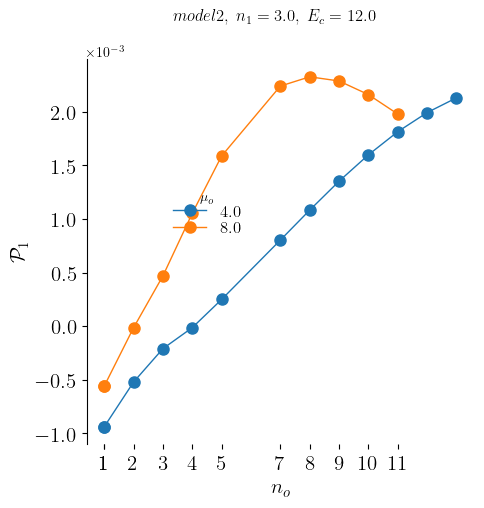

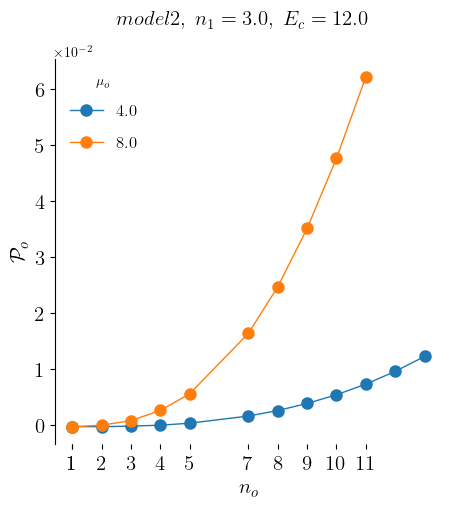

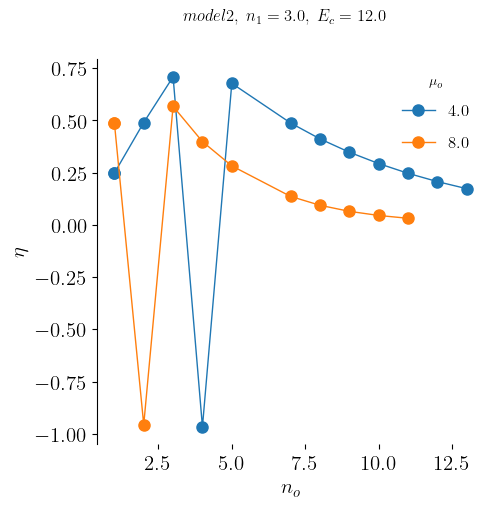

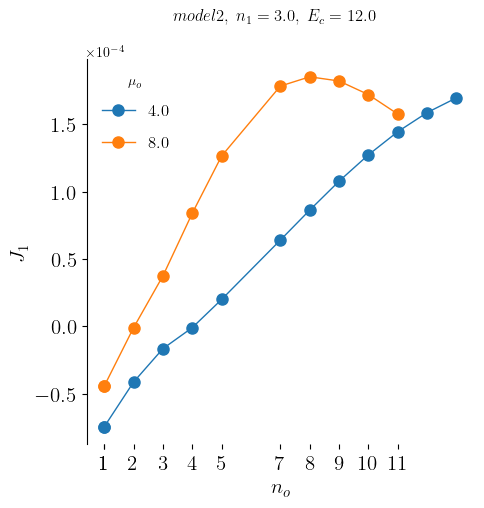

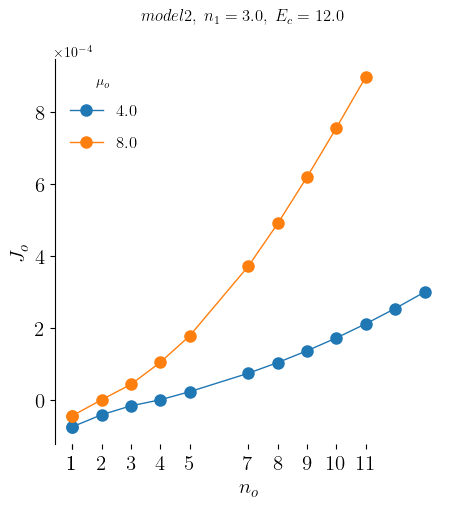

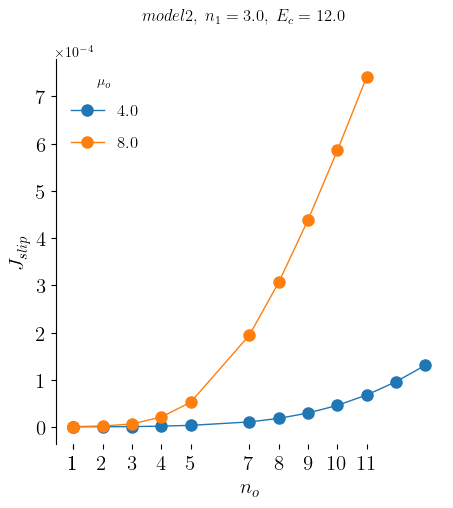

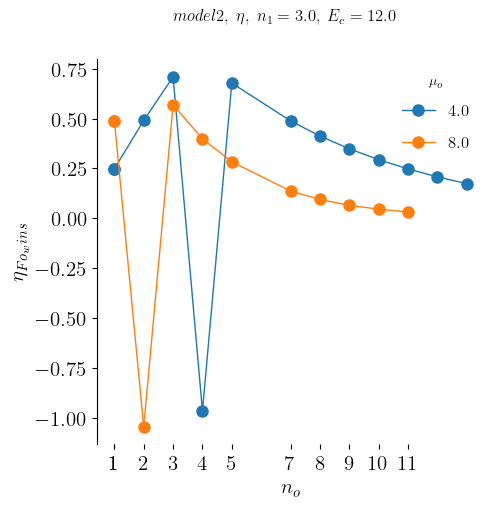

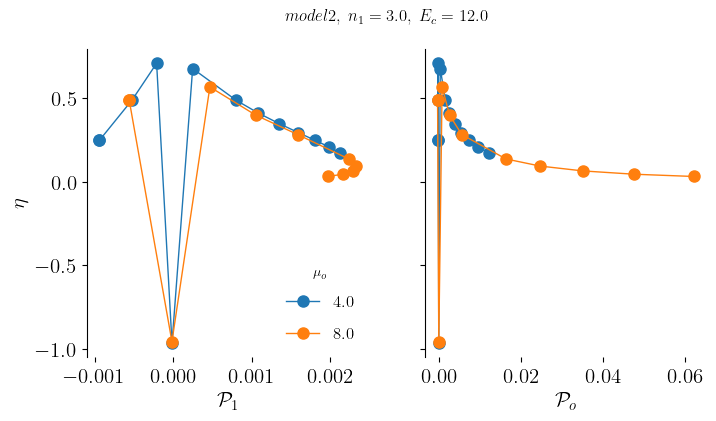

In [732]:
model_array = ["model1"]
#model_array = ["model2"]
target_dir = "/Users/sarealles/Desktop/Data_processed/pfe/"
# target_dir = "/Users/sarealles/Desktop/model1/Data_N_1000/pfe/"
# target_dir = "/Users/sarealles/Desktop/dt_dx_cluster/dt_0.0001/N_100/pfe/"
 
#individual plots for each model
# Ec_array = [0.0,2.0,4.0,8.0,16.0,32.0] 
Ec = 12.0
f0_array=[4.0,8.0]
# n1_array = [3.0]
n1_array = [3.0]
n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0]
# n0_array = [1.0,2.0,3.0,4.0]
# n0_array = [6.0,7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0]
for model in ["model2"]:
    #change the input file name in the function if you want to include dt, N
    plot_P_n0_individual_force(target_dir, model,n0_array,n1_array,f0_array,Ec,dt=0.001,N=1000,vs_n0=True)
    plt.show()  

In [21]:
def individual_flux(target_dir, params,model_array, n0,n1,Ec_list,N):
    
    [
            E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
            m0, m1, phase,beta, gamma,__
            ] = params
    
    
    
    
    for w,Ec in enumerate(Ec_list):
        '''uncomment these to get the plots'''
        # fig_model1, ax_model1 = subplots()
        # fig_model1.suptitle(fr"$ model 1, n_o = {n0},\ n_1 = {n1},\ Ec = {Ec},\ f_o = {psi_0}$,\ f_1 = {psi_1}", fontsize=16)

        
        N1 = N
        dx1 = (2*pi)/N1
        
        positions1 = arange(0.0, 2*pi, dx1)
        data1 = loadtxt(target_dir+"/"+model+"_t_reference_E0_{0}_Ecouple_{1}_E1_{2}_psi0_{3}_psi1_{4}_n0_{5}_n1_{6}_phase_{7}_outfile.dat".format( E0,Ec,E1, psi_0, psi_1,n0,n1,phase),usecols=(0,3,4,5,6,7,8))
        
        
        prob1 = data1[:,0].reshape((N1,N1))
        prob_sum_0 = np.sum(prob1,axis=1)
        prob_sum_1 = np.sum(prob1,axis=0)
        P = data1[:,0]
        # print("prob sum is: ", abs(P.sum(axis=None)))
        if not ( P >= 0.0).all():
            print(f"N = {N}, n0 = {n0}, Ec = {Ec} has negative prob")
            # check the normalization
        if not abs(P.sum(axis=None) - 1.0).__abs__() <= finfo('float32').eps :
            print(f"N = {N}, n0 = {n0}, Ec = {Ec} is not normalized, P sum is {P.sum(axis=None)}")

        
        drift_at_pos1 = data1[:,1:3].T.reshape((2,N1,N1))
        print("sum drift is:", np.sum(data1[:,1]))
        diffusion_at_pos1 = data1[:,3:].T.reshape((4,N1,N1))

        
        flux_array1 = empty((2,N1,N1))

        


        calc_flux(positions1, prob1, drift_at_pos1,diffusion_at_pos1, flux_array1, N1, dx1)
        flux_array1 = asarray(flux_array1) / (dx1 * dx1)
        
        integrate_flux_X = (1./(2*pi))*trapz(trapz(flux_array1[0,...], dx=dx1, axis=1), dx=dx1)
        integrate_flux_Y = (1./(2*pi))*trapz(trapz(flux_array1[1,...], dx=dx1, axis=0), dx=dx1) 
        



        # select fewer arrows to draw
        M1 = N//10
      # number of arrows in a row/ column, preferably a number such that N/M is an integer.
        fluxX1 = empty((M1, M1))
        fluxY1 = empty((M1, M1))

        

        for k in range(M1):
            # print(fr"N1 is {N1}, M1 is {M1}")
            # print(flux_array1[0, ...][int(N1 / M1) * k, ::int(N1 / M1)])
            fluxX1[k] = flux_array1[0, ...][int(N1 / M1) * k, ::int(N1 / M1)]
            fluxY1[k] = flux_array1[1, ...][int(N1 / M1) * k, ::int(N1 / M1)]

        '''uncomment these to get the plots'''
        # t_m1 = ax_model1.contourf(positions1 * (180/pi), positions1 * (180/pi), prob1.T, 10,cmap=cm.get_cmap("cool"))
        # ax_model1.quiver(positions1[::int(N1 / M1)] * (180/pi), positions1[::int(N1 / M1)] * (180/pi), fluxX1.T, fluxY1.T,scale_units='xy')
        
        
        Y1 = flux_array1[1, ...].sum(axis=None)
        X1 = flux_array1[0, ...].sum(axis=None)
        print(fr"n0={n0}, n1={n1}, Ec={Ec}, E0={E0}, E1={E1}, psi_0={psi_0}, psi_1={psi_1}: J0 = {X1}, J1={Y1}")


        '''uncomment these to get the plots'''
        # ax_model1.set_xlim([0.0,360.0])
        # ax_model1.set_xticks(arange(0, 361, 60), labels=['0', r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$", r"$\frac{4\pi}{3}$",r"$\frac{5\pi}{3}$", r"$2\pi$"])
        # ax_model1.set_yticks(arange(0, 361, 60), labels=['0', r"$\frac{\pi}{3}$", r"$\frac{2\pi}{3}$", r"$\pi$", r"$\frac{4\pi}{3}$",r"$\frac{5\pi}{3}$", r"$2\pi$"])
        # ax_model1.set_ylabel(r"$\theta_{1}$", fontsize=20)

        # ax_model1.set_xlabel(r"$\theta_{0}$", fontsize=20)

        # sfmt=ticker.ScalarFormatter()
        # sfmt.set_powerlimits((0, 0))
        # cbar1=fig_model1.colorbar(t_m1, ax=ax_model1, format=sfmt)
        # cbar1.ax.tick_params(labelsize=10, axis='y')
        # cbar1.ax.yaxis.offsetText.set_fontsize(10)

        return X1,Y1,integrate_flux_X,integrate_flux_Y,prob_sum_0,prob_sum_1
        # fig_model1.savefig(fr"/Users/sarealles/Desktop/Data/Flux_ref_model1_N_{N}_no_{n0}_n1_{n1}_EC_{Ec}_fo_{psi_0}.pdf")
        

<>:255: SyntaxWarning: invalid escape sequence '\p'
<>:255: SyntaxWarning: invalid escape sequence '\p'
/var/folders/9p/vl2cbtm92dv2z3ypp768dkvc0000gn/T/ipykernel_14205/502650012.py:255: SyntaxWarning: invalid escape sequence '\p'
  '''L=2pi/n,t = \frac{2\pi}{\langle \dot x \rangle},'''


Mean diffusion value,Ec=0: 1.4039812767420244e-20
Mean diffusion value,Ec=128: 5.959579577974274e-20
J0 due to one peak waiting time: 7.122601452052099e+19
t: [22325.01652051 22324.99160022 22324.97221781 22324.9791401
 22324.97664807 22324.97221781 22324.88632532 22325.01029043
 22324.9968304  22325.01652051 22324.97038713 22324.95837325
 22324.9669749  22324.98804018 22324.97221781 22324.97135253
 22324.98064911 22324.9968304  22324.9900125  22324.99160022
 22324.97673849 22324.92919676 22325.00822945 22325.06220786
 22324.93677578 22324.9669749  22324.98315673 22324.98804018
 22324.98380709 22324.97221781]
tau_analytical_0: [22325.01652051 22324.99160022 22324.97221781 22324.9791401
 22324.97664807 22324.97221781 22324.88632532 22325.01029043
 22324.9968304  22325.01652051 22324.97038713 22324.95837325
 22324.9669749  22324.98804018 22324.97221781 22324.97135253
 22324.98064911 22324.9968304  22324.9900125  22324.99160022
 22324.97673849 22324.92919676 22325.00822945 22325.06220786


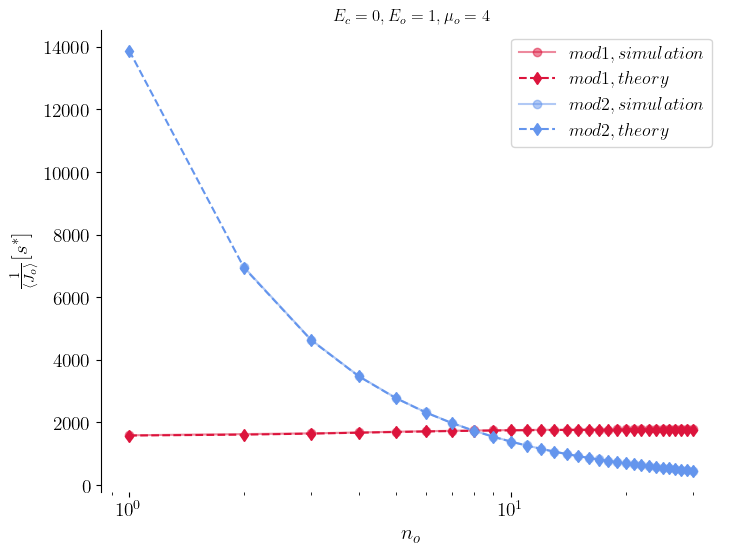

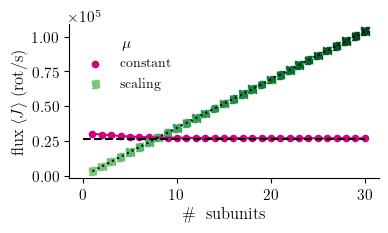

In [429]:
# Data arrays
timescale = 1.5 * 10**4 
'''timescale used in thesis'''
timescale = 4.8 * 10**7 
J0_diff_one_peak = -1.5266917246606386e-13


'''1/J vs n'''
fig1, ax1 = plt.subplots(figsize=(8, 6))

'''J vs n'''
fig2, ax2 = plt.subplots(figsize=(4, 2))


J0_array_1000_1_0_0_0_0 = np.array([-1.5273796380648046e-13, -7.730237681802858e-13, -2.4421976401914644e-12, -5.959450916130454e-12, -1.2350058085464932e-11, -2.2863691767753977e-11, -3.897237059479796e-11, -6.236804597397837e-11, -9.495983224384636e-11, -1.388708875961964e-10, -1.9643495262411855e-10, -2.7019255406870545e-10, -3.62886883581855e-10, -4.774593596665343e-10, -6.170448842220019e-10, -7.849668026404288e-10, -9.847315815161466e-10, -1.2200232131862816e-09, -1.4946973612268905e-09, -1.8127752585391676e-09, -2.1784373745597383e-09, -2.5960168599487094e-09, -3.069992789125655e-09, -3.6049832100223344e-09, -4.205738018534464e-09, -4.8771316735148615e-09, -5.624155763175245e-09, -6.451911444219571e-09, -7.3656017642905625e-09])

# J0_array_500_1_0_0_0_0 = np.array([-1.5266917246606386e-13, -2.441097220640927e-12, -1.2344494694468686e-11, 
#            -3.89548138914244e-11, -9.49170538175296e-11, 
#            -1.9634646100839536e-10, -9.842879722405024e-10, -3.068609796236577e-09, 
#            -7.362283653932743e-09, -1.494786756335023e-08])
# n0_array_500_1_0_0_0_0 = np.array([1.0,2.0,3.0,4.0,5.0, 6.0, 9.0, 12.0, 15.0, 18.0])
J0_array_500_1_0_0_0_0 = np.array([-2.4384070085835294e-12, -1.2330889937981955e-11, -3.8911882863114455e-11, -9.481244827874896e-11, -1.961300724929074e-10, -3.6232365896041995e-10, -6.160871894108824e-10, -9.832032125837416e-10, -1.4923774913085488e-09, -2.175056294719806e-09, -3.0652279560210174e-09, -4.1992104332351676e-09, -5.615426699030249e-09, -7.354169860191959e-09, -9.45735994823067e-09, -1.1968294356073139e-08, -1.493139388178133e-08, -1.8391946341658468e-08, -2.239584965651205e-08, -2.6989356264533904e-08, -3.22188206380033e-08, -3.813045158643716e-08, -4.477007092347221e-08, -5.218287996105798e-08, -6.041323515889068e-08, -6.950443413905026e-08, -7.949851311615012e-08, -9.043605666632991e-08, -1.0235602060731205e-07])
# [-1.2330884945710954e-11, -1.2330889937969316e-11, -1.233089684600942e-11, -1.2330905932958306e-11, -1.2330917004959942e-11, -1.2330930069999683e-11, -1.2330945099719089e-11, -1.2330962132045968e-11, -1.2330981117220875e-11, -1.2331002067722113e-11, -1.2331024964710056e-11, -1.2331049780565614e-11, -1.2331076493264286e-11, -1.2331105115676166e-11, -1.2331135608832887e-11, -1.2331167974897723e-11, -1.2331202144561745e-11, -1.2331238152481526e-11, -1.2331275943772753e-11, -1.2331315506289936e-11, -1.2331356812230727e-11, -1.2331399858060587e-11, -1.2331444595218616e-11, -1.2331490977155521e-11, -1.2331539042110855e-11, -1.2331588711524389e-11, -1.233163995507242e-11, -1.2331692767733293e-11, -1.233174710121783e-11]
J0_array_100_1_0_0_0_0 = np.array([-9.364143883947353e-11, -1.4739455166699944e-09, -7.2633404025552465e-09, -5.1538382674350846e-08, -1.010918478055169e-07, -1.7572473711274333e-07, -2.7921929269165874e-07, -4.138711347006584e-07, -5.803807079798262e-07, -7.779273303078619e-07, -1.0043750543029619e-06, -1.2565560689787028e-06, -1.5305849143563789e-06, -1.8221580773763695e-06, -2.1268489078613594e-06, -2.4403176215491683e-06, -2.758496288182855e-06, -3.077581633798064e-06, -3.3956943204907566e-06, -3.7109189023132375e-06, -4.018446850156221e-06, -4.319878113449555e-06, -4.615162686462422e-06, -4.896937341648301e-06, -5.193496221888654e-06, -5.483284247391924e-06, -5.781654881595941e-06, -6.097175085732947e-06, -6.45258845305163e-06])


n0_array_100_1_0_0_0_0 = np.array([1.0,2.0,3.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       

n0_array_500_1_0_0_0_0 = np.array([2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       


J0_array_500_1_0_0_2_0 = array([0.00030878507369972217, 0.00029047129781414486, 0.00028673052940067956, 0.0002846199131107717, 0.00028334885409290626, 0.00028253704734787906, 0.0002819930670108206, 0.00028161444216718727, 0.0002813430135818793, 0.00028114402586915506, 0.00028099576435445666, 0.00028088413146905425, 0.00028079966550726456, 0.0002807358291371396, 0.0002806879885264339, 0.0002806527835107661, 0.0002806277272449709, 0.00028061094488812714, 0.0002806009989574574, 0.0002805967701076457, 0.00028059737418037424, 0.00028060210348881726, 0.0002806103846037618, 0.0002806217475707255, 0.00028063580317121346, 0.0002806522259253431, 0.0002806707412484705, 0.00028069111564769304, 0.00028071314916900346])
n0_array_500_1_0_0_2_0 = array([1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       


# J0_array_500_1_0_0_4_0 = array([0.0006059100668231723, 0.0005816049293010457, 0.0005717643436016248, 0.0005674542616681615, 0.000565317761324798, 0.0005641693076453751])
# in_Y1 is: [3.725016539780665e-20, -1.8522350139327384e-20, 3.9546394099301076e-20, -7.442021194686911e-21, -3.315837665740365e-20, 1.4980085355511726e-20]
# n0_array_500_1_0_0_4_0 = np.array([3.0,6.0, 9.0, 12.0, 15.0, 18.0])

J0_array_500_1_0_0_4_0 = array([0.0006287104718506018, 0.0006052423080558835, 0.000594787054069692, 0.0005868201007582693, 0.0005809639566386184, 0.0005766771735713426, 0.0005735093995234508, 0.000571134216009439, 0.0005693250448146233, 0.0005679259365779138, 0.0005668288841123728, 0.0005659581370387869, 0.0005652597597282289, 0.0005646947383538815, 0.0005642344104083408, 0.0005638574023185707, 0.0005635475503571608, 0.0005632924689415213, 0.0005630825504810404, 0.0005629102568082022, 0.0005627696103603749, 0.0005626558240794415, 0.0005625650289231599, 0.000562494070937361, 0.0005624403584994333, 0.0005624017461612229, 0.0005623764454826658, 0.0005623629559703247, 0.0005623600111378955])
n0_array_500_1_0_0_4_0 = array([1.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       

J0_array_500_1_0_0_8_0 = array([0.0012472054047458453, 0.001235142676603911, 0.0012225848926468318, 0.0012104979575236745, 0.001199432222894664, 0.0011896172312590525, 0.0011810792941768765, 0.0011737356016889519, 0.001167455994845826, 0.0011620985316480022, 0.001157527659325817, 0.0011536221003795662, 0.001150277165451478, 0.0011474043082006947, 0.0011449294882871083, 0.0011427911610665791, 0.0011409382914779418, 0.0011393285633559433, 0.001137926839561285, 0.001136703872681168, 0.0011356352421335036, 0.001134700485639369, 0.001133882392818713, 0.0011331664317460657, 0.001132540283472751, 0.0011319934637394212, 0.0011315170149160082, 0.0011311032544671334])
n0_array_500_1_0_0_8_0 = array([3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       



J0_array_100 = np.array([-9.415618918122865e-11, -7.3032673456620235e-09, -1.0164755475847822e-07, 
                         -4.1614620508686786e-07, -1.0098961543688368e-06, -1.8321745717518756e-06, -2.773659880598525e-06])
n0_array_100 = np.array([1, 3, 6, 9, 12, 15, 18])

J0_array_200 = np.array([-4.758096666281248e-10, -7.340152539192955e-09, -3.501961343281959e-08, -1.0216092625190685e-07, -2.2604924240710383e-07, -4.182479536018119e-07])
n0_array_200 = np.array([3, 6, 9, 12, 15, 18])

# Mean of the diffusion data


# Function definitions
# def exp_model(x, a, b, c):
#     return a * np.exp(b * x) + c

# def model_func(x, a, b,c):
#     return c+ (a / x) + b*x

# Fit the model to the data
# try:
#     params, params_covariance = curve_fit(model_func, n0_array_500_1_0_0_0_0, np.abs(J0_array_500_1_0_0_0_0**-1))
#     params_e, params_covariance_e = curve_fit(exp_model, n0_array_500_1_0_0_0_0, (timescale) * np.abs(J0_array_500_1_0_0_0_0**-1), maxfev=100000)
# except RuntimeError as e:
#     print("Error:", e)
# else:
#     # Extract the parameters
#     a_fit, b_fit, c_fit = params
#     print(f"a = {a_fit}, b = {b_fit}, c = {c_fit}")
#     a_fit_e, b_fit_e, c_fit_e = params_e
#     # print("Exponential fit parameters: a =", a_fit_e, ", b =", b_fit_e, ", c =", c_fit_e)

#     # Generate data for the fitted curve
#     x_fit = np.linspace(1, max(n0_array_500_1_0_0_0_0), 1000)
#     y_fit = model_func(x_fit, a_fit, b_fit,c_fit)
#     y_fit_e = exp_model(x_fit, a_fit_e, b_fit_e, c_fit_e)
#     b,lnA =np.polyfit(n0_array_500_1_0_0_0_0,np.log((1) * np.abs(J0_array_500_1_0_0_0_0**-1)),1)

    # Plot the results
    # plt.plot(x_fit, 1000000*np.exp(-x_fit), label="exp", color="black")
    
    # plt.plot(x_fit, y_fit, label="Rational fit to 500", color="red")
    
    # plt.plot(x_fit, J0_diff/x_fit, label="Rational fit to 500", color="red")
    
# plt.plot(x_fit, y_fit_e, label="Exponential fit to 500", color="blue")
J0_diff = np.mean(np.abs(np.array([-3.48782781621254e-20, -1.4710077356778805e-20, -5.771180066342834e-21, -9.36851002905375e-21, 8.551213836144798e-21, -1.095961715407588e-20])))
print("Mean diffusion value,Ec=0:", J0_diff)
print("Mean diffusion value,Ec=128:", np.mean(np.abs(np.array([-5.959579577974274e-20, -5.959579577974274e-20]))))
t_tot_data_mu_0 = (J0_array_500_1_0_0_0_0**-1)
t_tot_data_mu_0_N_1000 = (J0_array_1000_1_0_0_0_0**-1)
t_tot_data_mu_0_N_100 = (J0_array_100_1_0_0_0_0**-1)
t_tot_data_mu_8 = ((J0_array_500_1_0_0_8_0)**-1)
t_tot_data_mu_4 = ((J0_array_500_1_0_0_4_0)**-1)
t_tot_data_mu_2 = ((J0_array_500_1_0_0_2_0)**-1)

T0_peak = np.abs(np.abs(J0_diff_one_peak**-1)-np.abs(J0_diff**-1))
print("J0 due to one peak waiting time:",T0_peak)
# plt.plot(x_fit, J0_diff/x_fit, label="Rational fit to 500", color="red")
eps = 2.22044604925031308084726e-16
dx = 0.001
Error = (n0_array_500_1_0_0_0_0-1)*eps
yerr = Error**-1


# ax2.plot(n0_array_500_1_0_0_4_0, J0_array_500_1_0_0_4_0, alpha=0.5,marker = "o",label=r"$mod1, simulation$", color="crimson")

# plt.plot(n0_array_100_1_0_0_0_0, t_tot_data_mu_0_N_100, marker = "o",label=r"$N=100, E_o=1, E_1=0, E_c=0, \mu_{o,1}=0$", color="pink")
# plt.plot(n0_array_500_1_0_0_0_0, t_tot_data_mu_0, marker = "o",label=r"$N=500, E_o=1, E_1=0, E_c=0, \mu_{o,1}=0$", color="red")
# plt.errorbar(n0_array_500_1_0_0_0_0, t_tot_data_mu_0_N_1000,yerr=yerr, marker = "o",label=r"$N=1000, E_o=1, E_1=0, E_c=0, \mu_{o,1}=0$", color="black")
# plt.plot(n0_array_500_1_0_0_0_0, t_tot_data_mu_0_N_1000, marker = "o",label=r"$N=1000, E_o=1, E_1=0, E_c=0, \mu_{o,1}=0$", color="black")
# plt.plot(n0_array_500_1_0_0_0_0, yerr*0.001, marker = "d",label=r"$Error [\times 10^{-3}],N=1000, E_o=1, E_1=0, E_c=0, \mu_{o,1}=0$", color="red")


# plt.plot(n0_array_500_1_0_0_2_0, t_tot_data_mu_2,marker = "o", label=r"$N=500, E_o=1, E_1=0, E_c=0, \mu_{o}=2$", color="green")
ax1.plot(n0_array_500_1_0_0_4_0, t_tot_data_mu_4,marker = "o", alpha = 0.5,label=r"$mod1, simulation$", color="crimson")
# plt.plot(n0_array_500_1_0_0_8_0, t_tot_data_mu_8,marker = "o", label=r"$N=500, E_o=1, E_1=0, E_c=0, \mu_{o}=8$", color="purple")



# plt.plot(x_fit, exp(lnA)*exp(b*x_fit), label=r"$exponential \ fit \propto e^{bn_o}$", color="purple")
scale_diff=10**-7
# plt.plot(n0_array_500_1_0_0_0_0, (scale_diff)*timescale*(J0_diff**-1)/n0_array_500_1_0_0_0_0,linewidth=12.0,alpha=0.7,label=r"$\tau_{diff}^{tot} [\times 10^{-7} ] \propto \frac{1}{n_{o}}$",color="brown")
scale_barr=10**-9
# plt.plot(n0_array_500_1_0_0_0_0, (scale_barr)*timescale*(T0_peak)*n0_array_500_1_0_0_0_0,label=r"$\tau_{peaks}^{tot} [\times 10^{-7} ] \propto n_o$")
# # print("T due to total peak waiting time:",timescale*(J0_peak**-1)*n0_array_500_1_0_0_0_0)


t_tot_ana = scale_diff*(timescale*(J0_diff**-1)/n0_array_500_1_0_0_0_0) + scale_barr*timescale*(T0_peak)*n0_array_500_1_0_0_0_0
# plt.plot(n0_array_500_1_0_0_0_0,t_tot_ana, linewidth=6.0,label=r"$\tau_{diff + peaks}^{tot} [scaled]$")
# plt.plot(n0_array_500_1_0_0_0_0[1:],t_tot_ana[1:]-t_tot_data[1:], linewidth=3.0,label=r"$\tau_{ana}^{tot} - \tau_{data}^{tot}$")
# print(f"t tot ana :{t_tot_ana[0]}, t toto data: {t_tot_data[0]}")


'''analytical aparameters'''
t_scale = (2.1 * 10**-8)**-1
# t_scale = 1
diff_t = 1000*2*pi*pi/n0_array_500_1_0_0_0_0
barr_t = n0_array_500_1_0_0_0_0*exp(1)

# plt.plot(n0_array_500_1_0_0_0_0[1:],diff_t[1:]*t_scale, linestyle="dotted",label = r"$\tau_{diff}^{tot} = \frac{\zeta\beta(2\pi)^2}{2n}$")
# plt.plot(n0_array_500_1_0_0_0_0,barr_t*t_scale, label = "anal-barr")

difference_t = diff_t*t_scale - t_tot_data_mu_0
# plt.plot(n0_array_500_1_0_0_0_0[1:],difference_t[1:], label = "diff")




###paper anlytical parameters
n_4 = array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       

A_4 = 4*pi*pi*(10**-3)/(n_4**2)
s_4 = array([0.102433, 0.0558362, 0.0399559, 0.0310882, 0.0250177, 0.0204748,
0.0169293, 0.0141014, 0.0118176, 0.00995797, 0.00843415, 0.00717879,
0.00613945, 0.00527485, 0.00455225, 0.00394557, 0.00343392, 0.00300054,
0.00263186, 0.00231693, 0.00204684, 0.00181429, 0.00161331, 0.00143898,
0.00128726, 0.00115475, 0.00103866, 0.00093663, 0.000846696, 0.000767195
])
m_4 = array([3.96273, 0.522629, 0.164399, 0.0727214, 0.0382279, 0.0222126,
0.0137691, 0.008934, 0.00600111, 0.00414447, 0.00292919, 0.00211171,
0.00154898, 0.00115383, 0.000871426, 0.000666421, 0.000515481, 0.000402911,
0.000317963, 0.000253163, 0.000203235, 0.000164408, 0.000133951, 0.000109869,
0.0000906812, 0.0000752859, 0.0000628509, 0.0000527441, 0.000044481, 0.0000376874
])

n_0 = array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       
A_0 = 4*pi*pi*(10**-3)/(n_0**2)
res_0 = array([0.0223964, 0.0895857, 0.201568, 0.358343, 0.559911, 0.806272, 
                1.09743, 1.43337, 1.81411, 2.23964, 2.70997, 3.22509, 3.785, 4.3897, 
                5.0392, 5.73349, 6.47257, 7.25644, 8.08511, 8.95857, 9.87683, 
                10.8399, 11.8477, 12.9003, 13.9978, 15.14, 16.327, 17.5588, 18.8354, 
                20.1568])
res_0 = A_0*res_0
tau_res_0_2 = 4*pi*pi/(2*res_0)
tau_res_0_1 = 4*pi*pi/(2*res_0*n_0)
print("t:",tau_res_0_2)

n_0_2pi = array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       
A_0_2pi = 4*pi*pi*(10**-3)
res_0_2pi = A_0_2pi*array([0.0223964, 0.0223965, 0.0223963, 0.0224138, 0.0228725, 0.0227066, \
0.0226219, 0.0244215, 0.023137, 0.0233863, 0.0244398, 0.0202572, 
0.0229872, 0.0226174, 0.0229832, 0.0218705, 0.0271228, 0.0252647, 
0.0228534, 0.0230393, 0.0241078, 0.0249914, 0.0243191, 0.0110106, 
0.0231074, 0.0227251, 0.0237329, 0.0215475, 0.0243741, 0.0227766])
tau_res_0_2_2pi = 4*pi*pi/(2*res_0_2pi)
tau_res_0_1_2pi = 4*pi*pi/(2*res_0_2pi*n_0_2pi)




n_4_2pi = array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       
A_4_2pi = 4*pi*pi*(10**-3)
res_4_2pi = A_4_2pi*array([0.025849, 0.0267094, 0.0270046, 0.0267184, 0.0261774, 0.0256004, \
0.0250915, 0.0246637, 0.0243163, 0.0240819, 0.0238356, 0.0234967,
0.0235029, 0.023297, 0.0231975, 0.0231339, 0.023505, 0.0227258, 
0.0227844, 0.0227147, 0.0228494, 0.0226437, 0.0226727, 0.0207182, 
0.0227813, 0.0224684, 0.0228295, 0.0221864, 0.0222343, 0.0224957])
tau_res_4_2_2pi = 4*pi*pi/(2*res_4_2pi)
tau_res_4_1_2pi = 4*pi*pi/(2*res_4_2pi*n_4_2pi)

res_4 = A_4*s_4/m_4
tau_res_4_2 = 4*pi*pi/(2*res_4)
tau_res_4_1 = 4*pi*pi/(2*res_4*n_4)


######f=0#######
# plt.plot(n_0_2pi,tau_res_0_1_2pi*(1), linestyle="dotted",marker = 'd',label = r"$calc-0-s1-2pi$")
# plt.plot(n_0_2pi,tau_res_0_2_2pi, linestyle="dotted",marker = 'd',label = r"$calc-0-s2-2pi$")

# plt.plot(n_0,tau_res_0_1*(1), linestyle="dotted",marker = 'd',label = r"$calc-0-s1$")
# plt.plot(n_0,tau_res_0_2, linestyle="dotted",marker = 'd',label = r"$calc-0-s2$")
print("tau_analytical_0:",tau_res_0_2)
#######f=4########

speed_f_2 = array([
0.00195009, 0.00187812, 0.00183441, 0.00181075, 0.00179739, 0.00178931,
0.00178412, 0.00178062, 0.00177815, 0.00177636, 0.00177501, 0.00177397,
0.00177315, 0.0017725, 0.00177198, 0.00177154, 0.00177118, 0.00177088,
0.00177062, 0.00177041, 0.00177022, 0.00177005, 0.00176991, 0.00176978,
0.00176967, 0.00176957, 0.00176948, 0.0017694, 0.00176933, 0.00176927
])

speed_f_4 = array([
0.00397053, 0.00390017, 0.00382231, 0.00375625, 0.00370588, 0.00366881, 
0.00364164, 0.00362151, 0.00360636, 0.00359477, 0.00358575, 0.00357862, 
0.0035729, 0.00356825, 0.00356442, 0.00356124, 0.00355857, 0.00355631, 
0.00355437, 0.00355271, 0.00355127, 0.00355001, 0.00354891, 0.00354794, 
0.00354708, 0.00354631, 0.00354562, 0.00354501, 0.00354446, 0.00354396
]
)

speed_f_8= array([
0.0079846, 0.00794106, 0.00787654, 0.00780035, 0.00772101, 0.00764461, 
0.00757462, 0.00751249, 0.00745837, 0.00741175, 0.0073718, 0.00733763, 
0.00730837, 0.00728328, 0.00726168, 0.00724301, 0.00722683, 0.00721272, 
0.00720038, 0.00718954, 0.00717997, 0.0071715, 0.00716396, 0.00715724, 
0.00715121, 0.0071458, 0.00714091, 0.0071365, 0.00713249, 0.00712885
])
ratio = (tau_res_4_2[0]/t_tot_data_mu_4[0])**-1
print(ratio)
ratio = 1


# #plt.plot(n_4, tau_res_4_1, linestyle="dashed", marker='d', label=r"$\tau = n \frac{\left(\frac{2\pi}{n}\right)^2}{2D}, L = \frac{2\pi}{n}$")

# plt.plot(n_4, tau_res_4_2*(ratio), linestyle="dashed", marker='^', label=r"$\tau_{diff} = \frac{(2\pi)^2}{2D}, L = \frac{2\pi}{n}$")

# Plotting the second set of data
'''L=2pi/n,t = \frac{2\pi}{\langle \dot x \rangle},'''
# ax2.plot(n_mod2_4, speed_mod2_f_4/(2*np.pi), color='green', linestyle='--')

ax1.plot(n_4_2pi, 2*pi/(speed_f_4), linestyle="dashed", marker='d', color="crimson",label=r"$mod1, theory$")
# ax2.plot(n_4_2pi, (speed_f_4)/(2*pi), marker='o', color='#d1007d',markersize=12,label=r"$Model 1$")
ax2.plot(n_4_2pi, timescale*(speed_f_4)/(2*np.pi) , marker='', color='#d1007d',markersize=8)
ax2.scatter(n_4_2pi, timescale*(speed_f_4)/(2*np.pi), marker='o', c='#d1007d',s=20,label=r"$\rm constant$")

# plt.plot(n_4_2pi, tau_res_4_1_2pi, linestyle="dotted", marker='d', label=r"$\tau = n \frac{\left(\frac{2\pi}{n}\right)^2}{2D}, L = 2\pi$")
# plt.plot(n_4_2pi, tau_res_4_2_2pi*(ratio), linestyle="dotted", marker='^', label=r"$\tau = \frac{(2\pi)^2}{2D} [\times 0.08], L = 2\pi$")
# plt.plot(n_4_2pi, 2*pi/(speed_f_2), linestyle="dashed", marker='d', label=r"$ t = \frac{2\pi}{\langle \dot x \rangle}, L = \frac{2\pi}{n_o}, E_o = 1,\mu_o = 2$")
# plt.plot(n_4_2pi, 2*pi/(speed_f_4), linestyle="dashed", marker='d',color="green", label=r"$ t = \frac{2\pi}{\langle \dot x \rangle}, L = \frac{2\pi}{n_o}, E_o = 1,\mu_o = 4$")
# plt.plot(n_4_2pi, 2*pi/(speed_f_8), linestyle="dashed", marker='d', label=r"$ t = \frac{2\pi}{\langle \dot x \rangle}, L = \frac{2\pi}{n_o}, E_o = 1,\mu_o = 8$")
# T_difference = tau_res_4_2 - 2*pi/(speed_f_4)
# plt.plot(n_4, T_difference, linestyle="dashed", marker='d', label=r"$-T_diff$")


#######model2#########################################################


J0_array_mod2_1000_1_0_0_4_2 = np.array([0.0001437526603280887, 0.0002156294796582678, 0.0002875068857424579, 0.0003593850739057029, 0.0004312642393552016, 0.0005031445771930882, 0.0005750262824260954, 0.0006469095499769611, 0.0007187945746943363, 0.0007906815513646061, 0.0008625706747216542, 0.000934462139459094, 0.0010063561402401102, 0.0010782528717098005, 0.0011501525285049987, 0.0012220553052665689, 0.0012939613966491937, 0.0013658709973340308, 0.0014377843020380071, 0.0015097015055271824, 0.0015816228026243055, 0.0016535483882234058, 0.0017254784572975743, 0.0017974132049119464, 0.0018693528262325254, 0.0019412975165378195, 0.002013247471228465, 0.002085202885838256, 0.0021571639560427464]
)
J1_array_mod2_1000_1_0_0_4_2 = np.array([-0.00029124464814938515, -0.0002912449028355536, -0.00029124516156163645, -0.0002912454242920088, -0.0002912456909891544, -0.00029124596161534414, -0.00029124623613218775, -0.0002912465145011129, -0.0002912467966829135, -0.00029124708263822305, -0.00029124737232703743, -0.0002912476657092125, -0.000291247962744049, -0.0002912482633907145, -0.0002912485676078697, -0.0002912488753540171, -0.00029124918658717745, -0.00029124950126528713, -0.0002912498193458062, -0.00029125014078623657, -0.00029125046554344326, -0.0002912507935744091, -0.0002912511248356673, -0.00029125145928373113, -0.00029125179687479886, -0.00029125213756496147, -0.0002912524813101006, -0.0002912528280660223, -0.0002912531777882605]
)
n0_array_mod2_1000_1_0_0_4_2 = array([2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       

t_tot_data_mod2_mu_4_2_N_1000 = (J0_array_mod2_1000_1_0_0_4_2**-1)


ax1.plot(n0_array_mod2_1000_1_0_0_4_2, t_tot_data_mod2_mu_4_2_N_1000, marker = "o",alpha=0.5,label=r"$mod2, simulation$", color="cornflowerblue")
# ax2.plot(n0_array_mod2_1000_1_0_0_4_2, J0_array_mod2_1000_1_0_0_4_2, marker = "o",alpha=0.5,label=r"$Model 2$", color="cornflowerblue")

###analytical#####
n_mod2_4 = array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       

speed_mod2_f_4 = array([0.000452688, 0.000905377, 0.00135807, 0.00181075, 0.00226344, 0.00271613, 0.00316882,
    0.00362151, 0.0040742, 0.00452688, 0.00497957, 0.00543226, 0.00588495, 0.00633764,
    0.00679033, 0.00724301, 0.0076957, 0.00814839, 0.00860108, 0.00905377, 0.00950646,
    0.00995915, 0.0104118, 0.0108645, 0.0113172, 0.0117699, 0.0122226, 0.0126753,
    0.013128, 0.0135807])




# Plotting with varying colors
# plt.scatter(x, y, c=x, cmap=cmap, norm=norm, s=50)


cmap = plt.cm.Greens
norm = plt.Normalize(n_mod2_4.min()-27, n_mod2_4.max())

# Fit a line to the data
# slope, intercept = np.polyfit(n_mod2_4, speed_mod2_f_4/(2*np.pi), 1)

# # Equation of the line
# equation = f"y = {slope:.4f}x + {intercept:.4f}"
# print(equation)

# # Plotting the fitted line
# x_fit = np.linspace(min(n_mod2_4), max(n_mod2_4), 100)
# y_fit = slope * x_fit + intercept
# ax2.plot(x_fit, y_fit, color='red', linestyle='-', label='Fitted Line')

'''I dont think that /2pi should be there in ax2=>>>>check later'''
# ax2.plot(n_mod2_4, speed_mod2_f_4/(2*pi), color="green")
# ax2.scatter(n_mod2_4, speed_mod2_f_4/(2*pi), c=n_mod2_4, cmap=cmap, norm=norm, linestyle="dashed", marker='s', s=100, label=r"$ Model 2$")
'''no 2pi version'''
# ax2.plot(n_mod2_4, timescale*speed_mod2_f_4/(2*pi), color="green")
ax2.scatter(n_mod2_4, timescale*speed_mod2_f_4/(2*pi), c=n_mod2_4, cmap=cmap, norm=norm, linestyle="dashed", marker='s', s=30, label=r"$\rm scaling$")


ax1.plot(n_mod2_4, 2*pi/(speed_mod2_f_4), linestyle="dashed", marker='d',color="cornflowerblue", label=r"$ mod2, theory$")

##########################model4###############################################
J0_array_mod4_1000_1_0_0_4_0=array([0.00014372820808825822, 0.00021559280121483947, 0.0002874579809964164, 0.00035932394272421894, 0.00043119088157197267, 0.0005030589926085992, 0.0005749284708075971, 0.0006467995110586543, 0.0007186723081773194, 0.0007905470569168567, 0.000862423951978031, 0.0009343031880213279, 0.001006184959676823, 0.0010780694615564967, 0.0011499568882641007, 0.0012218474344073513, 0.001293741294607851, 0.001365638663513631, 0.0014375397358084856, 0.0015094447062253824, 0.0015813537695538974, 0.0016532671206549142, 0.0017251849544683703, 0.0017971074660262005, 0.001869034850461236, 0.0019409673030187469, 0.0020129050190661516, 0.002084848194103961, 0.002156797023774454])# in_Y1 is: [-7.731112653878752e-13, -7.73111975651634e-13, -7.731126318562647e-13, -7.731132782166436e-13, -7.731140006216813e-13, -7.731147366382637e-13, -7.731154268464794e-13, -7.731161959245604e-13, -7.731169099724635e-13, -7.731177089203231e-13, -7.731184591429813e-13, -7.731192246691484e-13, -7.731200469274629e-13, -7.73120855641111e-13, -7.731216273100617e-13, -7.731224494835938e-13, -7.731232778483566e-13, -7.731241068666294e-13, -7.731249316973828e-13, -7.73125807583014e-13, -7.731266333916627e-13, -7.731275113900114e-13, -7.73128386415179e-13, -7.731292979953064e-13, -7.73130214268489e-13, -7.731311003459277e-13, -7.731320365967167e-13, -7.731329615824884e-13, -7.73133870266845e-13]
n0_array_mod4_1000_1_0_0_4_0 = array([2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0])       

t_tot_data_mod4_mu_4_0_N_1000 = (J0_array_mod4_1000_1_0_0_4_0**-1)

# ax1.plot(n0_array_mod4_1000_1_0_0_4_0, t_tot_data_mod4_mu_4_0_N_1000, marker = "s",alpha=0.5,label=r"$mod4, simulation$", color="green")



########################################################################
ax1.legend(fontsize=13)
ax1.set_xlabel(r'$n_o$',fontsize=15)
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_ylabel(r'$\frac{1}{\langle J_{o} \rangle}[s^{*}]$',fontsize=15)
ax1.set_title(r"$E_c = 0, E_o = 1,\mu_o = 4$")
ax1.tick_params(axis='both', labelsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# ax1.set_ylim(1,1900)
####################
df = pd.read_csv("/Users/sarealles/Desktop/research/GP-Mar2025/thetaDot_vs_n.csv", header=None, names=["n", "thetaDot"])
ax2.plot(df["n"], timescale*array(df["thetaDot"])/(2*pi), color="black", linestyle="dotted")
####################


ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.legend(fontsize=l_entry_s, title=r"$\mu$", title_fontsize=l_title_s, frameon=False)  # No box around legend
ax2.set_xlabel(r'\textnormal{\# \ subunits}', fontsize=fs)  # Non-italic "subunits"
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(True)  # Show bottom spine (solid x-axis)
ax2.set_ylabel(r'\textnormal{flux}$\ \langle J \rangle\ (\rm{rot}/\rm{s})$', fontsize=fs)  # Non-italic "Flux"
ax2.tick_params(axis='both', labelsize=ticks_size)
ax2.yaxis.offsetText.set_fontsize(off_text_size)

coeff = 6.2832 * (1 - np.exp(-np.pi)) / (1000 * 13.28)
# ax2.plot(n_mod2_4,coeff*n_mod2_4, color='black', linestyle='--', linewidth=1.5)  # Horizontal line at y=0
# ax2.plot(n_4_2pi,0.000883*4*n_4_2pi,color='black', linestyle='--', linewidth=1.5)  # Horizontal line at y=0
ax2.hlines(y=timescale*0.0035/(2*pi), xmin=0, xmax=30, color='black', linestyle='--', linewidth=1.5)  # Horizontal line at y=0
# 0.00354
# fig1.savefig("/Users/sarealles/Desktop/research/CM_Aug_2024/time_J0_anal_sim_E0_1_Ec_0_mu0_4.pdf")

fig2.savefig("/Users/sarealles/Desktop/research/Paper/J0_analytical_E0_1_Ec_0_mu0_4_linear.pdf", bbox_inches='tight')

plt.show()


    


In [691]:

def which_Ec_maximizes_P1(target_dir, model,n0_array,N=1000,n1=3.0,f0=4.0,dt=0.001,E0=2.0,E1=2.0,vs_n0=True):
    timescale = 1.5 * 10**4 
    #individually plotting for each model P vs no for various Ec values in one single plot

    #fig for Ec that maximizes P1 vs n0
    fig, ax = plt.subplots(1, 1, figsize=(3,2))
    ax.vlines(x=3, ymin=0, ymax=100, color='green', linestyle='--', linewidth=1)
    ax.vlines(x=6, ymin=0, ymax=100, color='purple', linestyle='dashed', linewidth=1)
    ax.hlines(y=16, xmin=0, xmax=30, color='grey', linestyle='--', linewidth=1)
    f1 = -2.0
    Ec_that_maximizes_P1 = []
    n0_exists = []
    if vs_n0:
        for n0 in n0_array:
            params = set_params(model, n0,n1,f0,f1,E0,E1)
            n0n1_str = str(int(n0))+"_"+ str(int(n1))
            target_dir_temp = target_dir + n0n1_str
            [
            E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
            m0, m1, phase,beta, gamma,__
            ] = params
            input_file_name = ("/" + model + "_flux_power_efficiency_"
                + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                
            if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                print(f"File not found: {target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)}")
                continue
            print("path is:", target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N))

            
            Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

            # Convert Ec_list to a list if it is a single value
            if isinstance(Ec_list, float):
                Ec_list = [Ec_list]
                integrate_power_Y = [integrate_power_Y]
                integrate_power_X = [integrate_power_X]
                integrate_flux_X = [integrate_flux_X]
                integrate_flux_Y = [integrate_flux_Y]
                efficiency_mod = [efficiency_mod]
                efficiency = [efficiency]
            print("Ec_list is:", Ec_list)  
            if len(Ec_list) != 0:
                n0_exists.append(n0) 
                Ec_that_maximizes_P1.append(Ec_list[argmax(integrate_flux_Y)])


                    
        # fig.suptitle(fr"${model},\ n_1 = {n1}, \ f_0 = {psi_0}$", fontsize=12)
        ax.plot(n0_exists,Ec_that_maximizes_P1, label = "model1",marker ="o", color="black",lw=1.0,markersize=3)
        ax.tick_params(labelsize=9, axis='both')
        ax.set_xlabel(r"$ \mathrm{\#\ subunits \ on} \ \mathrm{F_o} \ (n_\mathrm{o})$", fontsize=10)
        ax.set_xticks(n0_exists)
        ax.set_ylabel(r"${\rm{argmax}}_{\beta E_{\rm c}} \beta \mathcal{P}_1$", fontsize=10)
        ax.set_yscale("log")
        ax.set_ylim(bottom=10)
        ax.set_ylim(top=50)
        # ax.set_xscale('log')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        ax.set_xscale("log")
        
        ax.set_xticks([1, 2, 5, 10, 20, 30])
        ax.set_xlim(1, 30)
        ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

        ax.set_yticks([10, 20, 50])
        ax.set_ylim(10, 55)
        ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

        # Minor tick at 16 with plain formatting
        ax.yaxis.set_minor_locator(ticker.FixedLocator([16]))
        minor_formatter = ticker.ScalarFormatter()
        minor_formatter.set_scientific(False)
        ax.yaxis.set_minor_formatter(minor_formatter)

        # Optional: ensures 'plain' formatting on all y-ticks (redundant if above is enough)
        ax.ticklabel_format(style='plain', axis='y')
        
        # Add an inset at x=3 and y=10
        
        # Save the figure with the timestamp in the filename
        # fig.savefig(fr"/Users/sarealles/Desktop/research/Feb25/{model}_Ec_which_maximizes_P1_vs_n0_{timestamp}.pdf")         
        fig.savefig(fr"/Users/sarealles/Desktop/research/Paper/{model}_Ec_which_maximizes_P1_vs_n0.pdf", bbox_inches='tight')         

        print("Ec is :", Ec_that_maximizes_P1)
        print("n0 is:", n0_exists)
        # plt.show()
        return n0_exists, Ec_that_maximizes_P1

path is: /Users/sarealles/Desktop/Data/Data_processed/pfe_old/1_3/model1_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_1.0_n1_3.0_phase_0.0_outfile.dat
Ec_list is: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  40.  50.  60.  64.  70.  80.  90. 100. 120.
 128. 130. 140. 150.]
path is: /Users/sarealles/Desktop/Data/Data_processed/pfe_old/2_3/model1_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_2.0_n1_3.0_phase_0.0_outfile.dat
Ec_list is: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  40.  50.  60.  64.  70.  80.  90. 100. 120.
 128. 130. 140. 150.]
path is: /Users/sarealles/Desktop/Data/Data_processed/pfe_old/3_3/model1_flux_power_efficiency_E0_2.0_E1_2.0_psi0_4.0_psi1_-2.0_n0_3.0_n1_3.0_phase_0.0_outfile.dat
Ec_list is: [ 

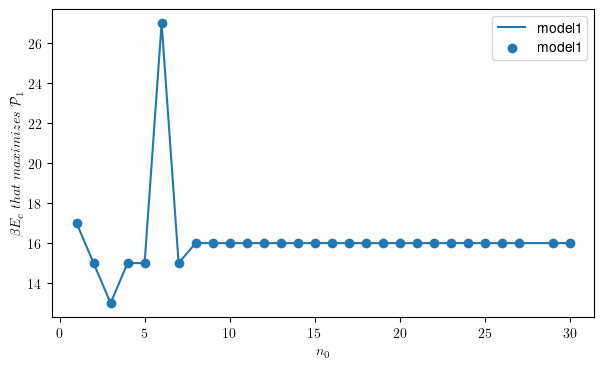

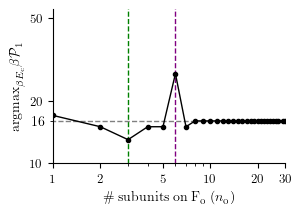

In [692]:
# A plot of P vs n0 for different Ec

# Define arrays
Ecouple_array = [150.0]
model_array = ["model1"]
# model_array = ["model1"]
Ec_array = [12.0, 13.0, 14.0, 15.0]  # Can be adjusted as needed
n1_array = [3.0]
n0_array = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0] 
n0_array = [1.0,2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,29.0,30.0] 
f0 = 4.0
n1=3.0
# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(7, 4))

# Loop through each model
for model in model_array:
    # Define target directory and N based on model and f0
    if f0 == 8.0:
        if model == "model3":
            target_dir = "/Users/sarealles/Desktop/model3/new/pfe/"
            N = 1000
        elif model == "model4":
            target_dir = "/Users/sarealles/Desktop/model4/new/pfe/"
            N = 1000
        elif model == "model2":
            target_dir =  "/Users/sarealles/Desktop/Data/"
            N = 540
        else:
            target_dir =  "/Users/sarealles/Desktop/Data/"
            N = 540
    else: 
        if model == "model2":
            target_dir =  "/Users/sarealles/Desktop/Data/Data_processed/pfe/"
            
        if model == "model1":
            target_dir = "/Users/sarealles/Desktop/Data/Data_processed/pfe_old/"
            

    # Determine n0 and Ec values that maximize P1
    N = 540
    n0, Ec = which_Ec_maximizes_P1(target_dir, model, n0_array, N, n1, f0, dt=0.001, E0=2.0, E1=2.0, vs_n0=True)

    # Plot results

    ax.plot(n0, Ec, label=f"{model}")
    ax.scatter(n0, Ec, label=f"{model}")


# Add legend and show plot
ax.set_xlabel(r"$n_0$")
ax.set_ylabel(r"$\beta E_c \ that \ maximizes \ \mathcal{P}_1$")
ax.legend()
# fig.show()

model 2

Trying to get a smoother transitions

In [117]:
def around_maximum(target_dir,model,n0_array,n1_array,Ec_array,dt,N,E0,E1,vs_n0=True):
    
    Ecouple= []
    around_maximizing_n0 = []
    P_around_maximizing_n0 = []
    if vs_n0:
        for n1 in n1_array:
            for i,Ec in enumerate(Ec_array):
                n0_exists = []
                P_at_Ec = []
                P0_at_Ec = []
                eta_at_Ec = []
                eta_at_inf = []
                eta_Fo_wins = []
                j1_at_Ec = []
                jo_at_Ec = []

                
                for n0 in n0_array:
                    params = set_params_Fo_8(model, n0,n1,E0,E1)
                    n0n1_str = str(int(n0))+"_"+ str(int(n1))
                    target_dir_temp = target_dir + n0n1_str
                
                    [
                    E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                    m0, m1, phase,beta, gamma,__
                    ] = params

                    input_file_name = ("/" + model + "_flux_power_efficiency_"
                    + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    
                    if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                        continue

                    Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                    target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

                    # Convert Ec_list to a list if it is a single value
                    if isinstance(Ec_list, float):
                        Ec_list = [Ec_list]
                        integrate_power_Y = [integrate_power_Y]
                        integrate_power_X = [integrate_power_X]
                        integrate_flux_X = [integrate_flux_X]
                        integrate_flux_Y = [integrate_flux_Y]
                        efficiency_mod = [efficiency_mod]
                        efficiency = [efficiency]

                    # print(integrate_power_Y)
                    for j in range(len(Ec_list)):
                        if Ec_list[j] == Ec:
                            n0_exists.append(int(n0))
                            P0_at_Ec.append(2*pi*integrate_power_X[j])
                            P_at_Ec.append(-2*pi*integrate_power_Y[j])
                            eta_at_Ec.append(efficiency_mod[j])
                            j1_at_Ec.append(integrate_flux_Y[j])
                            jo_at_Ec.append(integrate_flux_X[j])
                            eta_Fo_wins.append(efficiency[j])
                if len(n0_exists)!=0:
                    # print(f"Ec is :{Ec}")
                    Ecouple.append(Ec)
                    around_maximizing_n0.append([n0_exists[argmax(P_at_Ec)-1],n0_exists[argmax(P_at_Ec)], n0_exists[argmax(P_at_Ec)]+1])
                    P_around_maximizing_n0.append([P_at_Ec[argmax(P_at_Ec)-1],P_at_Ec[argmax(P_at_Ec)], P_at_Ec[argmax(P_at_Ec)+1]])
    return Ecouple,around_maximizing_n0,P_around_maximizing_n0

def der_func(x,y):
    der = (y[2]-y[0])/(x[2]-x[0])
    derder = (y[2]-2*y[1]+y[0])/(x[2]-x[1])
    
    return der,derder


# target_dir = "/Users/sarealles/Desktop/Data_processed/pfe_old/"

# target_dir="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_4/pfe/"

# target_dir = "/Users/sarealles/Desktop/model1/Data_N_360/cluster/pfe/"
# target_dir = "/Users/sarealles/Desktop/model1/Data_N_100/pfe/"
# target_dir ="/Users/sarealles/Desktop/model2/new_data_540_CM/f0_4/pfe/"
target_dir ="/Users/sarealles/Desktop/model2/new_data_540_CM/E0_3/f0_8/pfe/"

    
#individual plots for each model
Ec_array = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,32.0,40.0,50.0,64.0,70.0,80.0,90.0,128.0] 
# Ec_array = [8.0,9.0,10.0,11.0,12.0]

# Ec_array = np.array([9.0,10.0,11.0, 12.0])

# Ec_array = [7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0]
# Ec_array = [5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 40., 50., 60., 64., 70., 80., 90., 100., 120., 128., 130., 150.]
Ec_array = [5., 6., 7., 8., 9., 10., 11., 12., 13., 14.,15.0,16.0,17.0,18.0, 19.0]
Ec_array= [7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5]
# J1 maximizing n0 is: [5, 6, 7, 8, 9, 10, 11, 11, 13, 15, 16, 18, 19, 21, 22, 24, 26, 28, 30
# Ec is : [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
# j1 maximizing n0 is: [4, 5, 7, 8, 10, 12, 13, 15, 16, 18, 20, 22, 23, 25, 27, 29]

n1_array = [3.0]
n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0] 
# n0_array = [2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0] 
for model in ["model2"]:
    Ec_array,neigh_n0,neigh_P1 = around_maximum(target_dir, model,n0_array,n1_array,Ec_array,dt=0.001,N=540,E0=3.0,E1=3.0,vs_n0=True)

print(Ec_array)
print(neigh_n0) 
print(neigh_P1) 

n0_max = []
for i,Ec in enumerate(Ec_array):
    n0_assumed_max = neigh_n0[i][1]
    der,derder = der_func(neigh_n0[i],neigh_P1[i])
    n0_max.append(n0_assumed_max - (der/derder))
    
n0_max = array(n0_max)
print(f"Ec array is: {Ec_array} \n n0_max is {n0_max}")
    
    
    




SyntaxError: invalid syntax (991235446.py, line 1)

model 1: driving force vs Ec

In [59]:
def plot_DF_vs_Ec(target_dir,model,f0_array,n0,n1,Ec_array,dt,N,vs_n0=True):
    timescale = 1.5 * 10**4 
    #individually plotting for each model P vs no for various Ec values in one single plot

    #fig for P vs n0
    fig, ax = plt.subplots(1, 1, figsize=(5,5))
    #fig6 for P0 vs n0
    fig6, ax6 = plt.subplots(1, 1, figsize=(5,5))
    #fig1 for eta vs n0
    fig1, ax1 = plt.subplots(1, 1, figsize=(5,5))
    #fig2 for j1 vs n0
    fig2, ax2 = plt.subplots(1, 1, figsize=(5,5))
    #fig2 for jo vs n0
    fig5, ax5 = plt.subplots(1, 1, figsize=(5,5))
    #fig3 for jslip vs n0
    fig3, ax3 = plt.subplots(1, 1, figsize=(5,5))
    # #fig4 for eta if assume fo always wins
    fig4, ax4 = plt.subplots(1, 1, figsize=(5,5))
    #fig7 P1 vs. eta
    fig7, ax7 = plt.subplots(1, 2, figsize=(8,4), sharey="row")
    
    # ax.axhline(0.0,color="black", lw=1.0)
    # ax3.axhline(0.0,color="black", lw=1.0)
    # ax6.axhline(0.0,color="black", lw=1.0)
    # ax4.axhline(0.0,color="black", lw=1.0)
    # ax2.axhline(0.0,color="black", lw=1.0)
    # ax5.axhline(0.0,color="black", lw=1.0)
    # ax1.axhline(1.0,color="black", lw=1.0)
    
    index = int(model[-1])-1
    Ecouple= []
    maximizing_n0 = []
    if vs_n0:
        for n1 in n1:
            for i,Ec in enumerate(Ec_array):
                f0_exists = []
                P_at_Ec = []
                P0_at_Ec = []
                eta_at_Ec = []
                eta_at_inf = []
                eta_Fo_wins = []
                j1_at_Ec = []
                jo_at_Ec = []
                jslip_at_Ec = []
                
                for f0 in f0_array:
                    params = set_params(model, n0,n1,f0)
                    n0n1_str = str(int(n0))+"_"+ str(int(n1))
                    target_dir_temp = target_dir + n0n1_str
                    print(f"targetdir is {target_dir_temp}")
                
                    [
                    E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
                    m0, m1, phase,beta, gamma,__
                    ] = params
                    
                
                    # input_file_name = ("/" + model +"_dt_{7}_N_{8}"+ "_flux_power_efficiency_"
                    # + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    #change the input name
                    input_file_name = ("/" + model + "_flux_power_efficiency_"
                    + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
                    
                    if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase,dt,N)):
                        continue

                    Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
                    target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase,dt,N),unpack=True, usecols=(0,1,2,3,4,5,6))

                    # Convert Ec_list to a list if it is a single value
                    if isinstance(Ec_list, float):
                        Ec_list = [Ec_list]
                        integrate_power_Y = [integrate_power_Y]
                        integrate_power_X = [integrate_power_X]
                        integrate_flux_X = [integrate_flux_X]
                        integrate_flux_Y = [integrate_flux_Y]
                        efficiency_mod = [efficiency_mod]
                        efficiency = [efficiency]

                    # print(integrate_power_Y)
                    for j in range(len(Ec_list)):
                        if Ec_list[j] == Ec:
                            f0_exists.append(f0)
                            P0_at_Ec.append(2*pi*integrate_power_X[j])
                            P_at_Ec.append(-2*pi*integrate_power_Y[j])
                            eta_at_Ec.append(efficiency_mod[j])
                            j1_at_Ec.append(integrate_flux_Y[j])
                            jo_at_Ec.append(integrate_flux_X[j])
                            eta_Fo_wins.append(efficiency[j])
                            if model =="model3" or model=="model4":
                                jslip_at_Ec.append(n0*integrate_flux_X[j]-n1*integrate_flux_Y[j])
                            else:
                                jslip_at_Ec.append(integrate_flux_X[j]-integrate_flux_Y[j])
                                
                            
                    eta_at_inf.append(infinite_eff(psi_0,psi_1,n0,n1,model))
                print("J0: ",jo_at_Ec)
                print("J1: ",j1_at_Ec)
                print("eff is ",eta_at_Ec)
                print("f0: ",f0_exists)
                if len(f0_exists)!=0:
                    Ecouple.append(Ec)
                    maximizing_n0.append(f0_exists[argmax(j1_at_Ec)])
                # print(fr"at {Ec}, n0 that maximizes J1 is: {n0_exists[argmax(j1_at_Ec)]}")
                    
                if model =="model2" or model=="model4":
                    x = str(psi_0/8)
                    psi_0 = "\\frac{n_o}{2}"
                    psi_0 = "2"
                    f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                else:
                    # f_o = "\\left| \\frac{\\Delta \\mu_o}{\\Delta \\mu_1} \\right|"
                    f_o = "\\Delta \\mu_o"
                    
                fig.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax.plot(f0_exists,P_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax.tick_params(labelsize=15, axis='both')
                ax.set_xlabel(r"$\mu_{\rm o}$", fontsize=15)
                ax.set_xticks(f0_exists)
                ax.set_ylabel(r"$output \ power\ \beta\mathcal{P}_{1} \ [1/s]$", fontsize=15)
                #ax.legend(loc='upper right', prop={'size':12})

                fig1.suptitle(fr"${model} ,\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax1.plot(f0_exists,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                for i,e in enumerate(eta_at_Ec):
                    if e > 0.5:
                        print(fr"eta is {e} at Ec = {Ec}, n0 = {f0_exists[i]}")
                    
                        
                ax1.tick_params(labelsize=15, axis='both')
                ax1.set_xlabel(r"$\mu_{\rm o}$", fontsize=15)
                ax1.set_ylabel(r"$\eta$", fontsize=15)
                #ax1.legend(loc='upper right', prop={'size':12})
                
                fig7.suptitle(fr"${model} ,\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax7[0].plot(P_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax7[1].plot(P0_at_Ec,eta_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                # ax7[1].set_title(r"$\mathcal{P}_{o}$")
                # ax7[0].set_title(r"$\mathcal{P}_{1}$")
                ax7[0].tick_params(labelsize=15, axis='both')
                ax7[1].tick_params(labelsize=15, axis='both')
                ax7[0].set_xlabel(r"$\mathcal{P}_{1}$", fontsize=15)
                ax7[1].set_xlabel(r"$\mathcal{P}_{o}$", fontsize=15)
                ax7[0].set_ylabel(r"$\eta$", fontsize=15)
                
                fig2.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax2.plot(f0_exists,j1_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax2.tick_params(labelsize=15, axis='both')
                ax2.set_xlabel(r"$n_o$", fontsize=15)
                ax2.set_xticks(f0_exists)
                ax2.set_ylabel(r"$J_{1}$", fontsize=15)
                
                fig5.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax5.plot(f0_exists,jo_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax5.tick_params(labelsize=15, axis='both')
                ax5.set_xlabel(r"$n_o$", fontsize=15)
                ax5.set_xticks(f0_exists)
                ax5.set_ylabel(r"$J_{o}$", fontsize=15)
                
                fig3.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax3.plot(f0_exists,jslip_at_Ec, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax3.tick_params(labelsize=15, axis='both')
                ax3.set_xlabel(r"$n_o$", fontsize=15)
                ax3.set_xticks(f0_exists)
                ax3.set_ylabel(r"$J_{slip}$", fontsize=15)

                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                fig4.suptitle(fr"${model},\ \eta ,\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=12)
                ax4.plot(f0_exists,eta_Fo_wins, label = fr"${Ec}$",marker ="o",lw=1.0, markersize=8)
                ax4.tick_params(labelsize=15, axis='both')
                ax4.set_xlabel(r"$n_o$", fontsize=15)
                ax4.set_xticks(f0_exists)
                ax4.set_ylabel(r"$\eta_{Fo_wins}$", fontsize=15)


                fig6.suptitle(fr"${model},\ n_1 = {n1}, \ {f_o} = {psi_0}$", fontsize=15)
                ax6.plot(f0_exists,P0_at_Ec, label = fr"${Ec}$",marker ="o", lw=1.0,markersize=8)
                ax6.tick_params(labelsize=15, axis='both')
                ax6.set_xlabel(r"$n_o$", fontsize=15)
                ax6.set_xticks(f0_exists)
                ax6.set_ylabel(r"$\mathcal{P}_{o}$", fontsize=15)
                
                ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_visible(False)
                ax.spines['top'].set_visible(False)
                
                ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax2.spines['right'].set_visible(False)
                ax2.spines['bottom'].set_visible(False)
                ax2.spines['top'].set_visible(False)
                
                ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax5.spines['right'].set_visible(False)
                ax5.spines['bottom'].set_visible(False)
                ax5.spines['top'].set_visible(False)
                
                ax7[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[0].spines['right'].set_visible(False)
                ax7[0].spines['bottom'].set_visible(False)
                ax7[0].spines['top'].set_visible(False)
                ax7[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                # ax7[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
                ax7[1].spines['right'].set_visible(False)
                ax7[1].spines['bottom'].set_visible(False)
                ax7[1].spines['top'].set_visible(False)
                
                ax6.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax6.spines['right'].set_visible(False)
                ax6.spines['bottom'].set_visible(False)
                ax6.spines['top'].set_visible(False)
                
                ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax4.spines['right'].set_visible(False)
                ax4.spines['bottom'].set_visible(False)
                ax4.spines['top'].set_visible(False)
                
                ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax3.spines['right'].set_visible(False)
                ax3.spines['bottom'].set_visible(False)
                ax3.spines['top'].set_visible(False)
                
                ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
                ax1.spines['right'].set_visible(False)
                ax1.spines['bottom'].set_visible(False)
                ax1.spines['top'].set_visible(False)
                
                ax.set_xscale("log")
                ax1.set_xscale("log")
                ax2.set_xscale("log")
                ax3.set_xscale("log")
                ax4.set_xscale("log")
                ax5.set_xscale("log")
                ax6.set_xscale("log")
                ax7[0].set_xscale("symlog")
                ax7[1].set_xscale("symlog")
                
            
                #ax.set_yscale("log")
            # ax1.plot(n0_array, eta_at_inf, label=fr"$E_{{\infty}}$", color="black", markersize=15)
        
        ax.legend(prop={'size': 12}, title='$E_c$', frameon=False, ncol=2, labelspacing=0.05,
            bbox_to_anchor=(0.31, 0.6), loc='center')
        # ax.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax1.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax2.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax3.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax4.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax6.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax5.legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        ax7[0].legend(prop={'size':12},title='$E_c$', frameon= False, labelspacing=1)
        # fig.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_P_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig1.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_eta_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        # fig2.savefig(fr"/Users/sarealles/Desktop/Data/individual_{model}_J1_vs_n0_Ec_{Ec}_n1_{n1}_fo_{psi_0}.pdf")
        
        print("Ec is :", Ecouple)
        print("j1 maximizing n0 is:", maximizing_n0)
        plt.show()
        
    

targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
targetdir is /Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/8_3
J0:  [np.float64(-3.646467505047625e-05), np.float64(-6.60363580559655

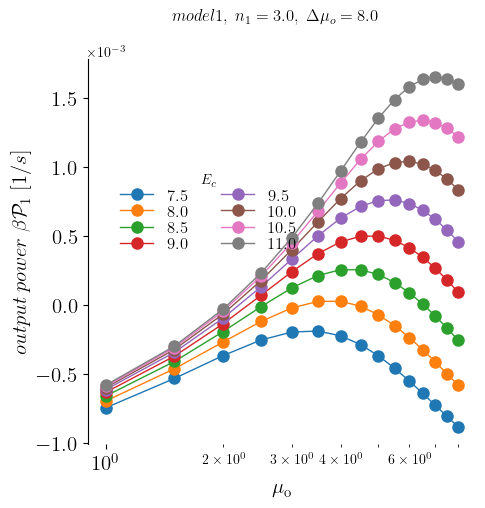

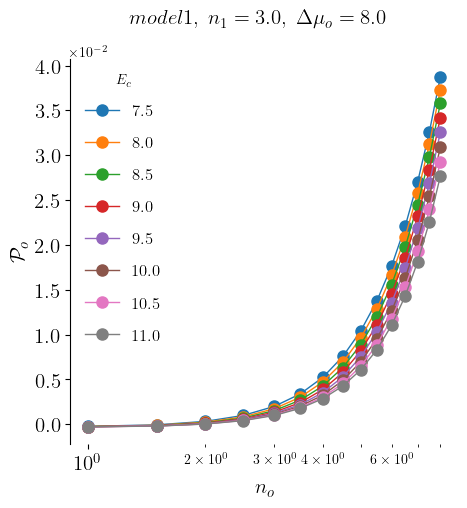

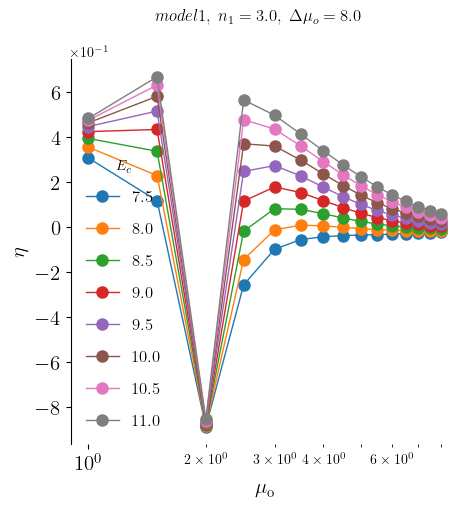

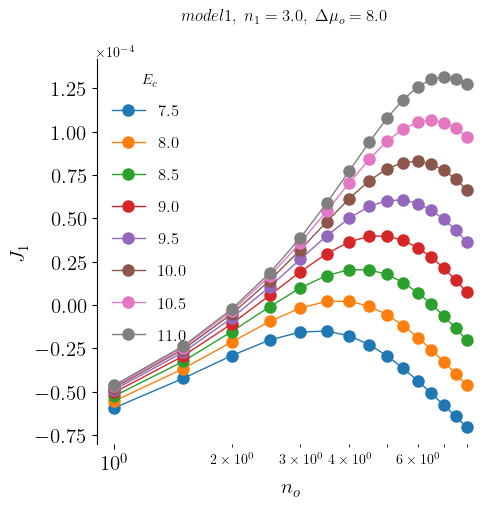

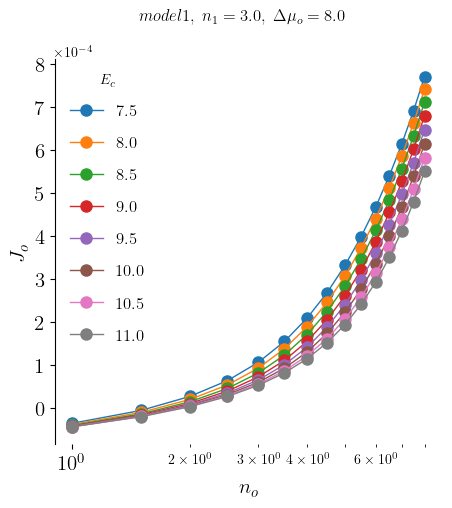

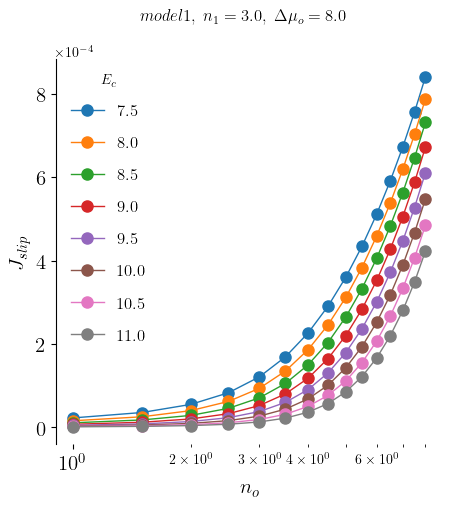

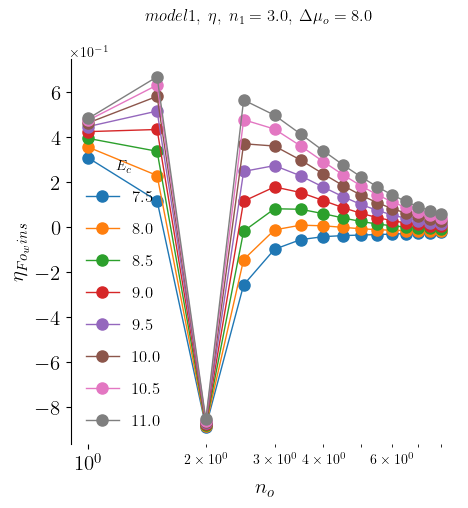

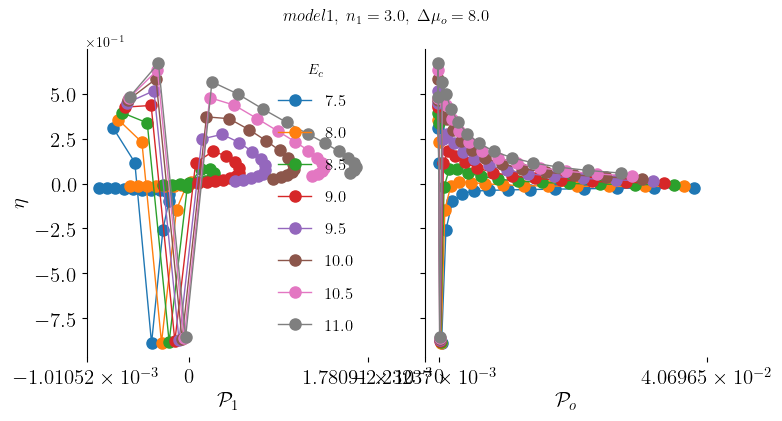

In [61]:
#A plot of P vs n0 for different Ec

Ecouple_array = [150.0]
model_array = ["model1", "model2","model3","model4"]
#model_array = ["model2"]
# target_dir = "/Users/sarealles/Desktop/Data_processed/pfe_old/"
target_dir ="/Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/"
# target_dir="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_4/pfe/"

# target_dir = "/Users/sarealles/Desktop/model1/Data_N_360/cluster/pfe/"
# target_dir = "/Users/sarealles/Desktop/model1/Data_N_100/pfe/"

    
#individual plots for each model
Ec_array = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,32.0,40.0,50.0,64.0,70.0,80.0,90.0,128.0] 
# Ec_array = [8.0,9.0,10.0,11.0,12.0]

# Ec_array = np.array([9.0,10.0,11.0, 12.0])

Ec_array = [7.5,8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]


f0_array = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0]
n1_array = [3.0]
n0=8.0
# n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0] 
# n0_array = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0] 
for model in ["model1"]:
    plot_DF_vs_Ec(target_dir, model,f0_array,n0,n1_array,Ec_array,dt=0.001,N=540,vs_n0=True)
    plt.show()  


## model 1: Finding the true maximum for obove plots

In [166]:
def around_maximum_mod1(target_dir,model,f0_array,n0,n1,Ec_array,E0,E1):
    
    Ecouple= []
    around_maximizing_n0 = []
    P_around_maximizing_n0 = []


    for i,Ec in enumerate(Ec_array):
        f0_exists = []
        P_at_Ec = []
        P0_at_Ec = []
        eta_at_Ec = []
        eta_at_inf = []
        eta_Fo_wins = []
        j1_at_Ec = []
        jo_at_Ec = []

        
        for f0 in f0_array:
            params = set_params(model, n0,n1,f0,E0,E1)
            n0n1_str = str(int(n0))+"_"+ str(int(n1))
            target_dir_temp = target_dir + n0n1_str
        
            [
            E0, __,E1, psi_0, psi_1,psi_0_n, psi_1_n, __, __,
            m0, m1, phase,beta, gamma,__
            ] = params

            input_file_name = ("/" + model + "_flux_power_efficiency_"
            + "E0_{0}_E1_{1}_psi0_{2}_psi1_{3}_n0_{4}_n1_{5}_phase_{6}_outfile.dat")
            
            if not os.path.exists(target_dir_temp + input_file_name.format(E0, E1, psi_0, psi_1, n0, n1, phase)):
                continue
            # print("input file name", input_file_name)
            Ec_list,integrate_flux_X, integrate_flux_Y,integrate_power_X, integrate_power_Y, efficiency,efficiency_mod= loadtxt(
            target_dir_temp + input_file_name.format(E0,E1, psi_0, psi_1, n0,n1,phase),unpack=True, usecols=(0,1,2,3,4,5,6))

            # Convert Ec_list to a list if it is a single value
            if isinstance(Ec_list, float):
                Ec_list = [Ec_list]
                integrate_power_Y = [integrate_power_Y]
                integrate_power_X = [integrate_power_X]
                integrate_flux_X = [integrate_flux_X]
                integrate_flux_Y = [integrate_flux_Y]
                efficiency_mod = [efficiency_mod]
                efficiency = [efficiency]

            # print(integrate_power_Y)
            for j in range(len(Ec_list)):
                if Ec_list[j] == Ec:
                    f0_exists.append(f0)
                    P0_at_Ec.append(2*pi*integrate_power_X[j])
                    P_at_Ec.append(-2*pi*integrate_power_Y[j])
                    eta_at_Ec.append(efficiency_mod[j])
                    j1_at_Ec.append(integrate_flux_Y[j])
                    jo_at_Ec.append(integrate_flux_X[j])
                    eta_Fo_wins.append(efficiency[j])
        if len(f0_exists)!=0:
            Ecouple.append(Ec)
            print("f0 array is", f0_exists)
            arg = argmax(P_at_Ec)
            around_maximizing_n0.append([f0_exists[arg-1],f0_exists[arg], f0_exists[arg+1]])
            P_around_maximizing_n0.append([P_at_Ec[arg-1],P_at_Ec[arg], P_at_Ec[arg+1]])
    return Ecouple,around_maximizing_n0,P_around_maximizing_n0

def der_func(x,y):
    der = (y[2]-y[0])/(x[2]-x[0])
    derder = (y[2]-2*y[1]+y[0])/(x[2]-x[1])
    
    return der,derder


# target_dir = "/Users/sarealles/Desktop/Data_processed/pfe_old/"

# target_dir="/Users/sarealles/Desktop/model2/data_540_probably_previously_downloaded_somewhere/f0_4/pfe/"

# target_dir = "/Users/sarealles/Desktop/model1/Data_N_360/cluster/pfe/"
# target_dir = "/Users/sarealles/Desktop/model1/Data_N_100/pfe/"
# target_dir ="/Users/sarealles/Desktop/model2/new_data_540_CM/f0_4/pfe/"
target_dir ="/Users/sarealles/Desktop/model2/new_data_540_CM/E0_1/f0_4/pfe/"
target_dir ="/Users/sarealles/Desktop/model1/DF_vs_Ec/pfe/"
    
#individual plots for each model
Ec_array = [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,32.0,40.0,50.0,64.0,70.0,80.0,90.0,128.0] 
# Ec_array = [8.0,9.0,10.0,11.0,12.0]

# Ec_array = np.array([9.0,10.0,11.0, 12.0])

# Ec_array = [7.0,7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0]
# Ec_array = [5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 40., 50., 60., 64., 70., 80., 90., 100., 120., 128., 130., 150.]
# Ec_array = [5., 6., 7., 8., 9., 10., 11., 12., 13., 14.,15.0,16.0,17.0,18.0, 19.0]
Ec_array = [7.5,8.0,8.5,9.0,9.5,10.0,10.5,11.0]
f0_array = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0]
n0 = 8.0
n1 = 3.0
for model in ["model1"]:
    Ec_array,neigh_n0,neigh_P1 = around_maximum_mod1(target_dir, model,f0_array,n0,n1,Ec_array,E0=2.0,E1=2.0)

print(Ec_array)
print(neigh_n0) 
print(neigh_P1) 

n0_max = []
for i,Ec in enumerate(Ec_array):
    n0_assumed_max = neigh_n0[i][1]
    der,derder = der_func(neigh_n0[i],neigh_P1[i])
    n0_max.append(n0_assumed_max - (der/derder))
    
n0_max = array(n0_max)
print(Ec_array,n0_max)
    
    
    




f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
f0 array is [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
[7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
[[3.0, 3.5, 4.0], [3.5, 4.0, 4.5], [3.5, 4.0, 4.5], [4.5, 5.0, 5.5], [5.0, 5.5, 6.0], [5.5, 6.0, 6.5], [6.0, 6.5, 7.0], [6.5, 7.0, 7.5]]
[[np.float64(-0.00019644018575685695), np.float64(-0.00018949419280160025), np.float64(-0.00022383198628731155)], [